# MODULES IMPORT

In [1]:
import numpy as np              #numpy library is used to work with multidimensional array.
import pandas as pd             #panda used for data manipulation and analysis.
                 
import os                       #os library is used for loading file to use in the program
import json                     #json library parses json into a string or dict, and convert string or dict to json file.
from pathlib import Path        #support path

import matplotlib.pyplot as plt #support ploting a figure
from matplotlib import colors   #colors support converting number or argument into colors

In [2]:
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

# DATA IMPORT

In [3]:
# get the path for training_task, evaluation_task, and test_task
data_path = Path('./data')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

#from the path above, we load the tests file's directory into our training_tasks, evaluation_tasks, and test_tasks variables
#the sorted() function is just for the list of directory to maintain some order
training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))

print("Number of examples in training corpus is ",len(training_tasks))
print("Number of examples in evaluation corpus is ",len(evaluation_tasks))
print("Number of examples in testing corpus is ",len(test_tasks))

Number of examples in training corpus is  400
Number of examples in evaluation corpus is  400
Number of examples in testing corpus is  100


In [4]:
print(training_tasks[:3])     #printing the first 3 elements of training_tasks
print(evaluation_tasks[:3])   #printing the first 3 elements of evaluation_tasks
print(test_tasks[:3])         #printing the first 3 elements of test_tasks

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']
['00576224.json', '009d5c81.json', '00dbd492.json']
['00576224.json', '009d5c81.json', '00dbd492.json']


In [5]:
#Get the first file of the training_tasks
training_task_file = str(training_path / training_tasks[0])

#Get the first file of the evaluation_tasks
evaluation_task_file = str(evaluation_path / evaluation_tasks[0])

#Get the first file of the test_tasks
test_task_file = str(test_path / test_tasks[0])

#open the file and load it
with open(training_task_file, 'r') as f:   
    #can change training_task_file to evaluation_task_file or test_task_file to have a look at evaluation file or test file
    task = json.load(f)

#using json to load the file, the task variable now is a dictionary with keys and values, we go on and print out the keys
print(task.keys())

dict_keys(['test', 'train'])


In [6]:
# The number of "train" and "test" in one training example.
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


In [7]:
#display the data structure of a training's input and output
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

[[0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [7, 7, 7, 7, 7, 7, 7, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7]]

In [8]:
def get_task(subset='train', index=0, print_path=False):
    if subset=='train':
        task_file = str(training_path / training_tasks[index])
    elif subset=='eval':
        task_file = str(evaluation_path / evaluation_tasks[index])
    else:
        task_file = str(test_path / test_tasks[index])
    with open(task_file, 'r') as f:   
        task = json.load(f)
    if print_path==True:
        print(task_file)
    return(task)

In [9]:
task=get_task()

# FUNCTION TO PLOT IMAGES

In [10]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

#plotting the training task and the test task.
def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t.get('output', [[0,0],[0,0]]))
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

data\training\007bbfb7.json


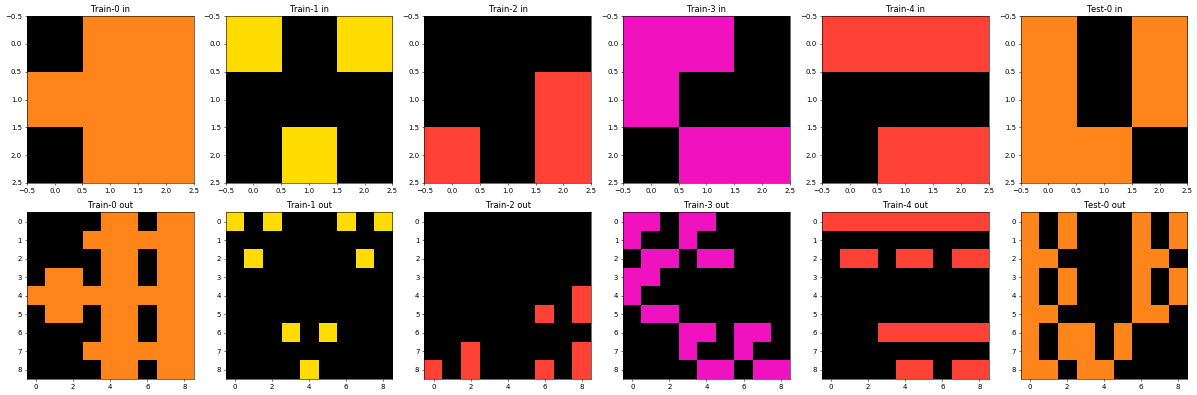

data\training\00d62c1b.json


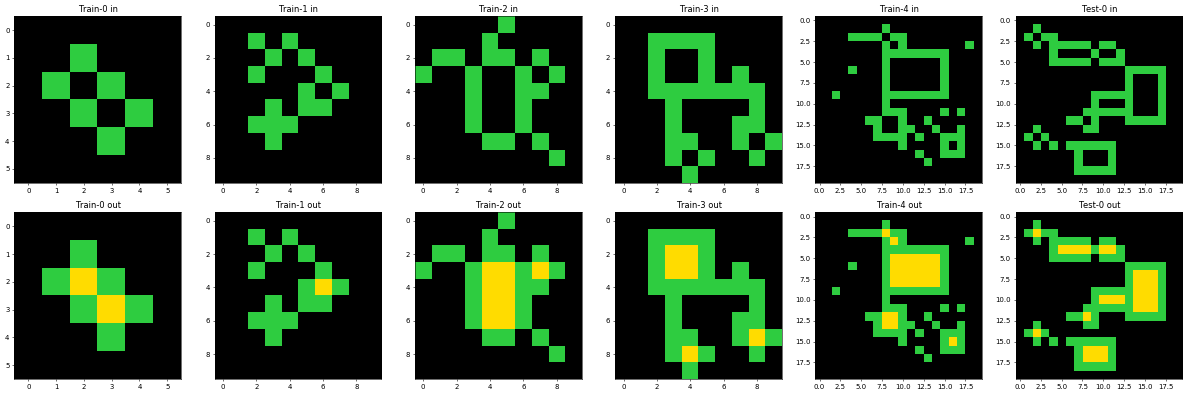

data\training\017c7c7b.json


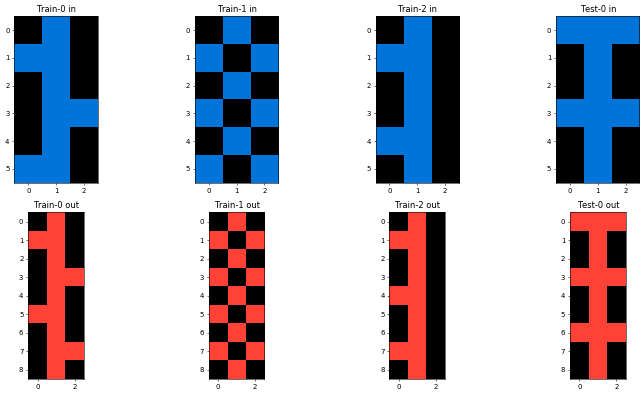

In [11]:
#plotting the first three training tasks.
for i in range(0,3):   # can change to evaluation_tasks or test_tasks to view the evaluation and test task
    
    task=get_task('train', index=i, print_path=True)

    plot_task(task)

# VISUALIZING ALL THE TASKS

for i in range(0, 400):
    plot_task(get_task('train', i))

for i in range(0, 400):
    plot_task(get_task('eval', i))

for i in range(0, 100):
    plot_task(get_task('test', i))

# DIMENSIONS

In [12]:
def check_dim(dataset='train'):
    type_1=[]
    type_1_1=[]
    type_1_2=[]
    type_1_3=[]
    type_1_4=[]
    
    type_2=[]
    type_2_1=[]
    type_2_2=[]
    type_2_3=[]
    
    leng=400
    if dataset=='test':
        leng=100
    for t in range(0, leng):
        task=get_task(dataset, t)
        inp=[]
        out=[]
        for i in task['train']:
            inp.append(np.array(i['input']).shape)
            out.append(np.array(i['output']).shape)
        if all(x==inp[0] for x in inp):
            type_1.append(t)
            if all(x==inp[0] for x in out):
                type_1_1.append(t)
            else:
                if all(x==out[0] for x in out):
                    if (out[0][0]*out[0][1])<(inp[0][0]*inp[0][1]):     
                        type_1_2.append(t)
                    else:
                        type_1_3.append(t)
                else:
                    type_1_4.append(t)
        else:
            type_2.append(t)
            if all(inp[x]==out[x] for x in [0,1]):
                type_2_1.append(t)
            else:
                if (out[0][0]*out[0][1])<(inp[0][0]*inp[0][1]):     
                    type_2_2.append(t)
                else:
                    type_2_3.append(t)
            
    return {'t1':type_1,'t1_1':type_1_1,'t1_2':type_1_2,'t1_3':type_1_3,'t1_4':type_1_4,
            't2': type_2, 't2_1':type_2_1,'t2_2':type_2_2,'t2_3':type_2_3}

In [13]:
def dimension_explained(dataset='train', plot='no'):
    print('------------',dataset, ' shapes ------------')
    diz=check_dim(dataset)
    print('t1 all inputs are equal: ', len(diz['t1']), 'of which: ')
    print('t1_1 also output equal: ', len(diz['t1_1']))
    print('t1_2 output smaller but fixed: ', len(diz['t1_2']))
    print('t1_3 output bigger but fixed: ', len(diz['t1_3']))
    print('t1_4 output size depends on input', len(diz['t1_4']))
    

    print('t2 input different: ', len(diz['t2']), 'of which: ')
    print('t2_1 output equal to input: ', len(diz['t2_1']))
    print('t2_2 output smaller : ', len(diz['t2_2']))
    print('t2_3 output bigger : ', len(diz['t2_3']))
    

dimension_explained('train')
dimension_explained('eval')
dimension_explained('test')

------------ train  shapes ------------
t1 all inputs are equal:  210 of which: 
t1_1 also output equal:  134
t1_2 output smaller but fixed:  43
t1_3 output bigger but fixed:  19
t1_4 output size depends on input 14
t2 input different:  190 of which: 
t2_1 output equal to input:  128
t2_2 output smaller :  50
t2_3 output bigger :  12
------------ eval  shapes ------------
t1 all inputs are equal:  157 of which: 
t1_1 also output equal:  92
t1_2 output smaller but fixed:  32
t1_3 output bigger but fixed:  20
t1_4 output size depends on input 13
t2 input different:  243 of which: 
t2_1 output equal to input:  178
t2_2 output smaller :  51
t2_3 output bigger :  14
------------ test  shapes ------------
t1 all inputs are equal:  41 of which: 
t1_1 also output equal:  23
t1_2 output smaller but fixed:  8
t1_3 output bigger but fixed:  7
t1_4 output size depends on input 3
t2 input different:  59 of which: 
t2_1 output equal to input:  42
t2_2 output smaller :  15
t2_3 output bigger :  2


In [14]:
diz_train=check_dim('train')
diz_eval=check_dim('eval')
diz_test=check_dim('test')

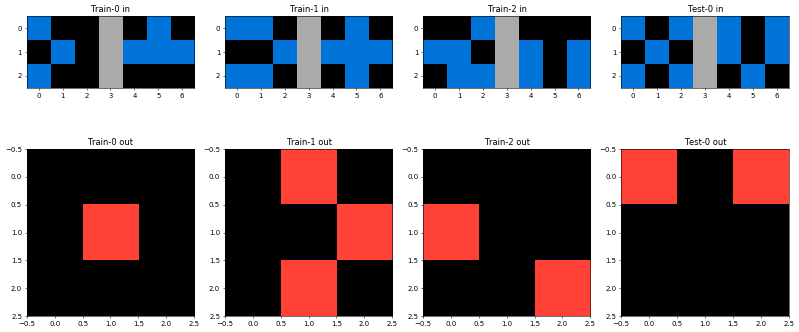

In [15]:
for t in diz_train['t1_2']:
    plot_task(get_task(index=t))
    break

for t in diz_eval['t1_3']:
    plot_task(get_task('eval', t, True))
    

# PROVE

In [16]:
task=get_task()

In [23]:
tf.constant(task['train'][0]['input'])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 7, 7],
       [7, 7, 7],
       [0, 7, 7]])>

In [22]:
tf.one_hot(task['train'][0]['input'], 10)

<tf.Tensor: shape=(3, 3, 10), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]], dtype=float32)>

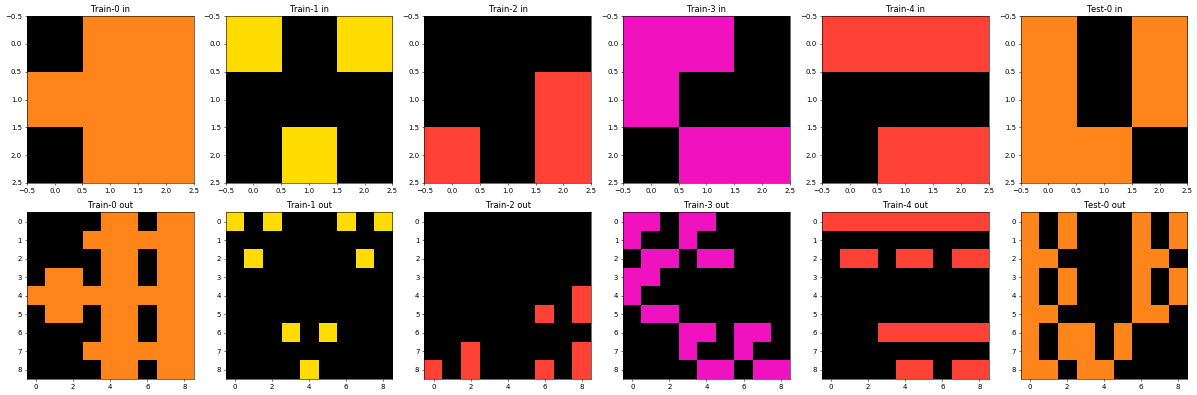

In [16]:
plot_task(task)

In [24]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))


In [109]:
def build_model():
    images = tf.keras.layers.Input(shape=(3,3,10))
    conv=images
    upsamp=tf.keras.layers.UpSampling2D((3,3))(conv)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=1)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Dense(100,activation='elu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001),use_bias=False)(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100,activation='elu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001),use_bias=False)(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100,activation='elu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001),use_bias=False)(conv)
    conv=tf.keras.layers.Dense(10,activation='elu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001),use_bias=False)(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [78]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    conv=tf.keras.layers.Flatten()(images)
    #conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(inp_dim[0]*inp_dim[1]*10)(conv)
    conv=tf.keras.layers.Dense(out_dim[0]*out_dim[1]*10)(conv)
    conv=tf.keras.layers.Reshape(target_shape=(out_dim[0], out_dim[1], 10))(conv)
    conv=tf.keras.layers.Dense(10)(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [72]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    conv=tf.keras.layers.Dropout(rate=0.15)(conv) 
    conv=tf.keras.layers.Flatten()(images)
    conv=tf.keras.layers.Dense(inp_dim[0]*inp_dim[1]*10)(conv) 
    conv=tf.keras.layers.Dense(out_dim[0]*out_dim[1]*10)(conv)
    conv=tf.keras.layers.Reshape(target_shape=(out_dim[0], out_dim[1], 10))(conv)
    conv=tf.keras.layers.Dense(10)(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [110]:
model=build_model()
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 3, 3, 10)]   0                                            
__________________________________________________________________________________________________
concatenate_18 (Concatenate)    (None, 9, 3, 10)     0           input_15[0][0]                   
                                                                 input_15[0][0]                   
                                                                 input_15[0][0]                   
__________________________________________________________________________________________________
concatenate_19 (Concatenate)    (None, 9, 9, 10)     0           concatenate_18[0][0]             
                                                                 concatenate_18[0][0]      

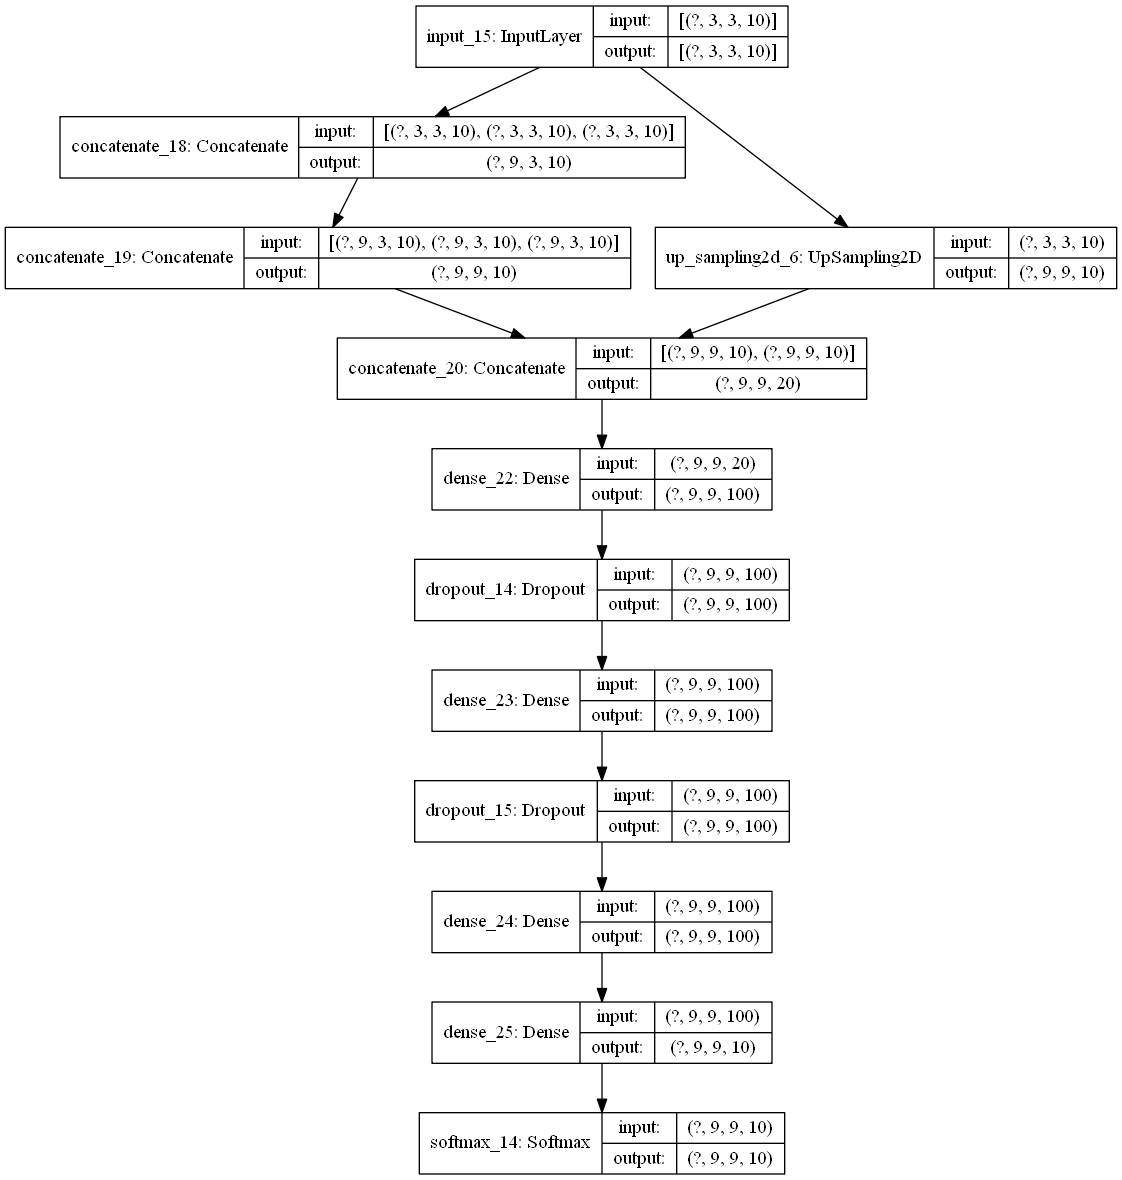

In [111]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

In [112]:
EPOCHS = 5

history = model.fit(trainset.batch(5),validation_data=valset.batch(1),  epochs=EPOCHS)

Train for 1 steps, validate for 1 steps
Epoch 1/5
1/1 [==============================] - 1s 942ms/step - loss: 2.3365 - mse: 0.0851 - accuracy: 0.5580 - val_loss: 1.1806 - val_mse: 0.0412 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 1.1442 - mse: 0.0372 - accuracy: 0.9506 - val_loss: 0.5096 - val_mse: 0.0066 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 0.6163 - mse: 0.0144 - accuracy: 0.9358 - val_loss: 0.3110 - val_mse: 4.4455e-04 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 29ms/step - loss: 0.4475 - mse: 0.0084 - accuracy: 0.9753 - val_loss: 0.2754 - val_mse: 2.6511e-05 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 0.3472 - mse: 0.0034 - accuracy: 0.9802 - val_loss: 0.2725 - val_mse: 1.8830e-06 - val_accuracy: 1.0000


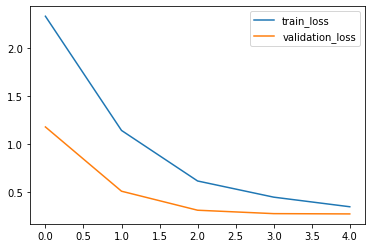

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

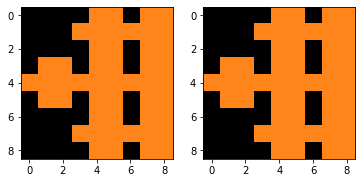

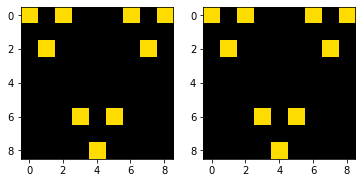

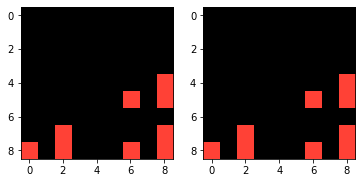

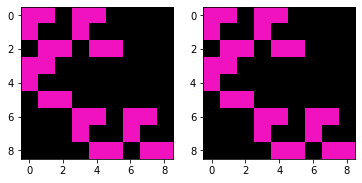

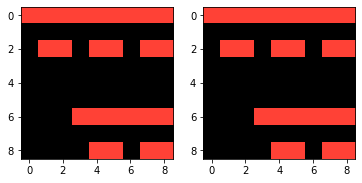

In [114]:
for xb, yb in trainset.batch(5).take(1):
    for i in range(0,5):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

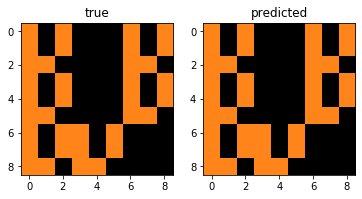

In [115]:
for xb, yb in valset.batch(1):
    for i in range(0,1):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.title('true')
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.title('predicted')
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

# Generalizzazione t 1_3

In [25]:
task=get_task( 'eval', diz_eval['t1_3'][1])

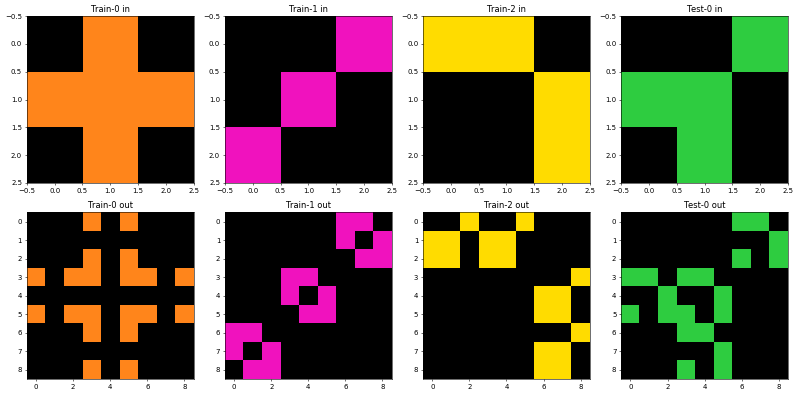

In [26]:
plot_task(task)

In [27]:
model=build_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 3, 10)]   0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 9, 3, 10)     0           input_2[0][0]                    
                                                                 input_2[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 9, 9, 10)     0           concatenate_3[0][0]              
                                                                 concatenate_3[0][0]        

In [28]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))


In [29]:
def build_model():
    images = tf.keras.layers.Input(shape=(3,3,10))
    conv=tf.keras.layers.Conv2D(filters=10, kernel_size=(1,1),
                          padding='same', activation='elu')(images)
    upsamp=tf.keras.layers.UpSampling2D((3,3))(conv)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=1)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(10, kernel_size=(1,1), padding='same', activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.01))(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.01))(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.01))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [30]:
EPOCHS = 30

history = model.fit(trainset.batch(5),validation_data=valset.batch(1),  epochs=EPOCHS)

Train for 1 steps, validate for 1 steps
Epoch 1/30
1/1 [==============================] - 1s 784ms/step - loss: 2.6217 - mse: 0.0916 - accuracy: 0.0288 - val_loss: 1.9951 - val_mse: 0.0670 - val_accuracy: 0.5556
Epoch 2/30
1/1 [==============================] - 0s 25ms/step - loss: 1.5340 - mse: 0.0557 - accuracy: 0.7984 - val_loss: 1.6512 - val_mse: 0.0470 - val_accuracy: 0.5556
Epoch 3/30
1/1 [==============================] - 0s 25ms/step - loss: 0.8765 - mse: 0.0271 - accuracy: 0.7737 - val_loss: 1.6908 - val_mse: 0.0468 - val_accuracy: 0.5556
Epoch 4/30
1/1 [==============================] - 0s 26ms/step - loss: 0.5367 - mse: 0.0125 - accuracy: 0.9671 - val_loss: 1.8940 - val_mse: 0.0502 - val_accuracy: 0.5556
Epoch 5/30
1/1 [==============================] - 0s 29ms/step - loss: 0.3747 - mse: 0.0038 - accuracy: 0.9959 - val_loss: 2.1412 - val_mse: 0.0525 - val_accuracy: 0.5556
Epoch 6/30
1/1 [==============================] - 0s 25ms/step - loss: 0.3065 - mse: 8.1605e-04 - accura

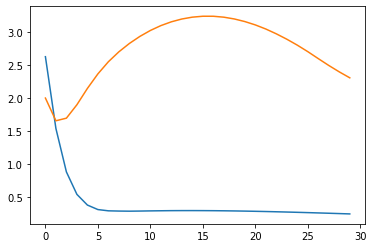

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

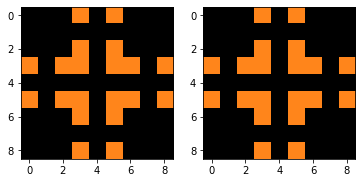

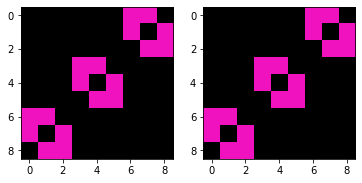

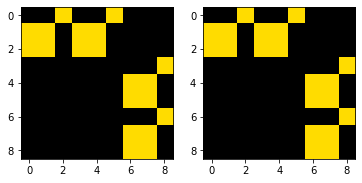

In [32]:
for xb, yb in trainset.batch(3).take(1):
    for i in range(0,3):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

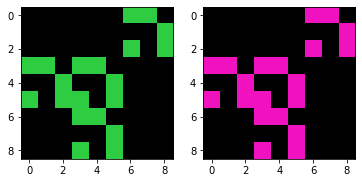

In [33]:
for xb, yb in valset.batch(1):
    for i in range(0,1):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

# PROVA 2

In [34]:
task=get_task( 'eval', diz_eval['t1_3'][0])

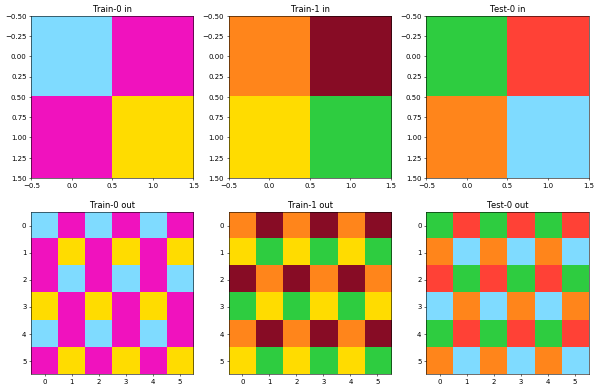

In [35]:
plot_task(task)

In [36]:
inp_dim=np.array(np.array(task['train'][0]['input']).shape)
out_dim=np.array(np.array(task['train'][0]['output']).shape)

In [37]:
rapp=out_dim//inp_dim
rapp

array([3, 3], dtype=int32)

In [38]:
def build_model():
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv=tf.keras.layers.Conv2D(filters=10, kernel_size=(1,1),
                               padding='same', activation='elu',
                               kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    upsamp=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv)
    conv=tf.keras.layers.concatenate([conv]*rapp[0], axis=1)
    conv=tf.keras.layers.concatenate([conv]*rapp[1], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(100, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.1)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [39]:
model=build_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2, 2, 10)]   0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 2, 2, 10)     110         input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 6, 2, 10)     0           conv2d_8[0][0]                   
                                                                 conv2d_8[0][0]                   
                                                                 conv2d_8[0][0]                   
____________________________________________________________________________________________

In [40]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))


In [41]:
EPOCHS = 30

history = model.fit(trainset.batch(5),validation_data=valset.batch(1),  epochs=EPOCHS)

Train for 1 steps, validate for 1 steps
Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 2.5825 - mse: 0.0903 - accuracy: 0.0972 - val_loss: 2.3481 - val_mse: 0.0860 - val_accuracy: 0.4167
Epoch 2/30
1/1 [==============================] - 0s 32ms/step - loss: 1.9602 - mse: 0.0720 - accuracy: 0.5556 - val_loss: 2.1928 - val_mse: 0.0831 - val_accuracy: 0.4167
Epoch 3/30
1/1 [==============================] - 0s 33ms/step - loss: 1.6360 - mse: 0.0594 - accuracy: 0.6250 - val_loss: 2.0575 - val_mse: 0.0758 - val_accuracy: 0.4444
Epoch 4/30
1/1 [==============================] - 0s 33ms/step - loss: 1.3856 - mse: 0.0544 - accuracy: 0.6528 - val_loss: 2.1347 - val_mse: 0.0743 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 30ms/step - loss: 1.2070 - mse: 0.0509 - accuracy: 0.6528 - val_loss: 2.4778 - val_mse: 0.0787 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 32ms/step - loss: 1.1194 - mse: 0.0501 - accuracy: 0.6

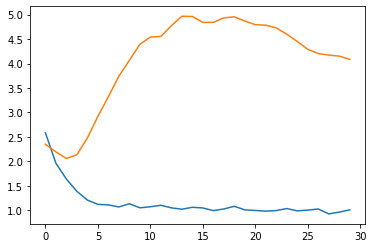

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

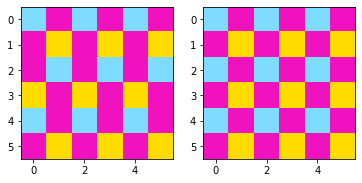

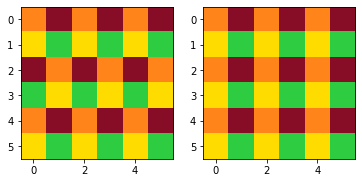

In [43]:
for xb, yb in trainset.batch(2).take(1):
    for i in range(0,2):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

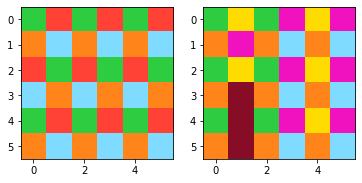

In [44]:
for xb, yb in valset.batch(1):
    for i in range(0,1):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

# LOOP

In [16]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    rapp=out_dim//inp_dim
    out_flat=out_dim[0]*out_dim[1]*10
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    upsamp=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv)
    if rapp[0]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[0], axis=1)
    if rapp[1]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[1], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Flatten()(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(out_flat, activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Reshape(target_shape=(out_dim[0], out_dim[1], 10))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [46]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    rapp=out_dim//inp_dim
    
    
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    
    
    conv = images
    upsamp=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv)
    if rapp[0]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[0], axis=1)
    if rapp[1]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[1], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(500, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    
    conv2 = tf.image.flip_up_down(images)
    upsamp2=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv2)
    if rapp[0]>1:
        conv2=tf.keras.layers.concatenate([conv2]*rapp[0], axis=1)
    if rapp[1]>1:
        conv2=tf.keras.layers.concatenate([conv2]*rapp[1], axis=2)
    conv2=tf.keras.layers.concatenate([conv2, upsamp2])
    conv2=tf.keras.layers.Conv2D(500, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv2)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    conv2=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv2)
    
    conv=tf.keras.layers.concatenate([conv, conv2])
    conv=tf.keras.layers.Conv2D(500, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    
    
    conv3 = tf.image.flip_left_right(images)
    upsamp3=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv3)
    if rapp[0]>1:
        conv3=tf.keras.layers.concatenate([conv3]*rapp[0], axis=1)
    if rapp[1]>1:
        conv3=tf.keras.layers.concatenate([conv3]*rapp[1], axis=2)
    conv3=tf.keras.layers.concatenate([conv3, upsamp3])
    conv3=tf.keras.layers.Conv2D(500, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv3)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    conv3=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv3)
    
    conv=tf.keras.layers.concatenate([conv, conv2, conv3])
    conv=tf.keras.layers.Conv2D(500, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    
    
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [116]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    rapp=out_dim//inp_dim
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    upsamp=tf.keras.layers.UpSampling2D((rapp[0],rapp[1]))(conv)
    if rapp[0]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[0], axis=1)
    if rapp[1]>1:
        conv=tf.keras.layers.concatenate([conv]*rapp[1], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(100, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [117]:
model=build_model(task)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 3, 3, 10)]   0                                            
__________________________________________________________________________________________________
concatenate_21 (Concatenate)    (None, 9, 3, 10)     0           input_16[0][0]                   
                                                                 input_16[0][0]                   
                                                                 input_16[0][0]                   
__________________________________________________________________________________________________
concatenate_22 (Concatenate)    (None, 9, 9, 10)     0           concatenate_21[0][0]             
                                                                 concatenate_21[0][0]      

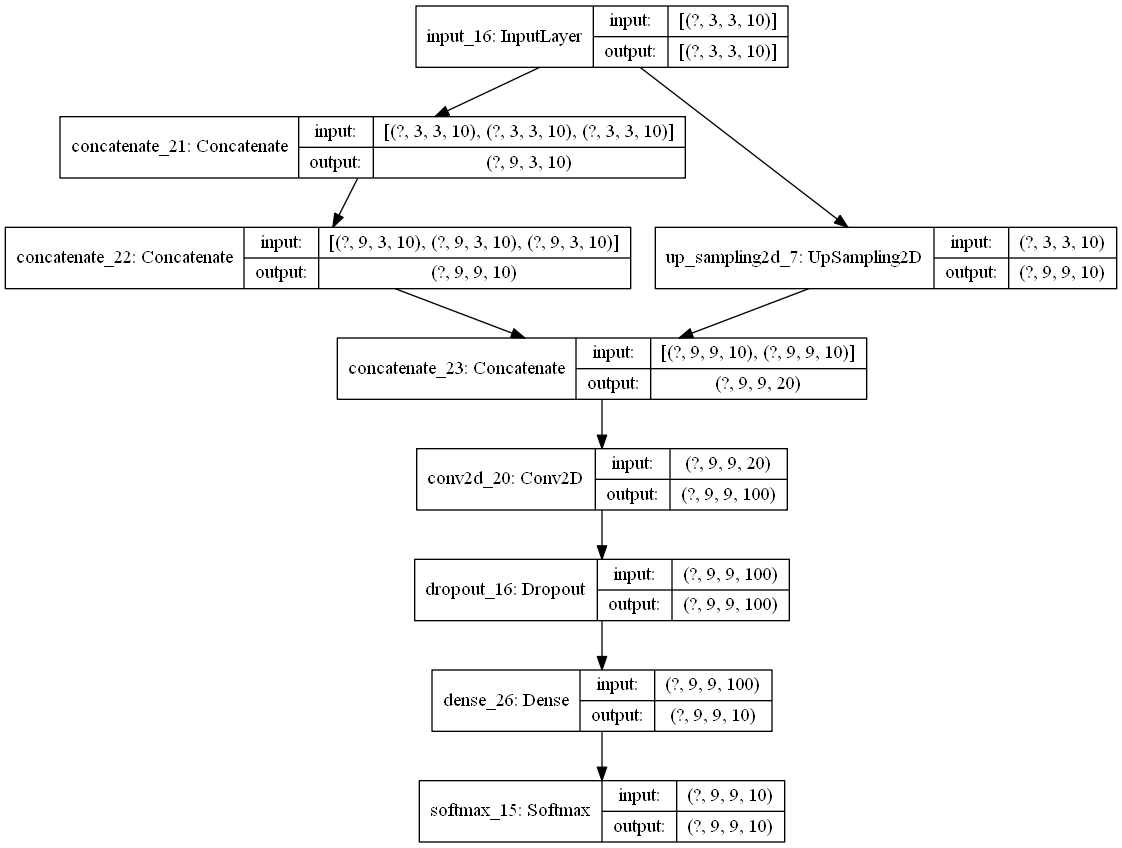

In [118]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

In [119]:
def preprocessing(data, label):
    return (tf.one_hot(data, 10), tf.one_hot(label, 10))

In [120]:
def col_aug(dat, lab):
    chang=tf.random.uniform(minval=1, maxval=9, shape=[6], dtype=tf.int32)
    dat=tf.where(dat==chang[0], chang[1], dat)
    dat=tf.where(dat==chang[2], chang[3], dat)
    dat=tf.where(dat==chang[4], chang[5], dat)
    lab=tf.where(lab==chang[0], chang[1], lab)
    lab=tf.where(lab==chang[2], chang[3], lab)
    lab=tf.where(lab==chang[4], chang[5], lab)
    return(dat, lab)

In [121]:
def loop(lista, dataset, aug=False, plot=True, epochs=50):
    solved=0
    errors=0
    for t in tqdm(lista):  
        task=(get_task(dataset, index=t))

        
        if plot is True:
            print('---------------------------------------------------------')
            plot_task(task)




        try:
            
            data=[]
            label=[]
            for pair in task['train']:
                dat=tf.constant(pair['input'])
                lab=tf.constant(pair['output'])
                data.append(dat)
                label.append(lab)
            trainset = tf.data.Dataset.from_tensor_slices((data, label))

            data=[]
            label=[]
            for pair in task['test']:
                dat=tf.constant(pair['input'])
                lab=tf.constant(pair['output'])
                data.append(dat)
                label.append(lab)
            valset = tf.data.Dataset.from_tensor_slices((data, label))            

            
            model=build_model(task)

            EPOCHS = epochs
            
            
            if aug==False:
                train=trainset.batch(len(task['train'])).map(preprocessing)
            else:
                train=trainset.batch(len(task['train'])).map(col_aug).map(preprocessing)
            history = model.fit(train,
                                validation_data=valset.batch(len(task['test'])).map(preprocessing),  epochs=EPOCHS, verbose=False)
            
            
            if plot is True:
                print('train acc: ', history.history['accuracy'][-1])
                print('valid acc: ', history.history['val_accuracy'][-1])
                
                for xb, yb in valset.batch((len(task['test']))).map(preprocessing):
                    for i in range(0,len(task['test'])):
                        true=tf.math.argmax(yb[i], axis=-1)
                        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
                        plt.subplot(1,2,1)
                        plt.title('true')
                        plt.imshow(true, cmap=cmap, norm=norm)
                        plt.subplot(1,2,2)
                        plt.imshow(pred, cmap=cmap, norm=norm)
                        plt.title('predicted')
                        plt.show()
            
            if history.history['val_accuracy'][-1]==1:
                solved+=1
                if plot=='onlysolved':
                    print('----------------------------------------------------------------------------')
                    
                    print('train acc: ', history.history['accuracy'][-1])
                    print('valid acc: ', history.history['val_accuracy'][-1])
                    
                    plot_task(task)
                    
                    for xb, yb in valset.batch((len(task['test']))).map(preprocessing):
                        for i in range(0,len(task['test'])):
                            true=tf.math.argmax(yb[i], axis=-1)
                            pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
                            plt.subplot(1,2,1)
                            plt.title('true')
                            plt.imshow(true, cmap=cmap, norm=norm)
                            plt.subplot(1,2,2)
                            plt.imshow(pred, cmap=cmap, norm=norm)
                            plt.title('predicted')
                            plt.show()
                    
        except:
            print('ooops')
            errors+=1
            #raise ValueError
    print('total tasks: ', len(lista))
    print('errors: ', errors)
    print('solved: ', solved)
        

---------------------------------------------------------


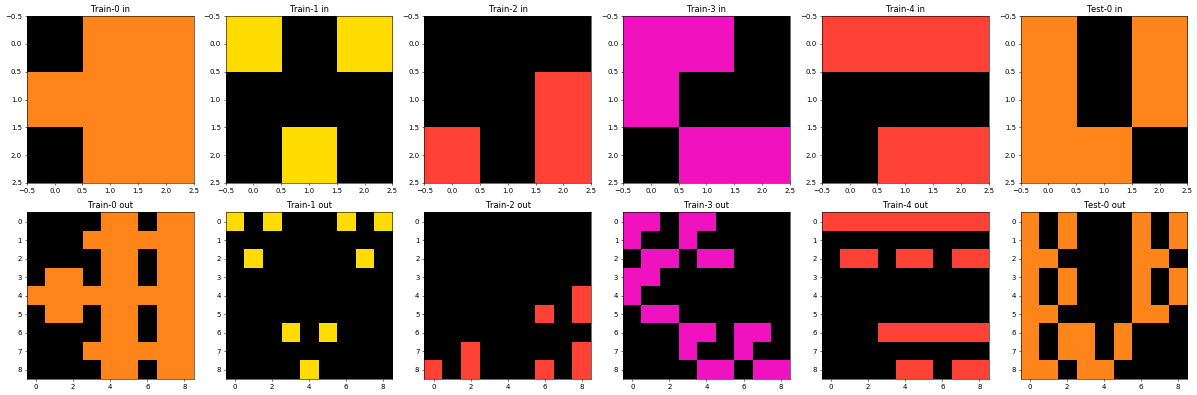

train acc:  1.0
valid acc:  1.0


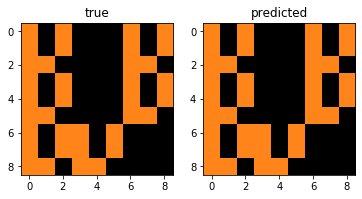

---------------------------------------------------------


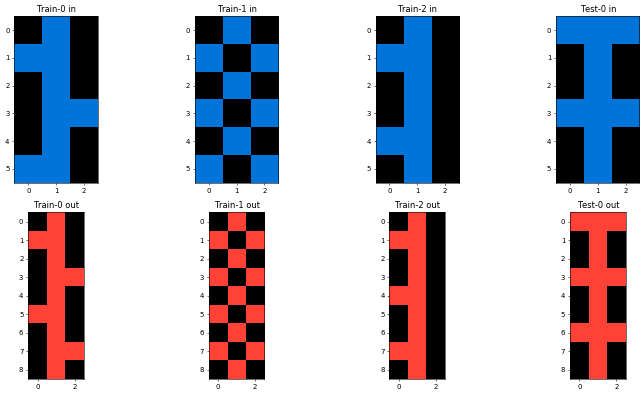

ooops
---------------------------------------------------------


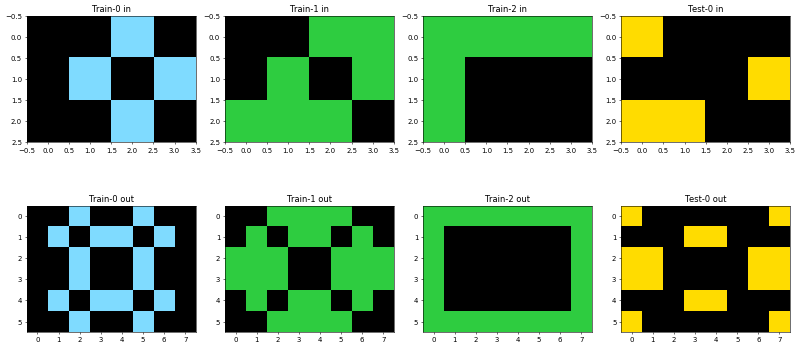

train acc:  0.6111111
valid acc:  0.6666667


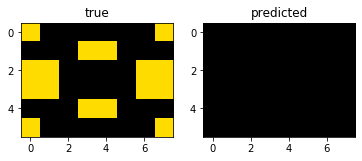

---------------------------------------------------------


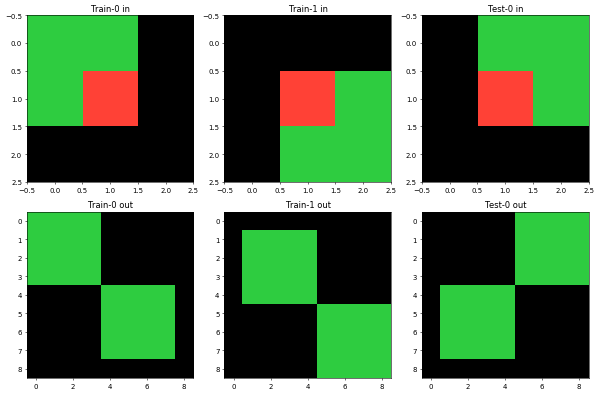

train acc:  0.63580245
valid acc:  0.654321


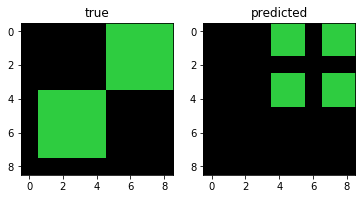

---------------------------------------------------------


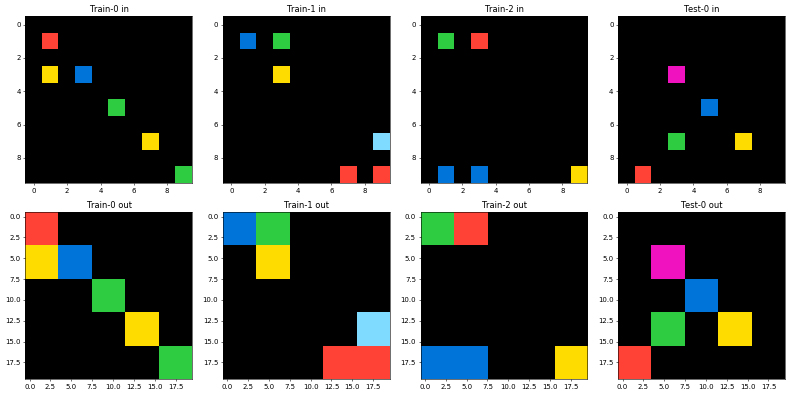

train acc:  0.83
valid acc:  0.84


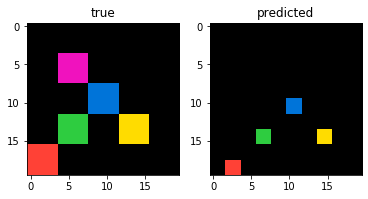

---------------------------------------------------------


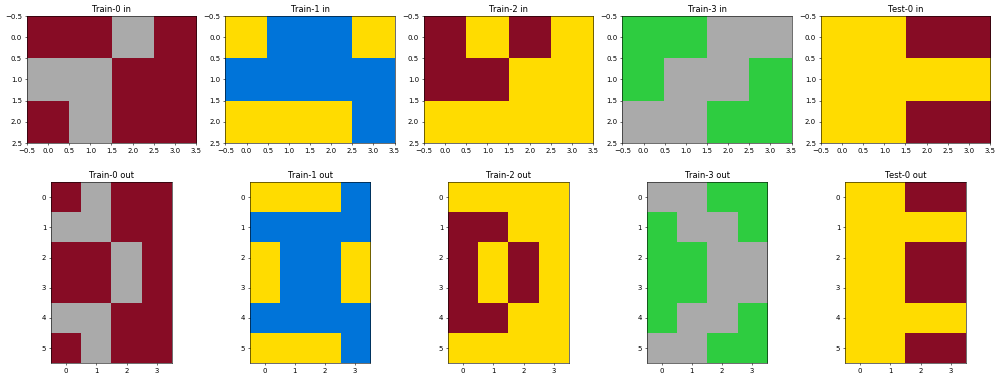

train acc:  0.7708333
valid acc:  1.0


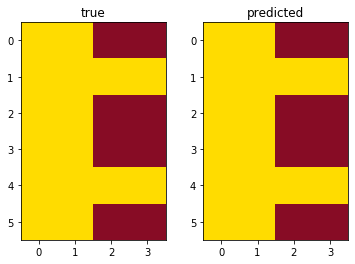

---------------------------------------------------------


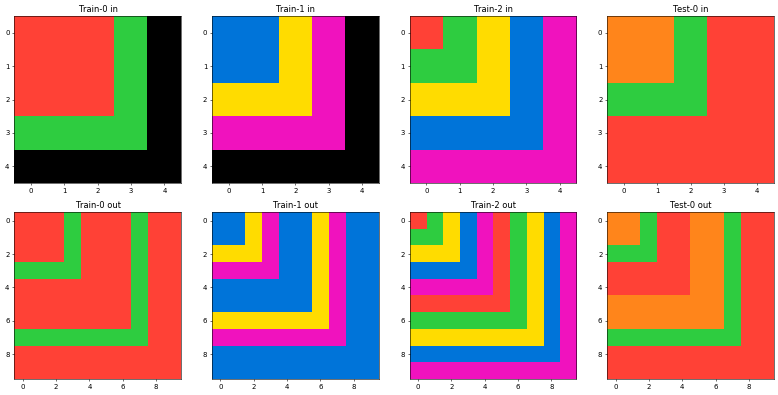

train acc:  0.73
valid acc:  0.68


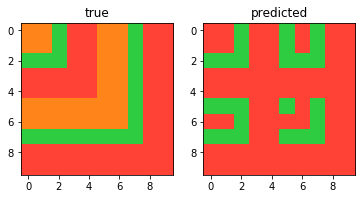

---------------------------------------------------------


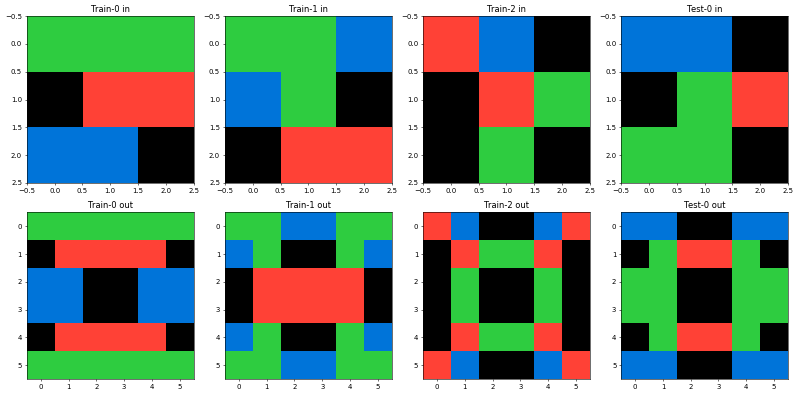

train acc:  0.5462963
valid acc:  0.41666666


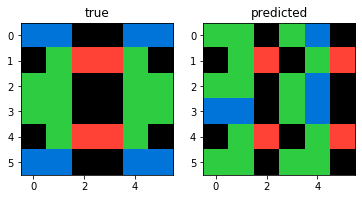

---------------------------------------------------------


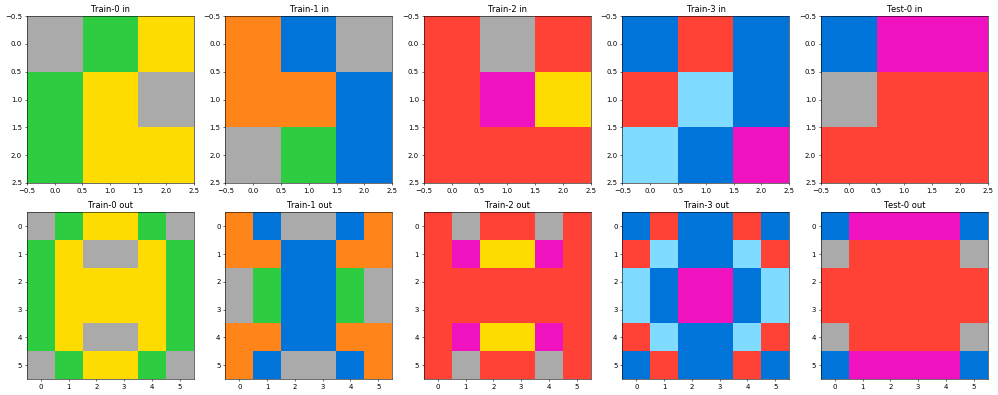

train acc:  0.5972222
valid acc:  0.4722222


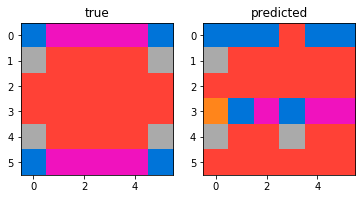

---------------------------------------------------------


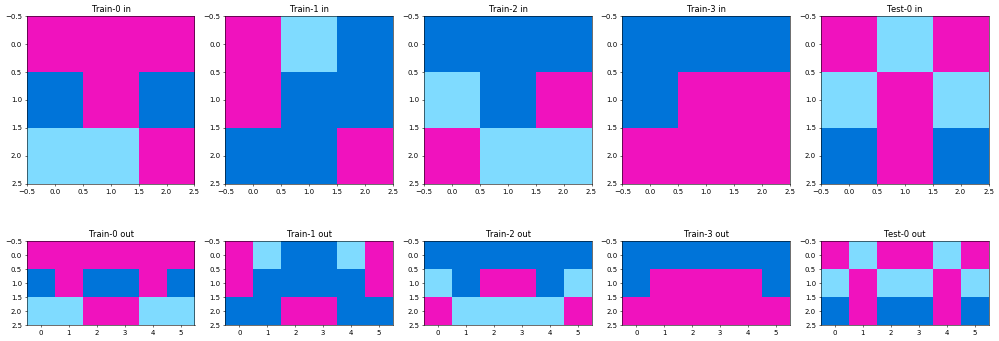

train acc:  0.7916667
valid acc:  1.0


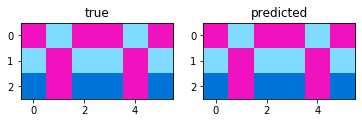

---------------------------------------------------------


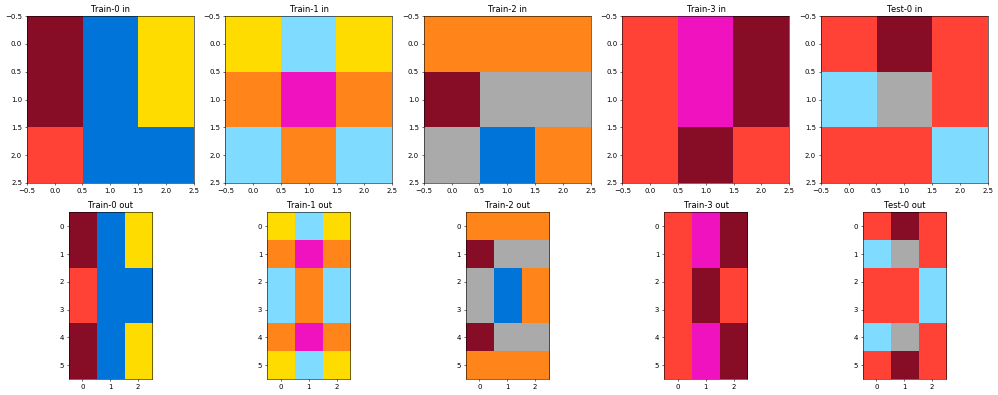

train acc:  0.8472222
valid acc:  0.5555556


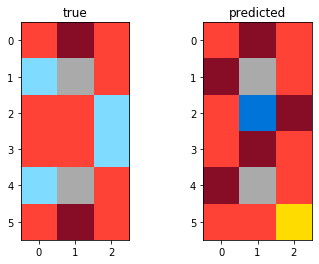

---------------------------------------------------------


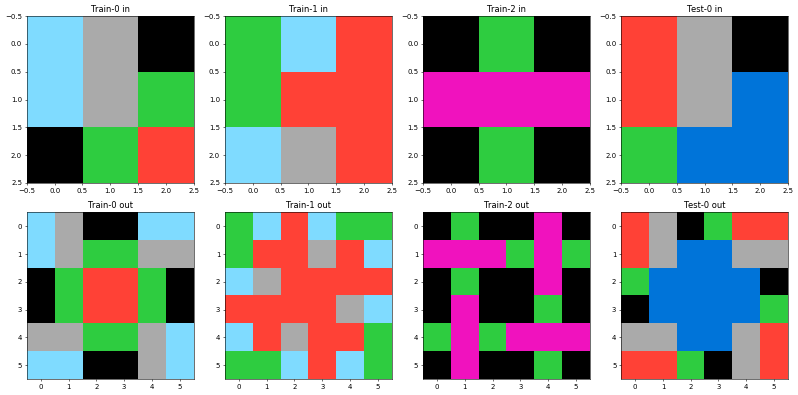

train acc:  0.5555556
valid acc:  0.25


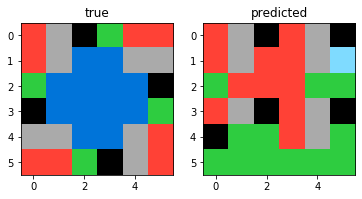

---------------------------------------------------------


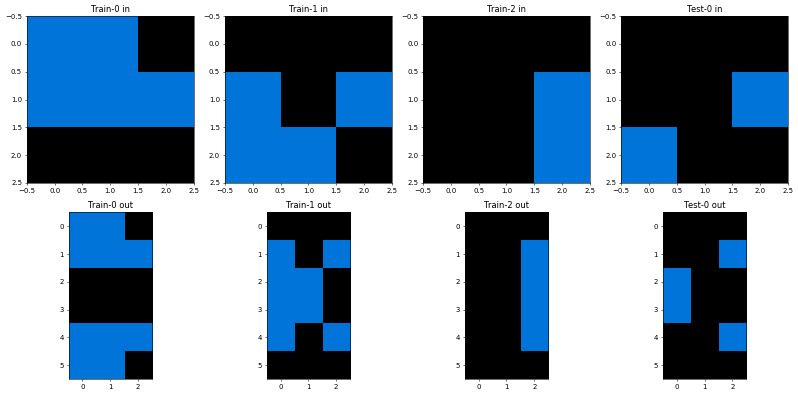

train acc:  0.8148148
valid acc:  0.8888889


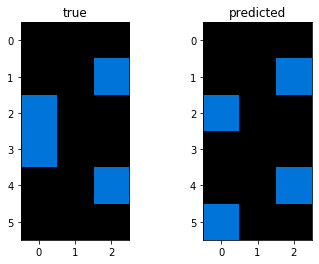

---------------------------------------------------------


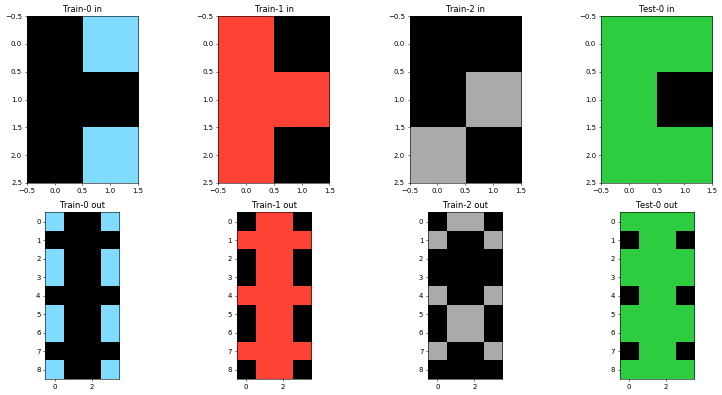

train acc:  0.6759259
valid acc:  0.16666667


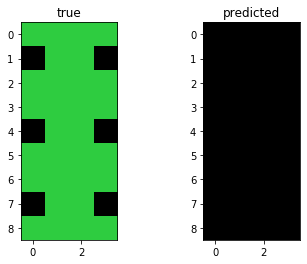

---------------------------------------------------------


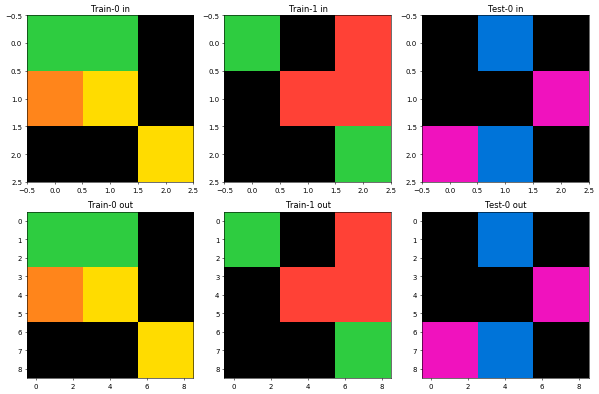

train acc:  1.0
valid acc:  0.5555556


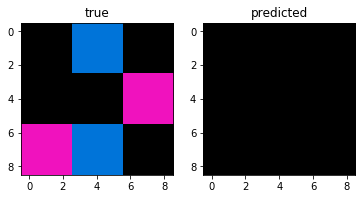

---------------------------------------------------------


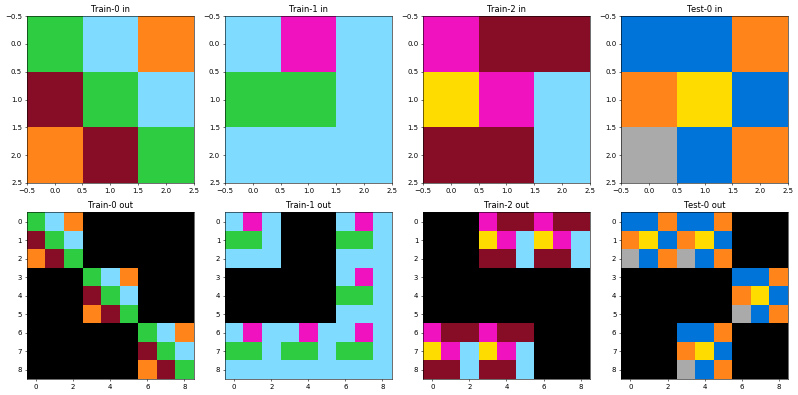

train acc:  0.8477366
valid acc:  0.5925926


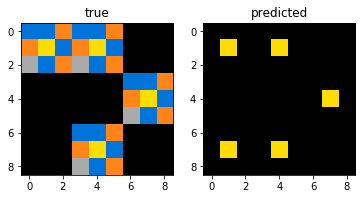

---------------------------------------------------------


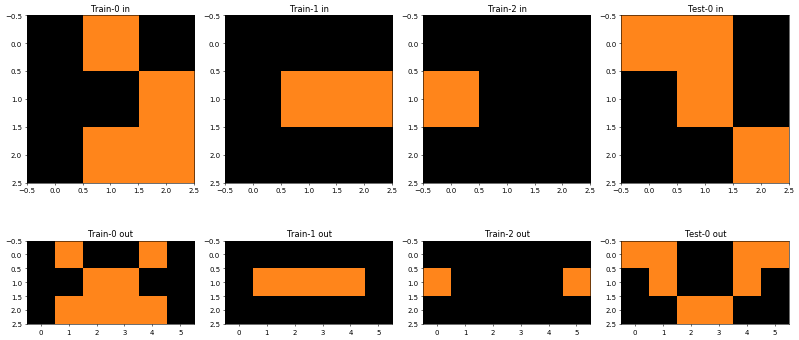

train acc:  0.8518519
valid acc:  0.7777778


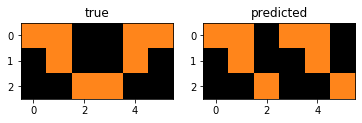

---------------------------------------------------------


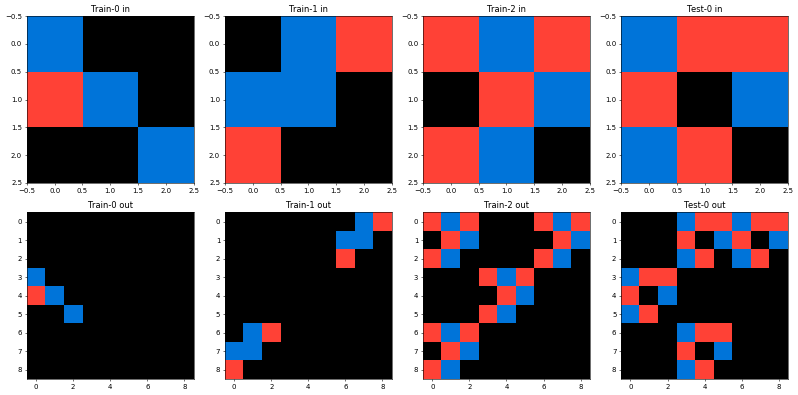

train acc:  1.0
valid acc:  1.0


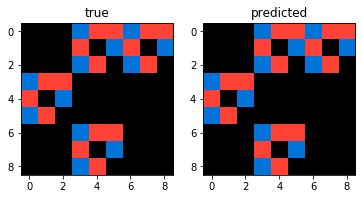

---------------------------------------------------------


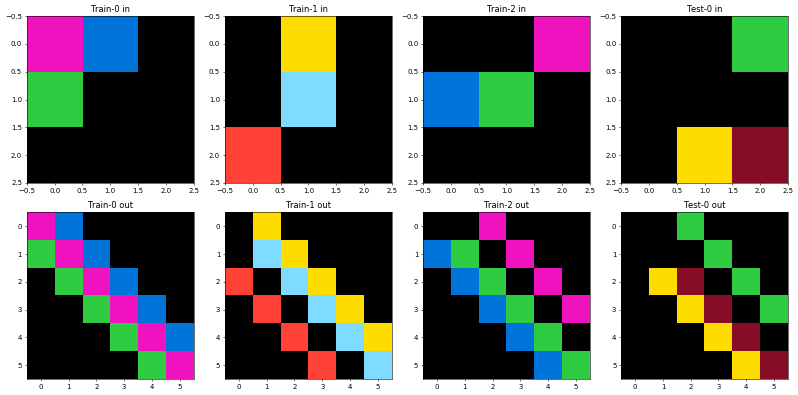

train acc:  0.7037037
valid acc:  0.6111111


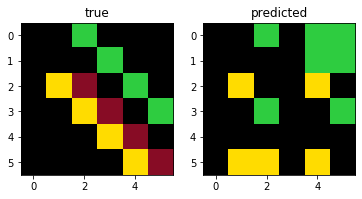


total tasks:  19
errors:  1
solved:  4


In [122]:
loop(diz_train['t1_3'], 'train')

---------------------------------------------------------


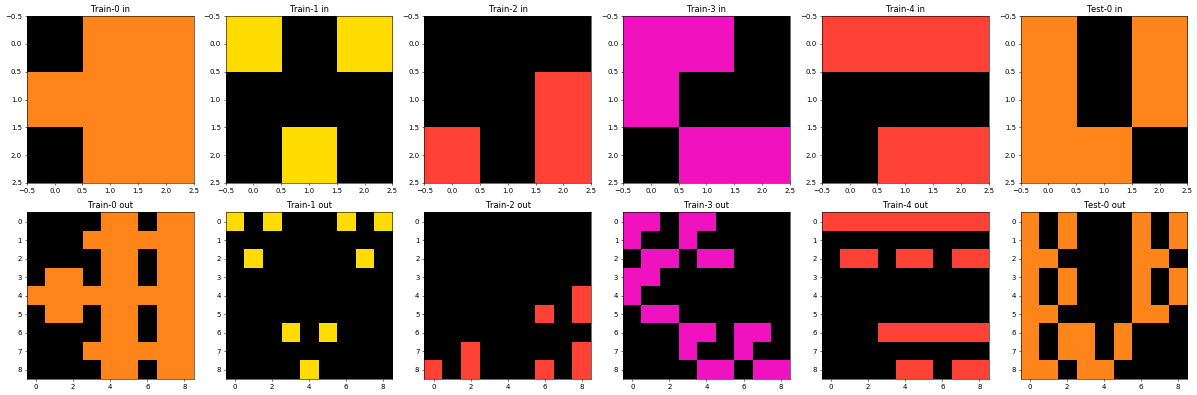

train acc:  1.0
valid acc:  1.0


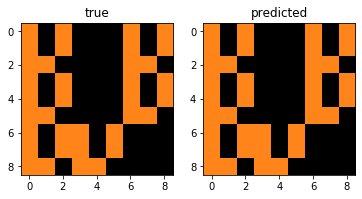

---------------------------------------------------------


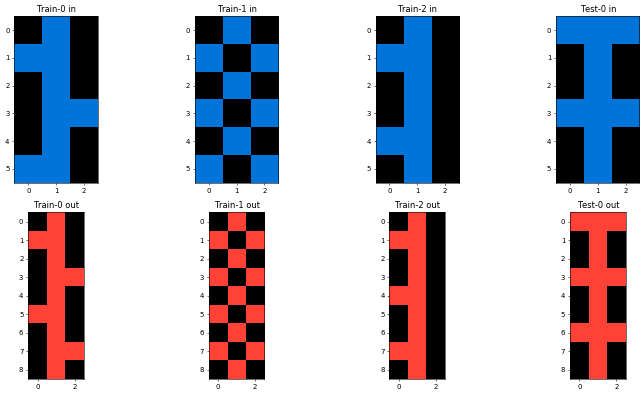

ooops
---------------------------------------------------------


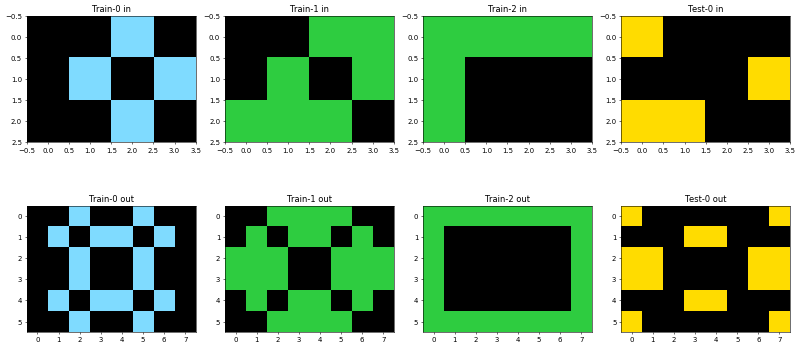

train acc:  0.5972222
valid acc:  0.6666667


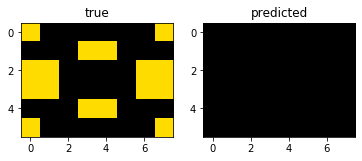

---------------------------------------------------------


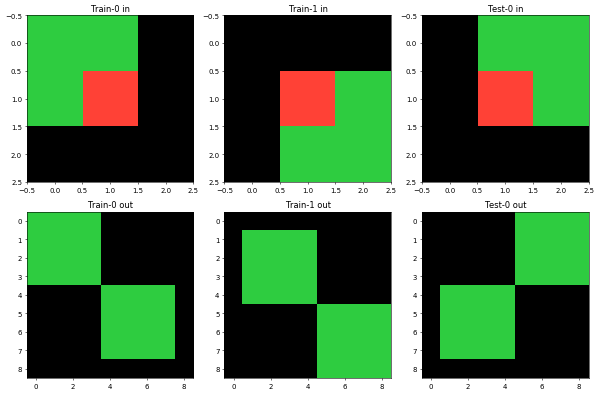

train acc:  0.6481481
valid acc:  0.6419753


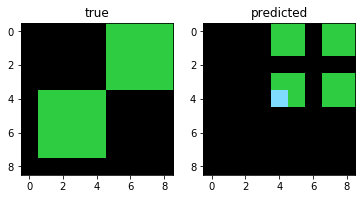

---------------------------------------------------------


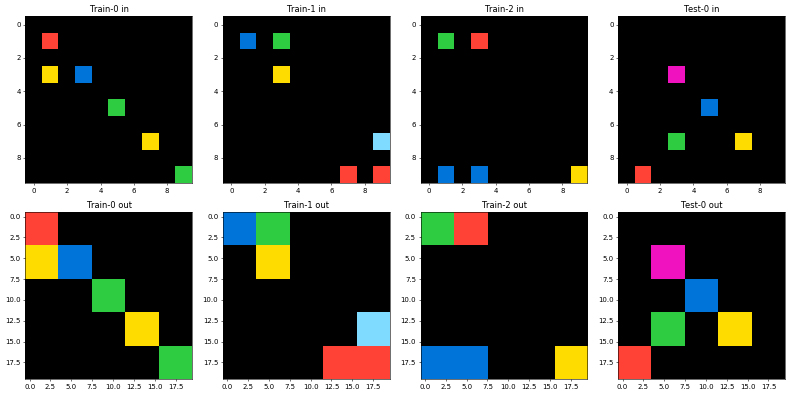

train acc:  0.82666665
valid acc:  0.8425


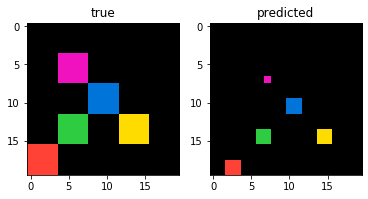

---------------------------------------------------------


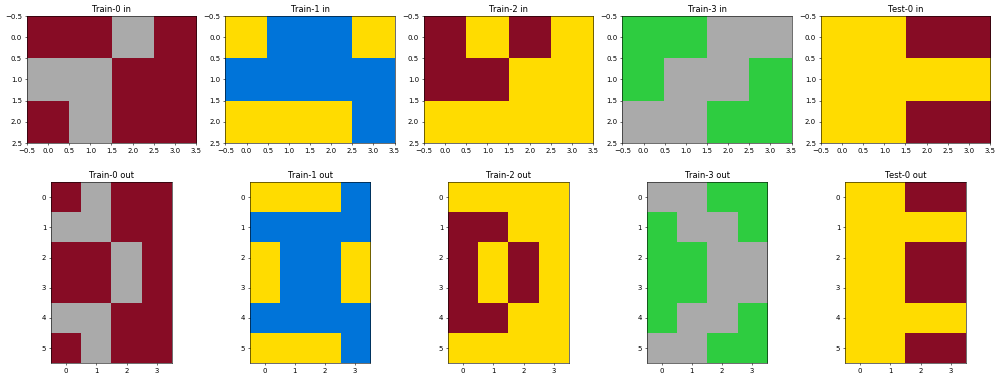

train acc:  0.7708333
valid acc:  1.0


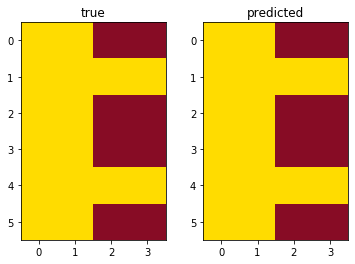

---------------------------------------------------------


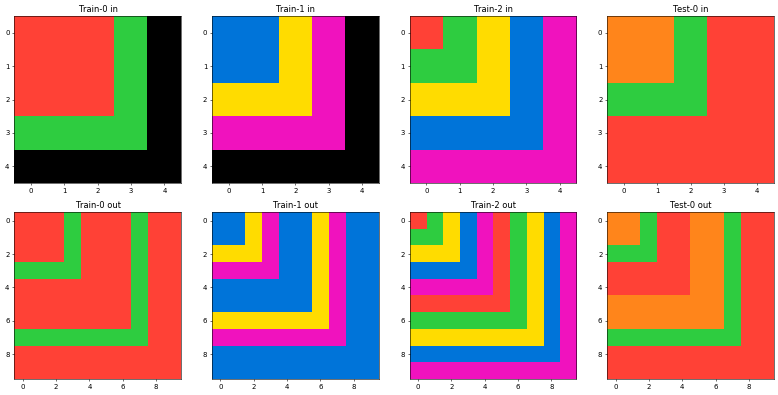

train acc:  0.63666666
valid acc:  0.63


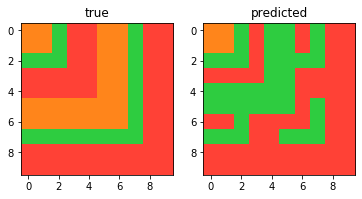

---------------------------------------------------------


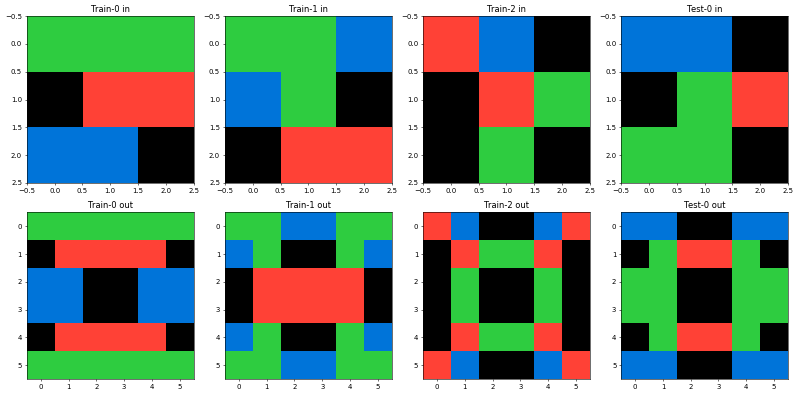

train acc:  0.5185185
valid acc:  0.41666666


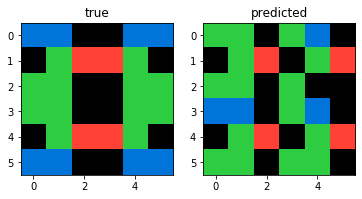

---------------------------------------------------------


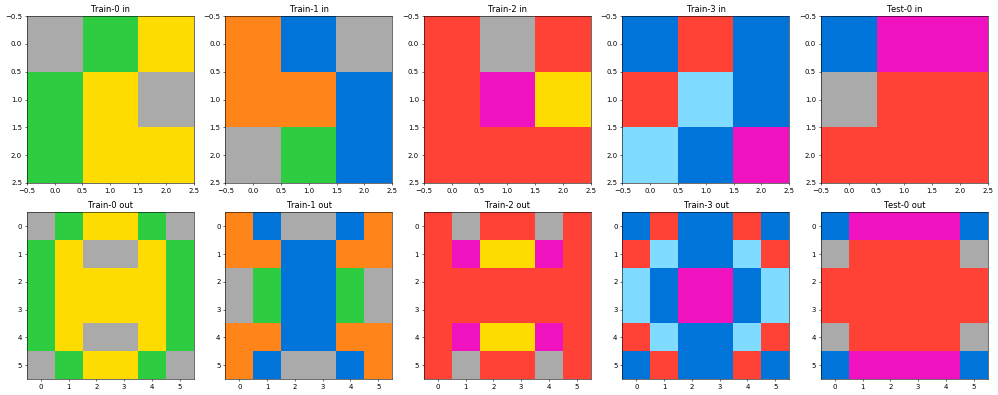

train acc:  0.625
valid acc:  0.4722222


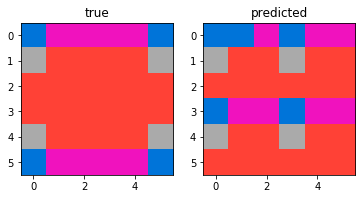

---------------------------------------------------------


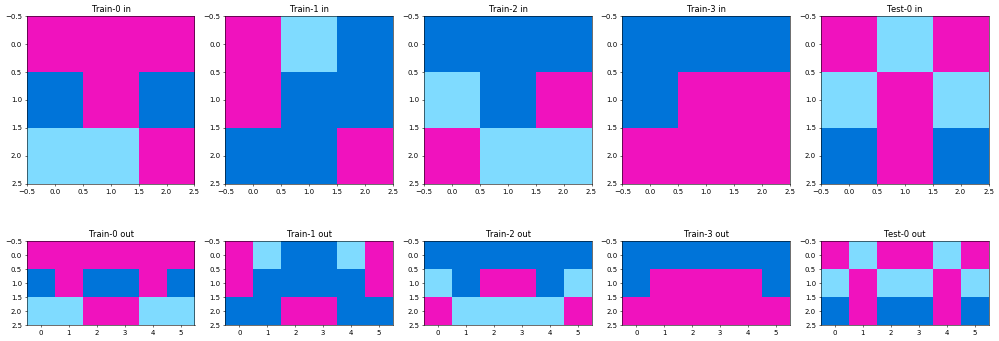

train acc:  0.8055556
valid acc:  1.0


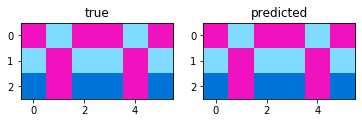

---------------------------------------------------------


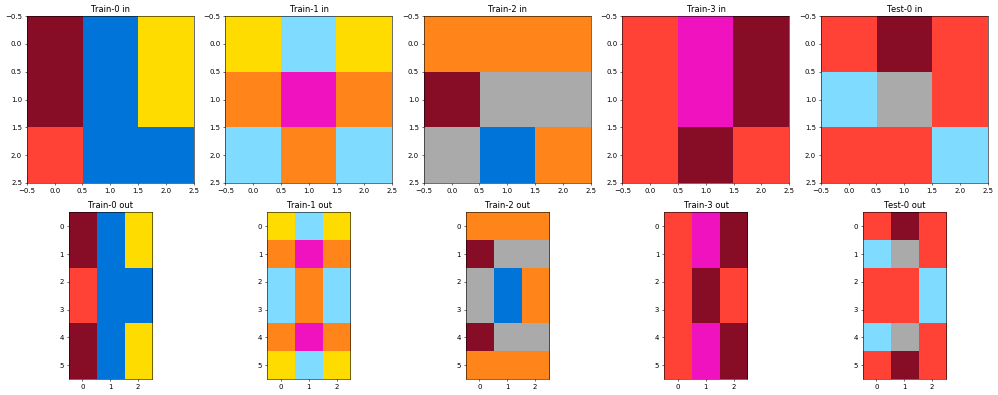

train acc:  0.7777778
valid acc:  0.7777778


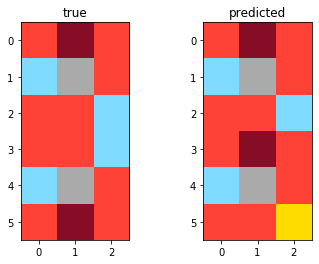

---------------------------------------------------------


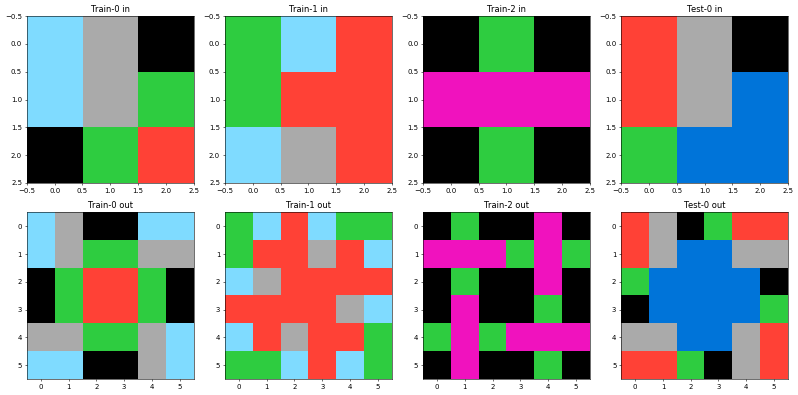

train acc:  0.4814815
valid acc:  0.3888889


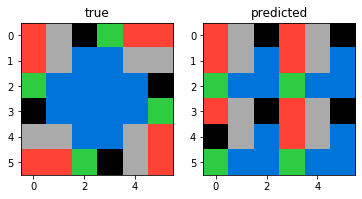

---------------------------------------------------------


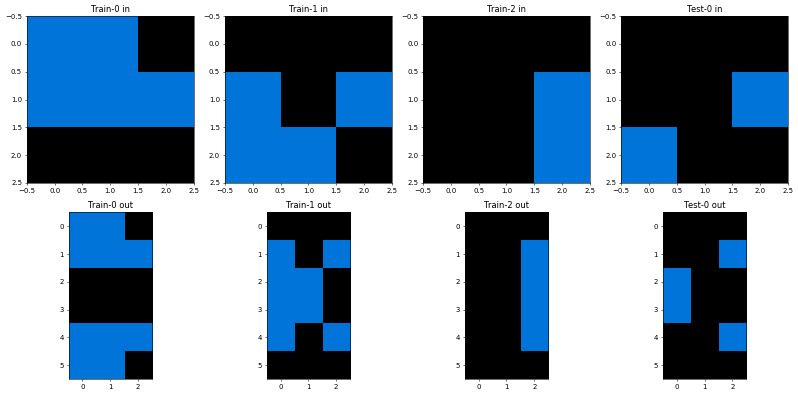

train acc:  0.8148148
valid acc:  0.8888889


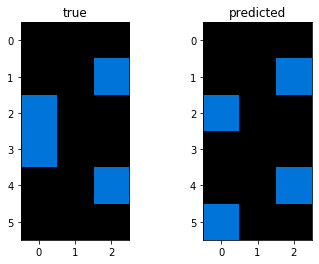

---------------------------------------------------------


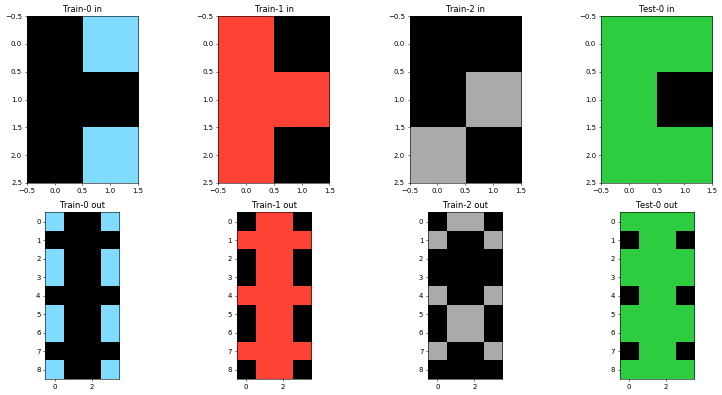

train acc:  0.6388889
valid acc:  0.16666667


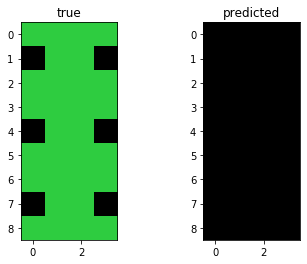

---------------------------------------------------------


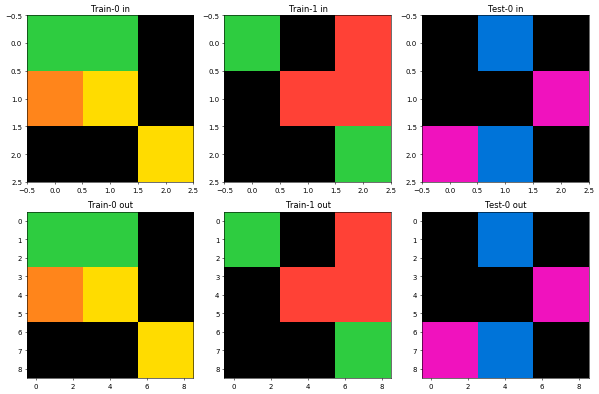

train acc:  1.0
valid acc:  1.0


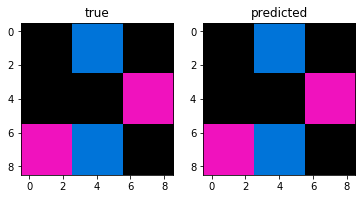

---------------------------------------------------------


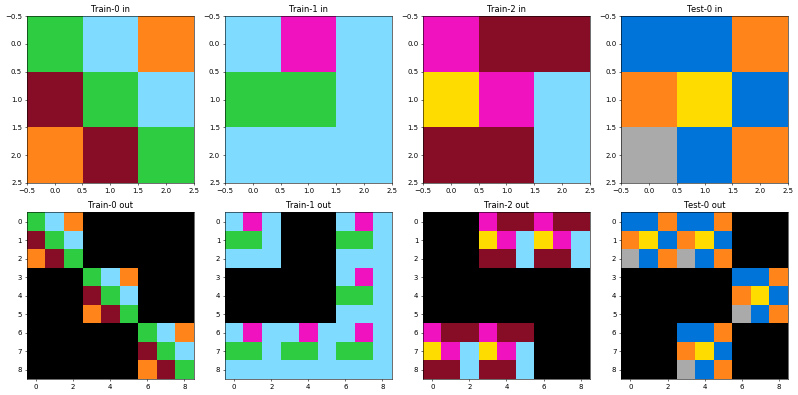

train acc:  0.6255144
valid acc:  0.54320985


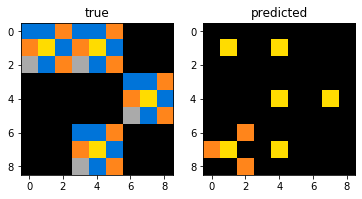

---------------------------------------------------------


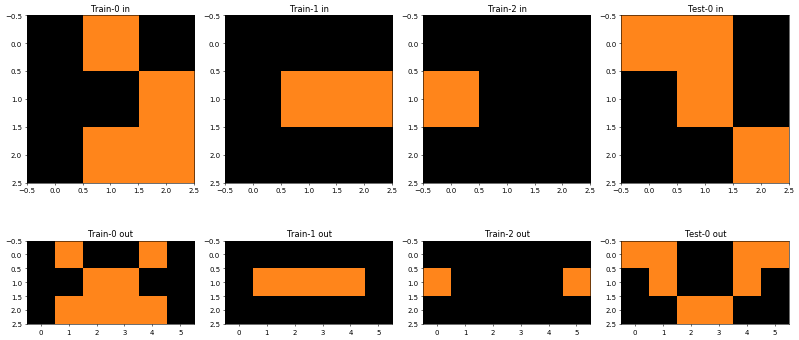

train acc:  0.8518519
valid acc:  0.7777778


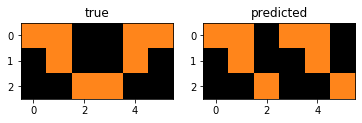

---------------------------------------------------------


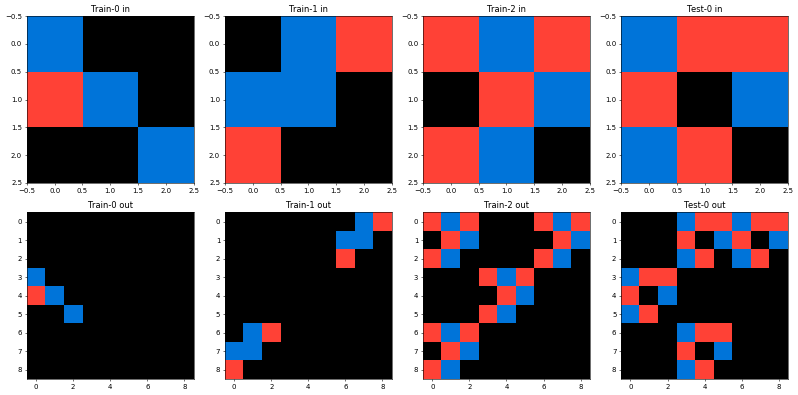

train acc:  1.0
valid acc:  1.0


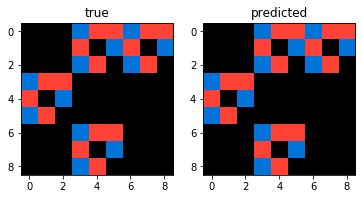

---------------------------------------------------------


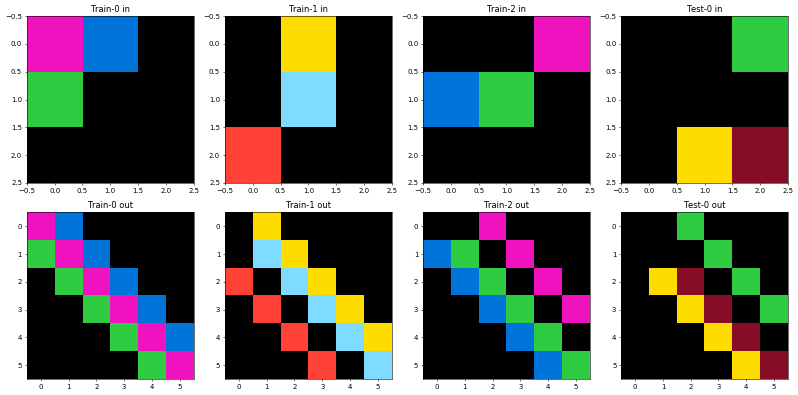

train acc:  0.6944444
valid acc:  0.6944444


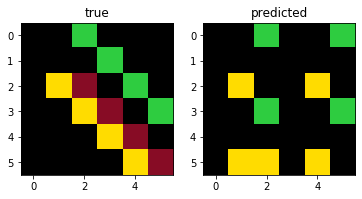


total tasks:  19
errors:  1
solved:  5


In [85]:
loop(diz_train['t1_3'], 'train', aug=True)

---------------------------------------------------------


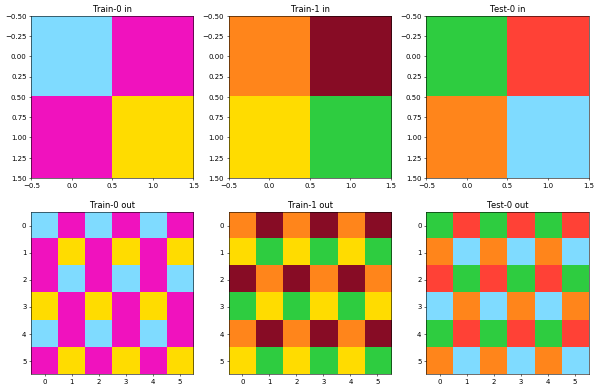

train acc:  0.6388889
valid acc:  0.4722222


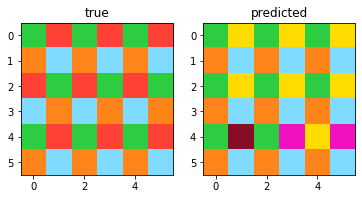

---------------------------------------------------------


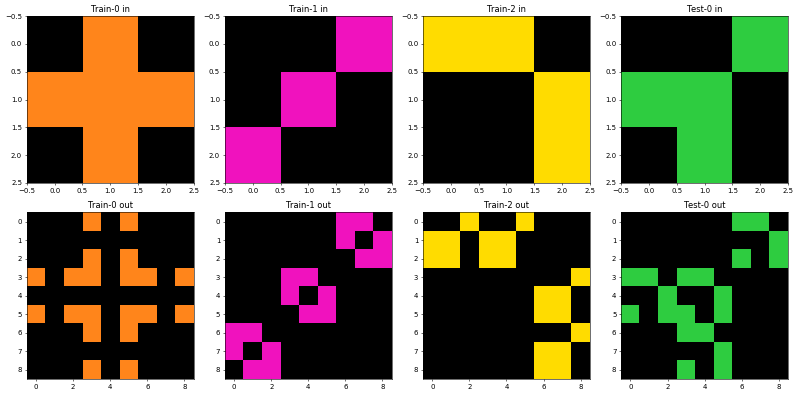

train acc:  1.0
valid acc:  0.75308645


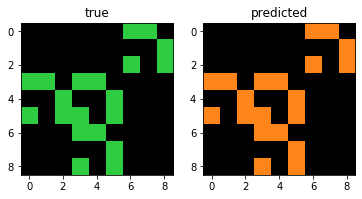

---------------------------------------------------------


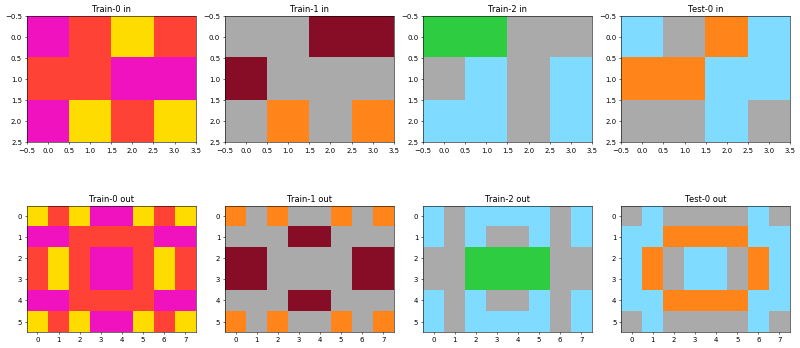

train acc:  0.5138889
valid acc:  0.375


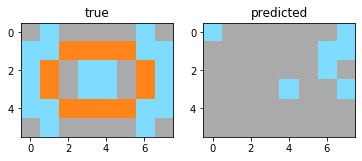

---------------------------------------------------------


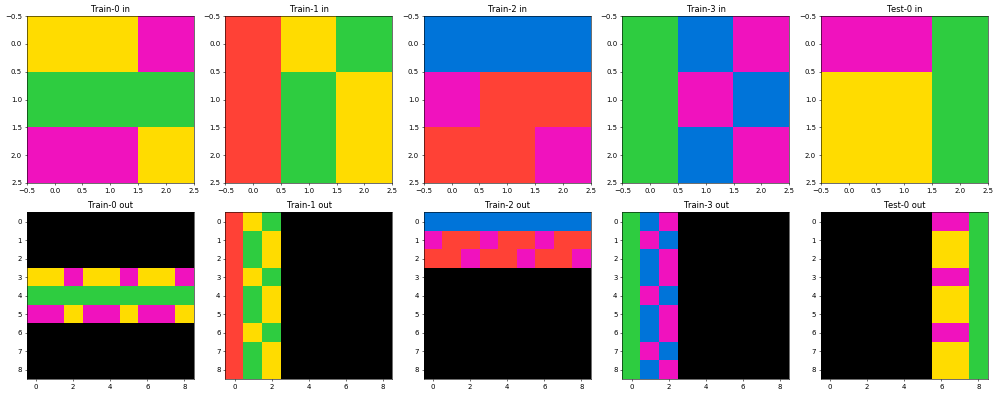

train acc:  0.8518519
valid acc:  1.0


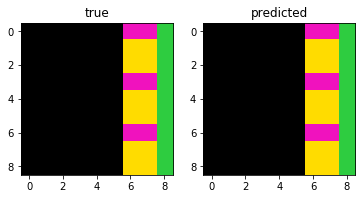

---------------------------------------------------------


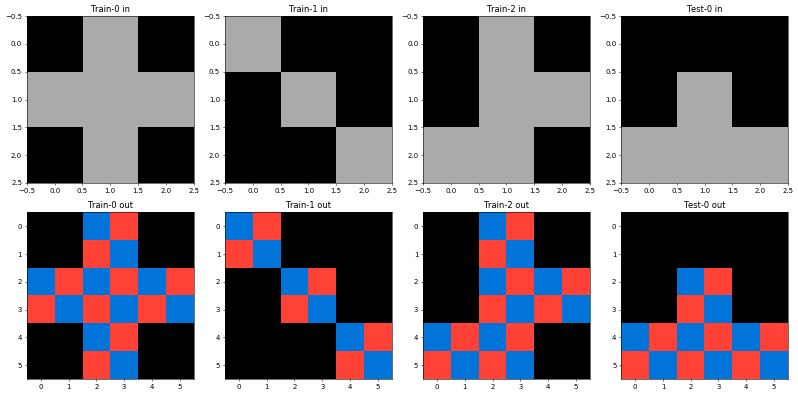

train acc:  0.7962963
valid acc:  0.7777778


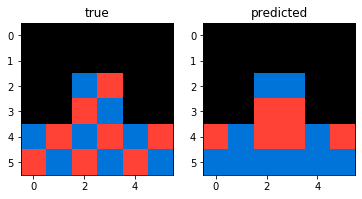

---------------------------------------------------------


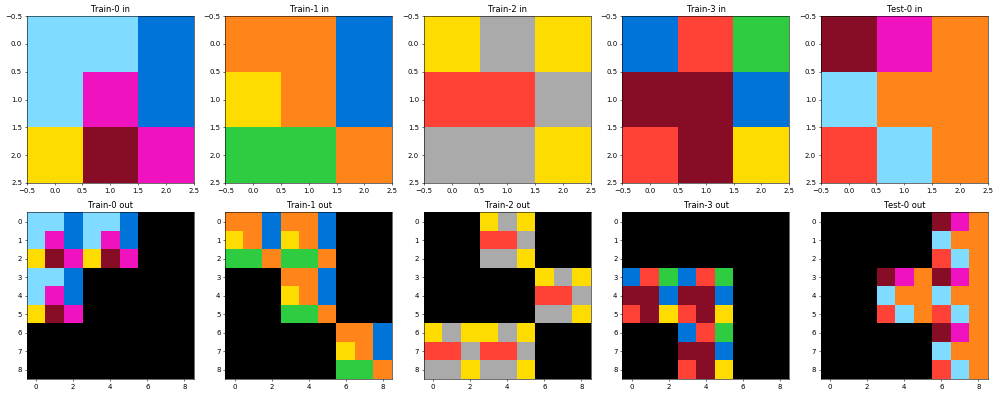

train acc:  0.9876543
valid acc:  0.75308645


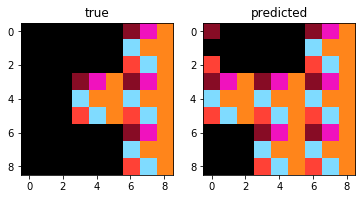

---------------------------------------------------------


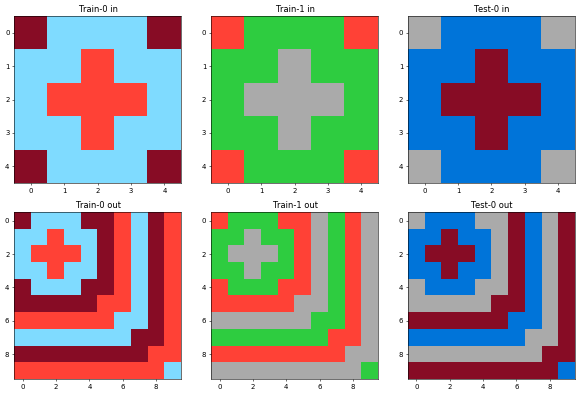

train acc:  0.455
valid acc:  0.0


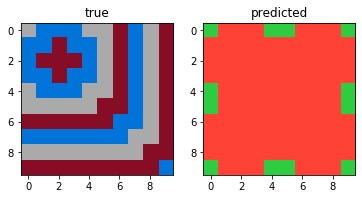

---------------------------------------------------------


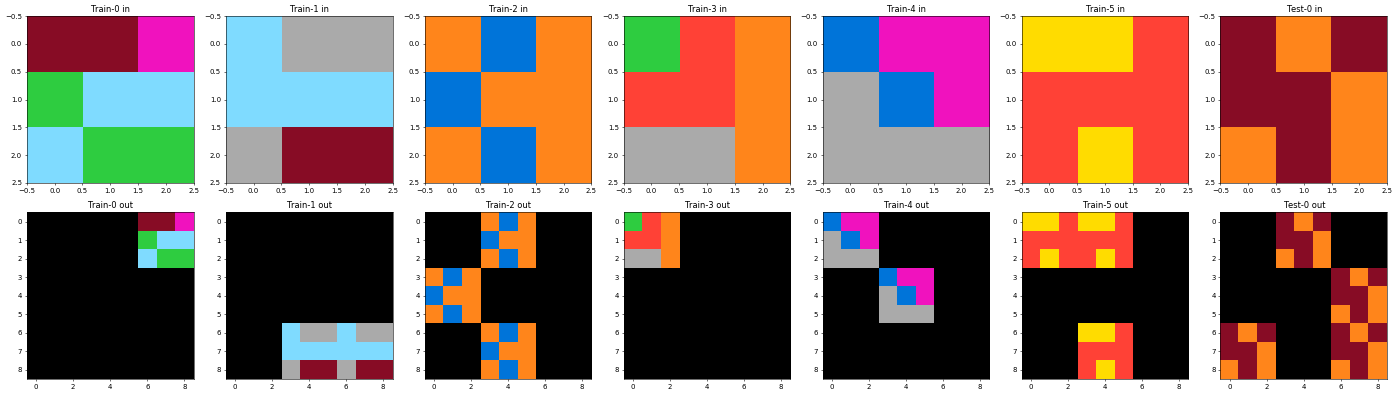

train acc:  0.9670782
valid acc:  0.0


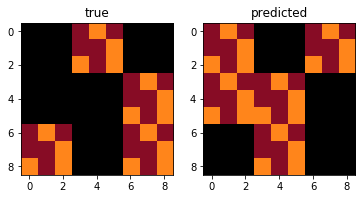

---------------------------------------------------------


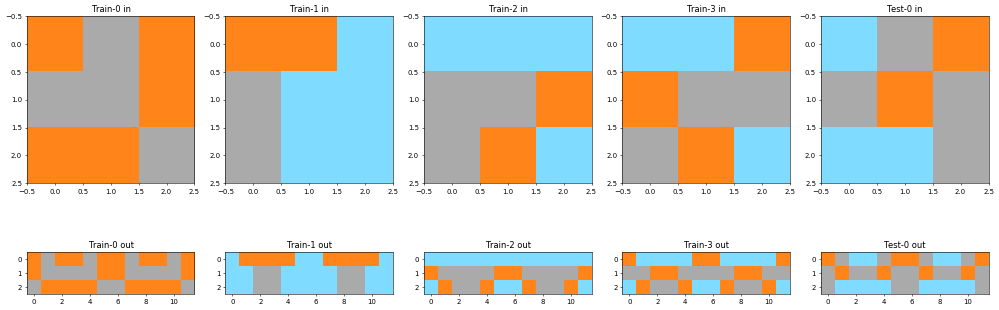

train acc:  0.7222222
valid acc:  0.7777778


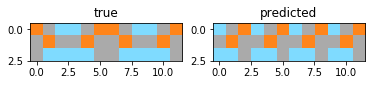

---------------------------------------------------------


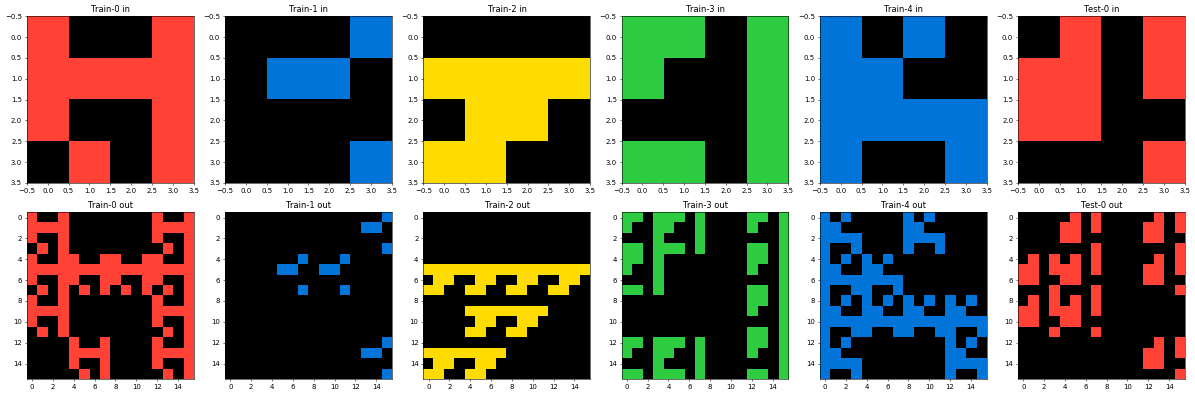

train acc:  1.0
valid acc:  1.0


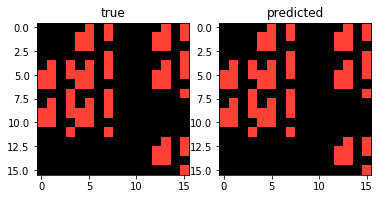

---------------------------------------------------------


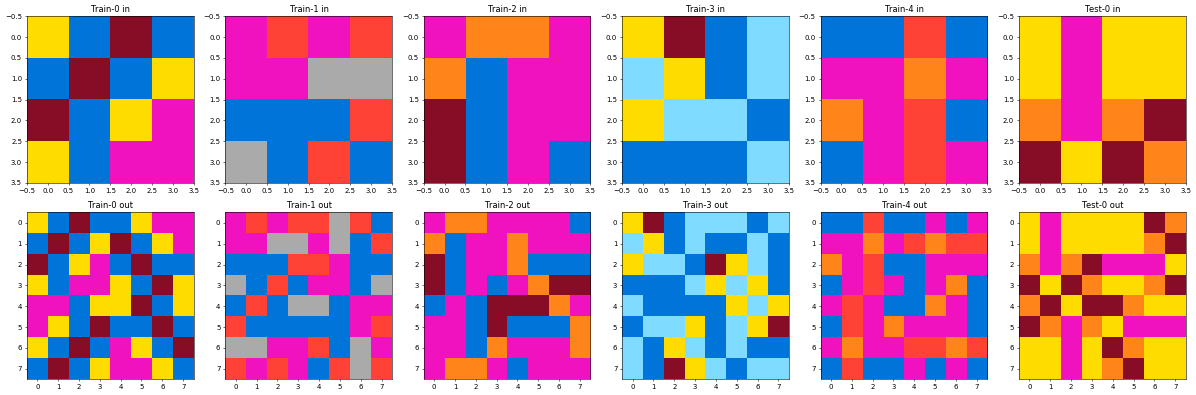

train acc:  0.43125
valid acc:  0.171875


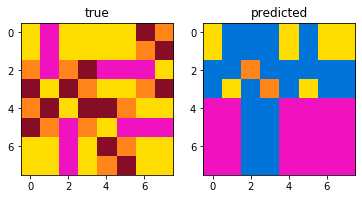

---------------------------------------------------------


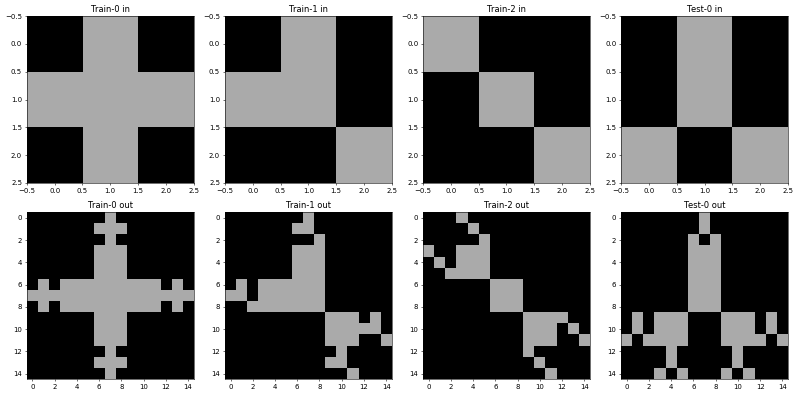

train acc:  0.842963
valid acc:  0.8088889


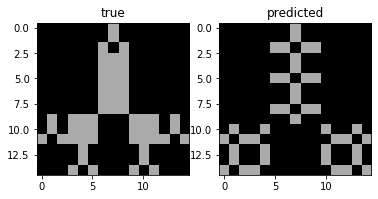

---------------------------------------------------------


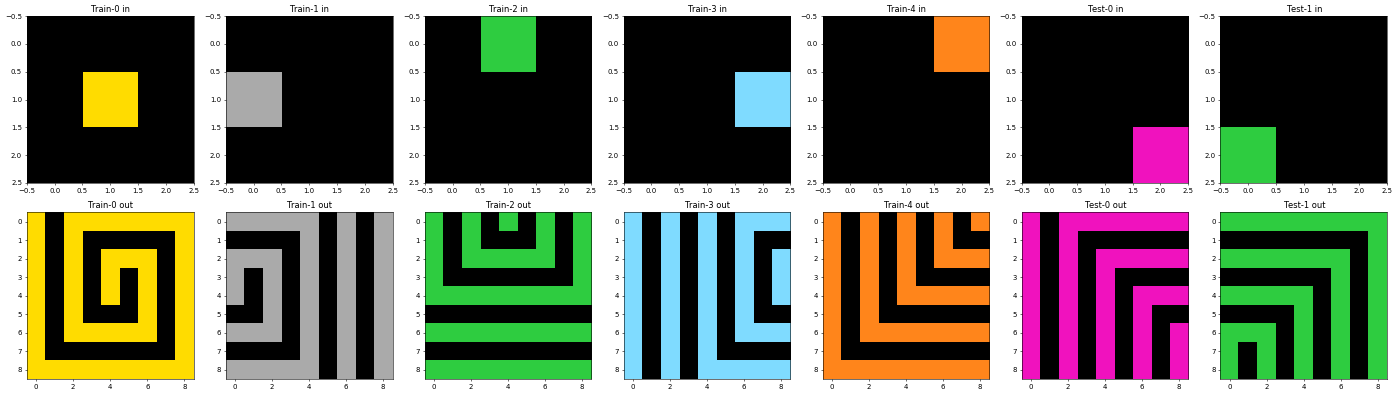

train acc:  0.44691357
valid acc:  0.44444445


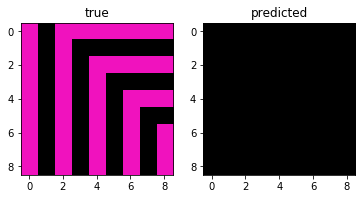

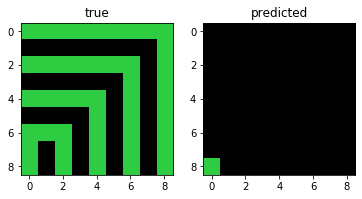

---------------------------------------------------------


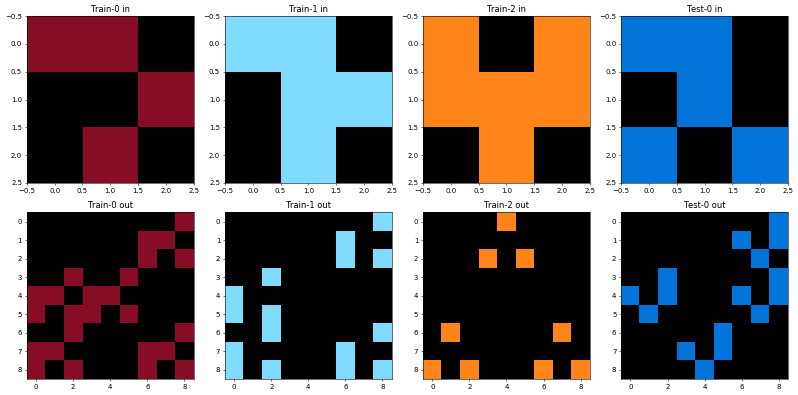

train acc:  0.89711934
valid acc:  0.5555556


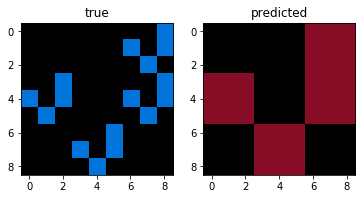

---------------------------------------------------------


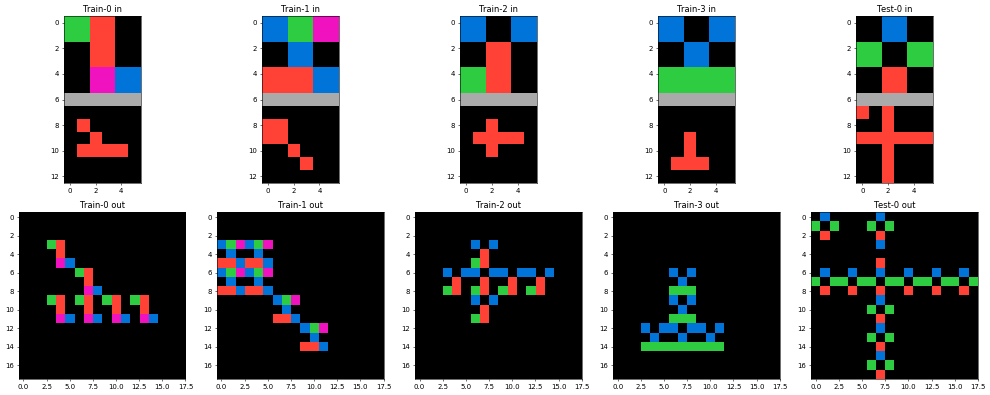

ooops
---------------------------------------------------------


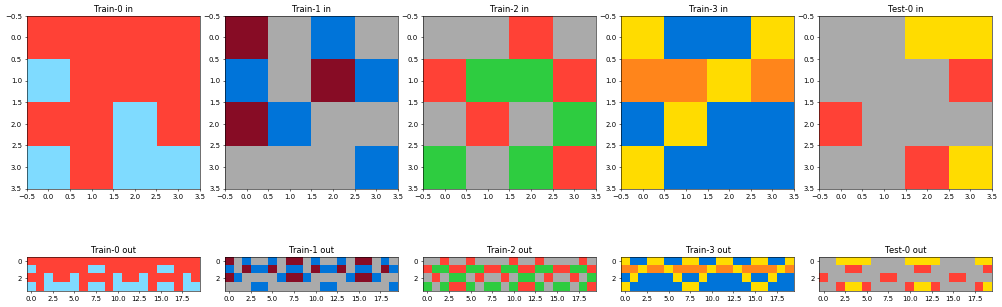

train acc:  0.7875
valid acc:  0.6125


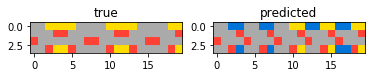

---------------------------------------------------------


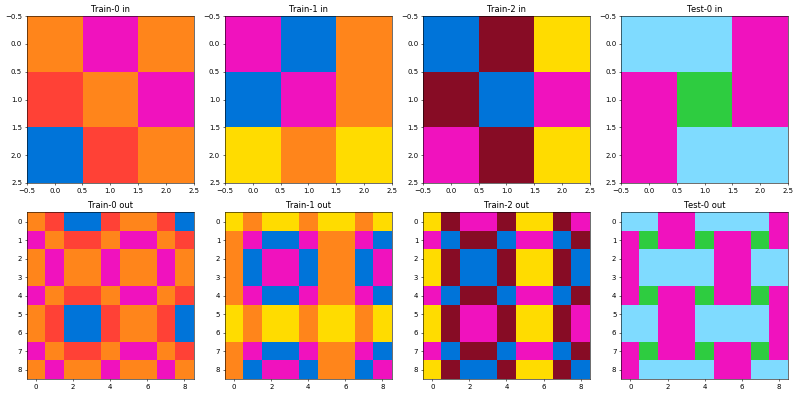

train acc:  0.48971194
valid acc:  0.44444445


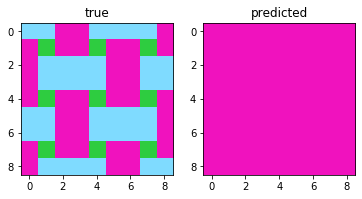

---------------------------------------------------------


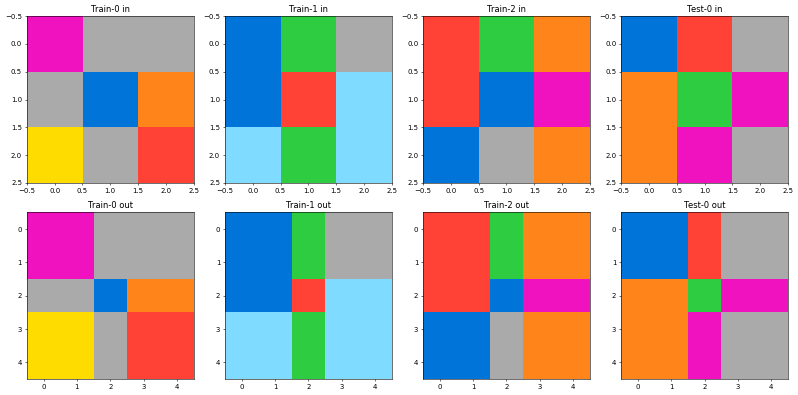

ooops
---------------------------------------------------------


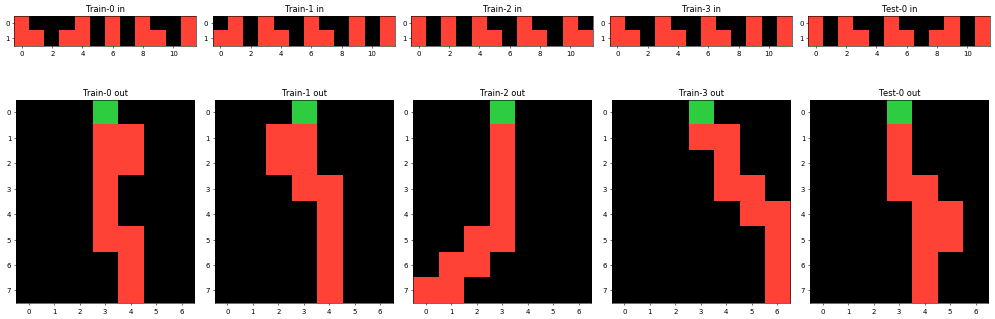

ooops
---------------------------------------------------------


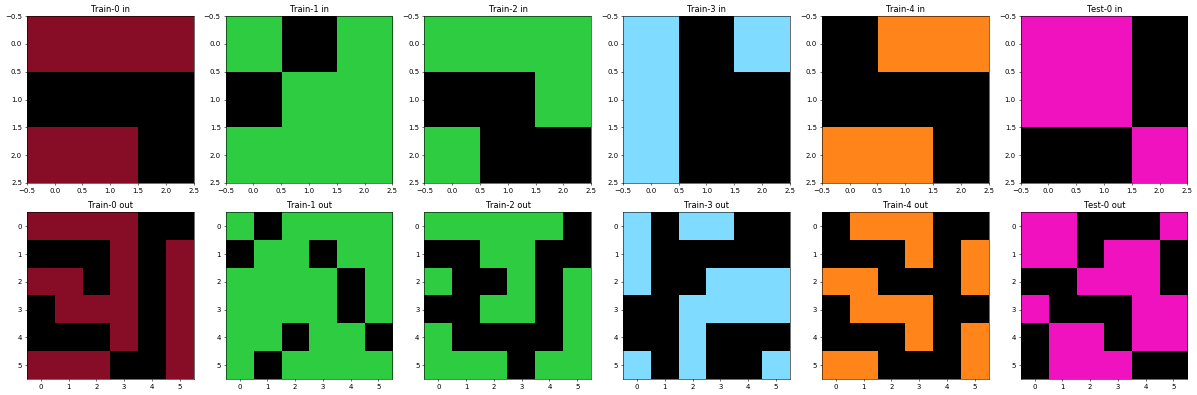

train acc:  0.6388889
valid acc:  0.44444445


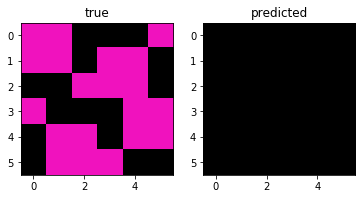


total tasks:  20
errors:  3
solved:  2


In [54]:
loop(diz_eval['t1_3'], 'eval')

---------------------------------------------------------


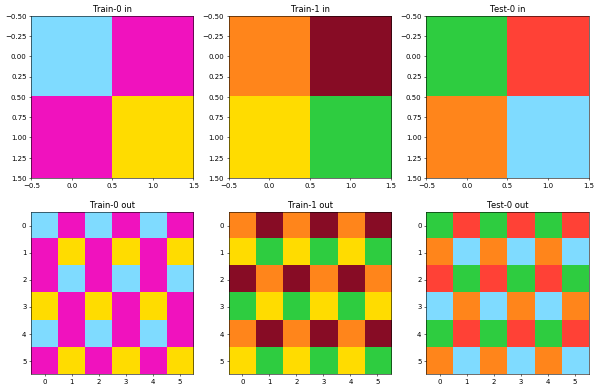

train acc:  0.8333333
valid acc:  0.5833333


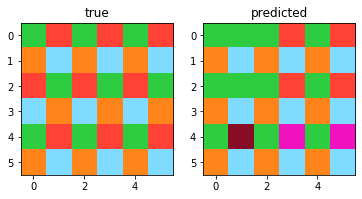

---------------------------------------------------------


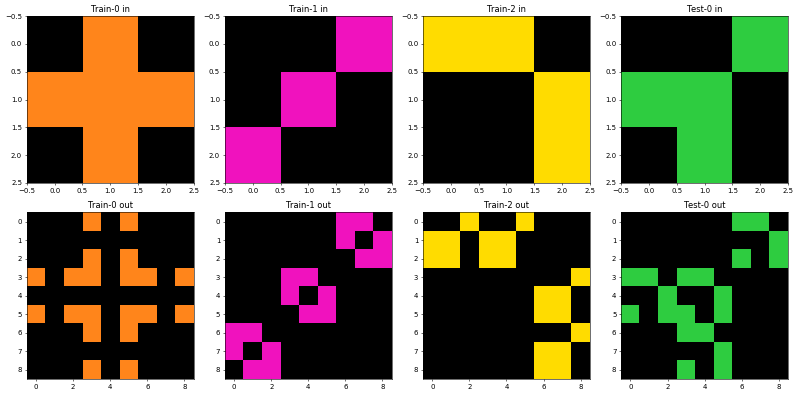

train acc:  1.0
valid acc:  1.0


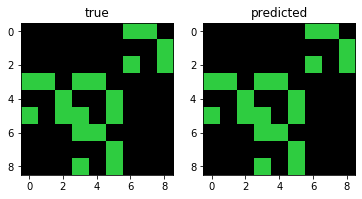

---------------------------------------------------------


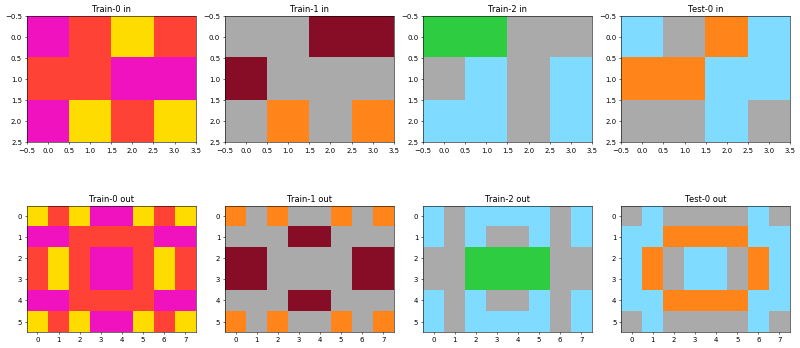

train acc:  0.5625
valid acc:  0.47916666


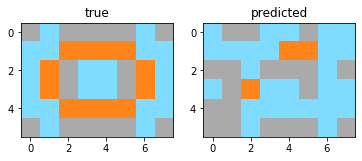

---------------------------------------------------------


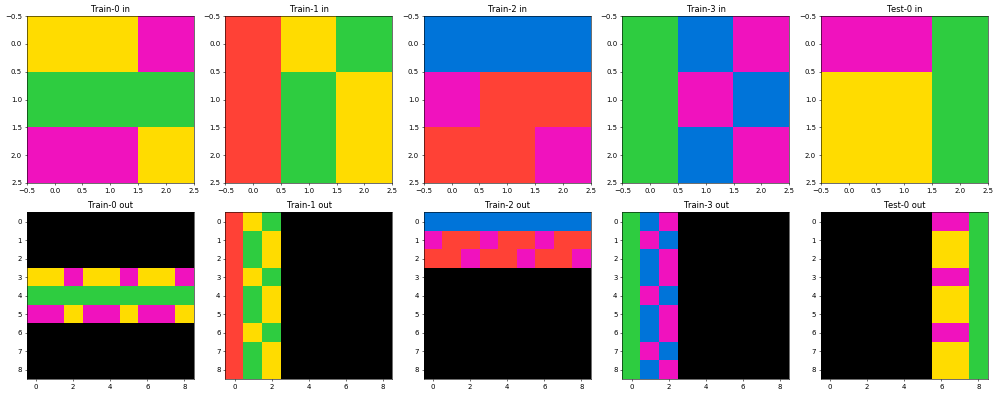

train acc:  0.7685185
valid acc:  1.0


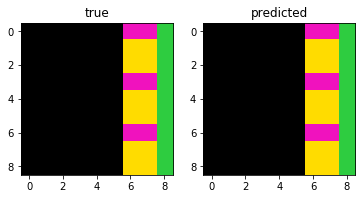

---------------------------------------------------------


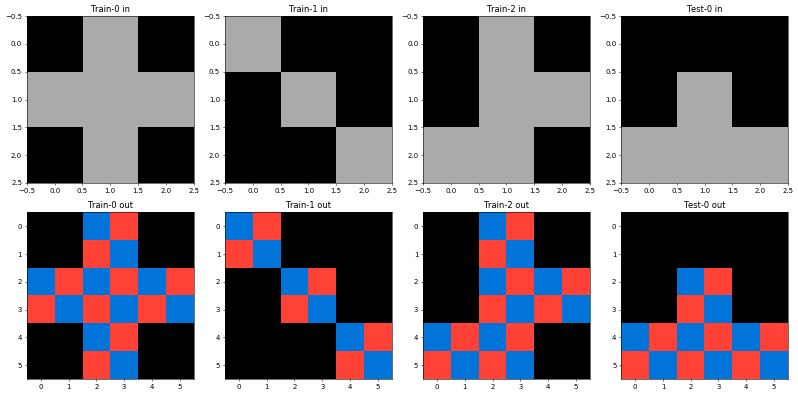

train acc:  0.6111111
valid acc:  0.7777778


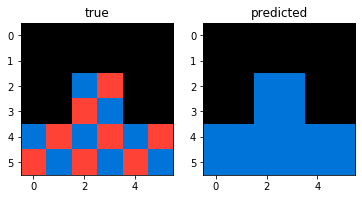

---------------------------------------------------------


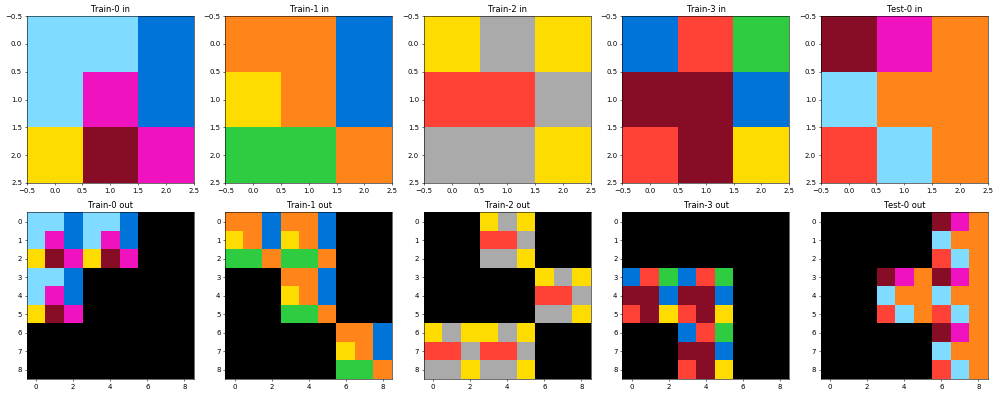

train acc:  0.67901236
valid acc:  0.79012346


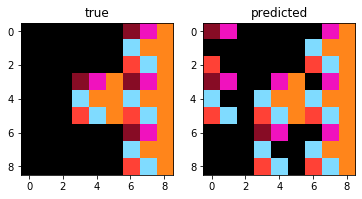

---------------------------------------------------------


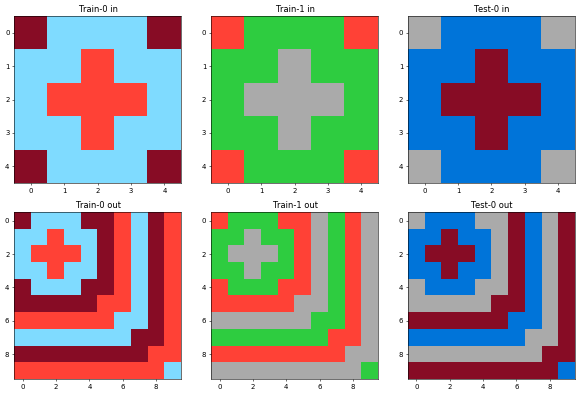

train acc:  0.36
valid acc:  0.35


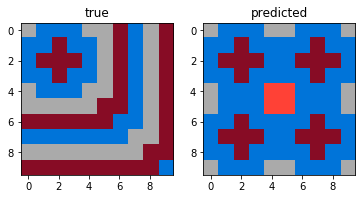

---------------------------------------------------------


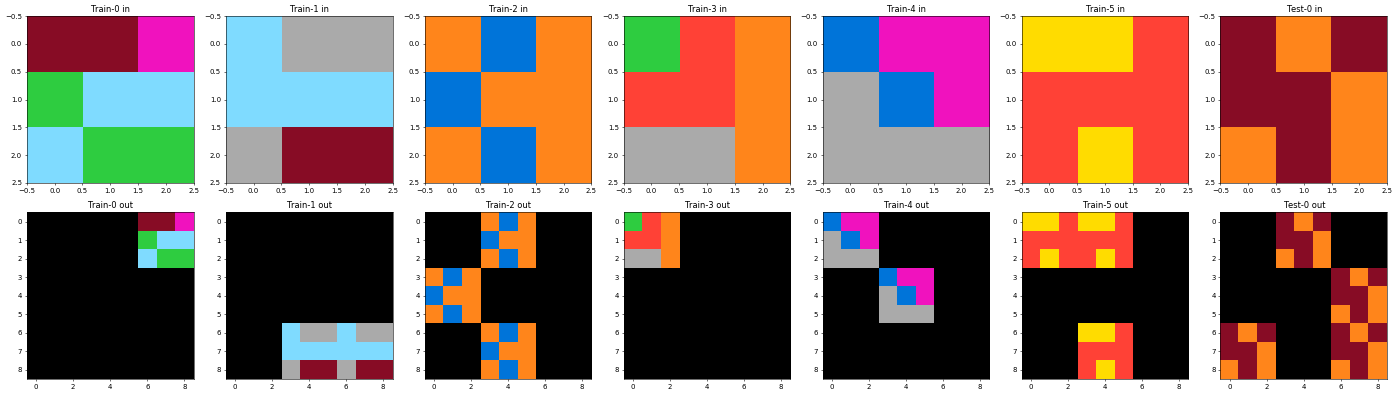

train acc:  0.8847737
valid acc:  0.30864197


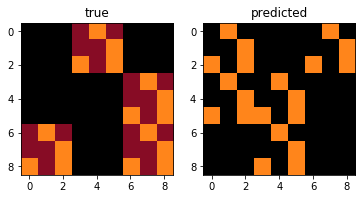

---------------------------------------------------------


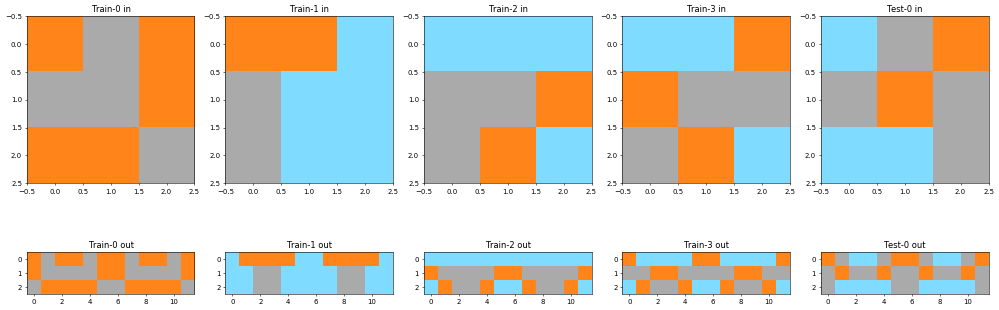

train acc:  0.8333333
valid acc:  0.7777778


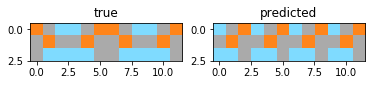

---------------------------------------------------------


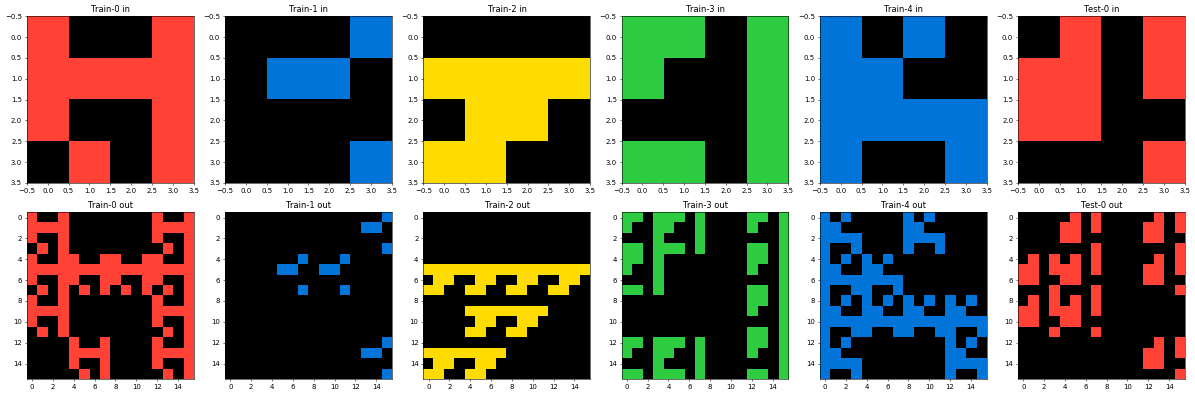

train acc:  1.0
valid acc:  1.0


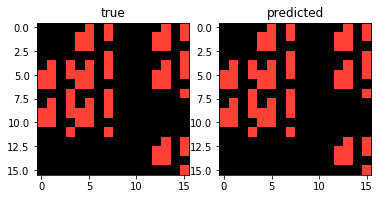

---------------------------------------------------------


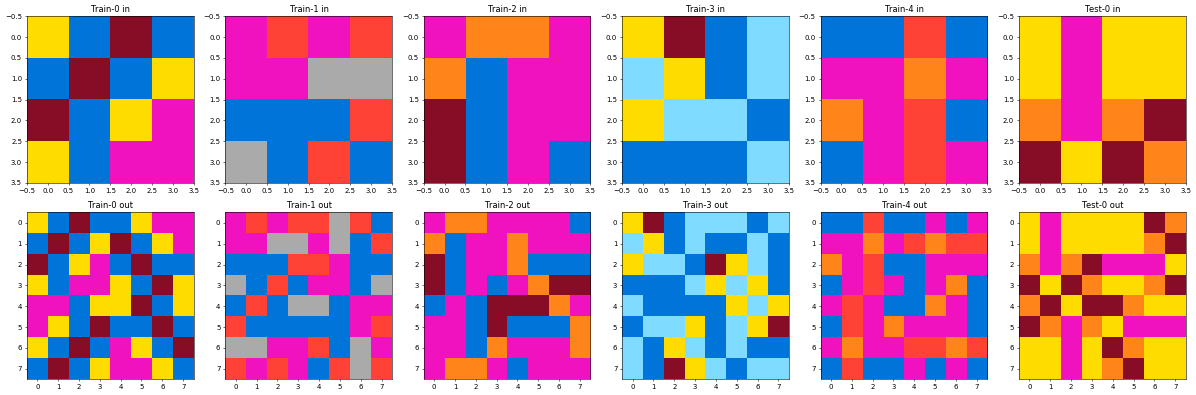

train acc:  0.571875
valid acc:  0.3125


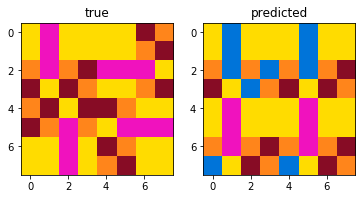

---------------------------------------------------------


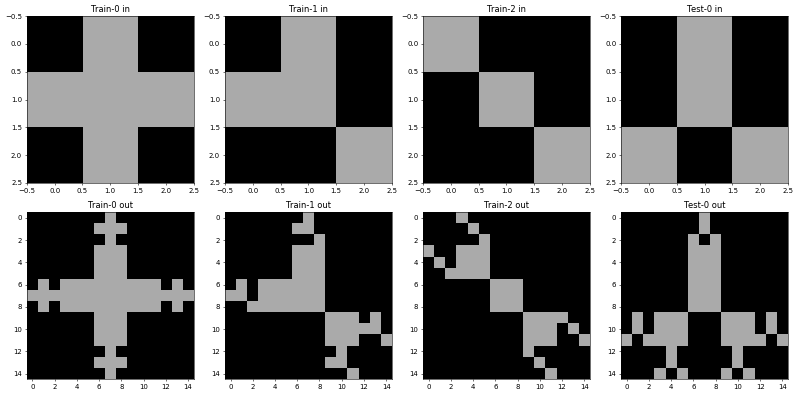

train acc:  0.84444445
valid acc:  0.8088889


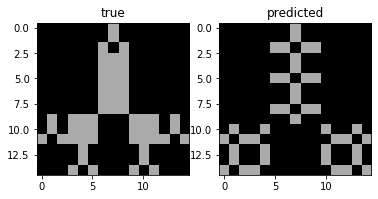

---------------------------------------------------------


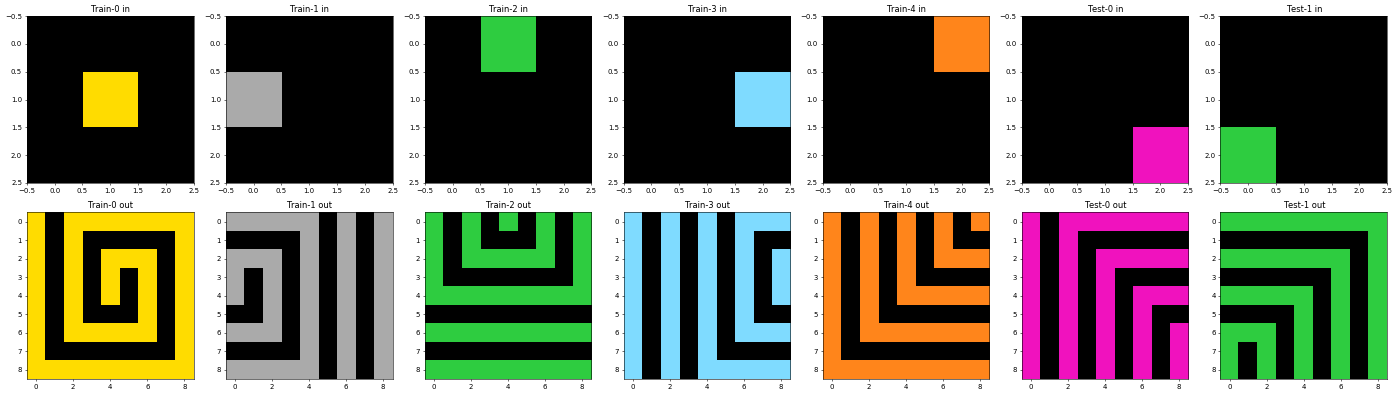

train acc:  0.454321
valid acc:  0.45061728


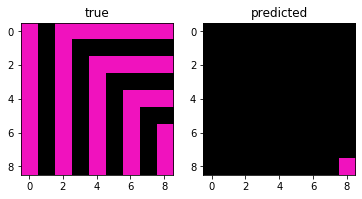

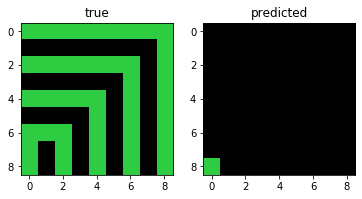

---------------------------------------------------------


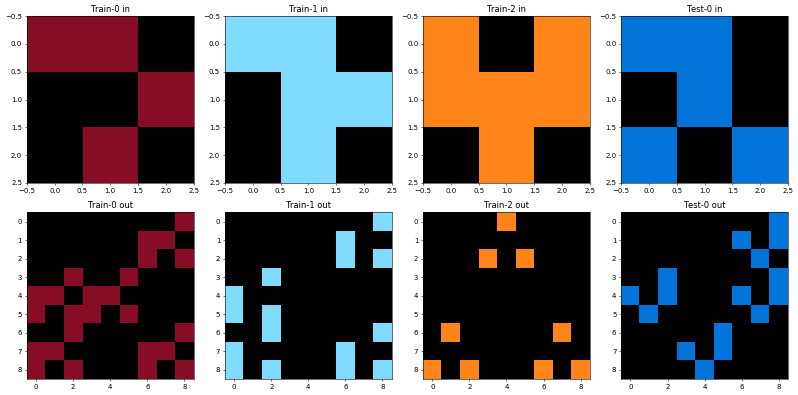

train acc:  0.89711934
valid acc:  0.80246913


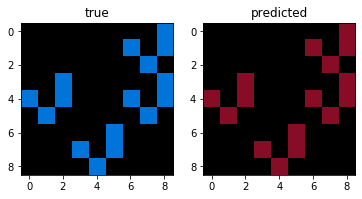

---------------------------------------------------------


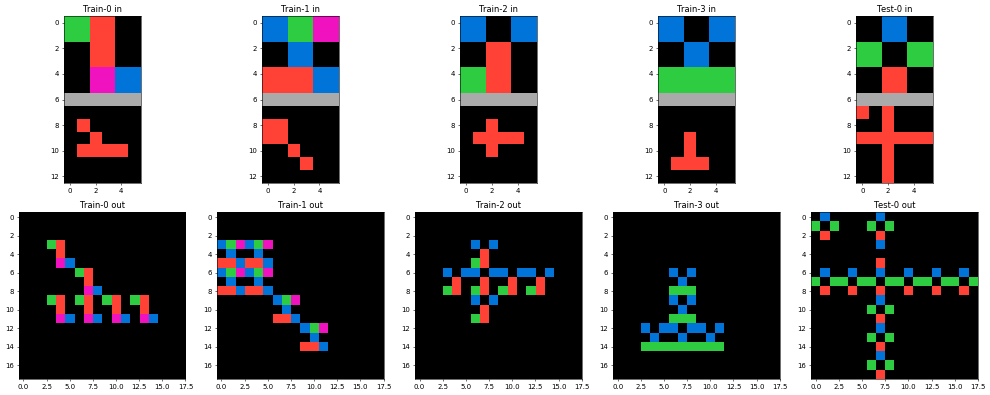

ooops
---------------------------------------------------------


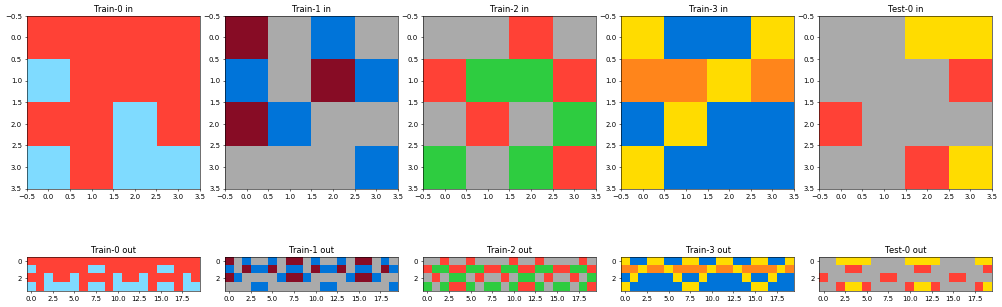

train acc:  0.7875
valid acc:  0.7


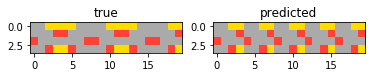

---------------------------------------------------------


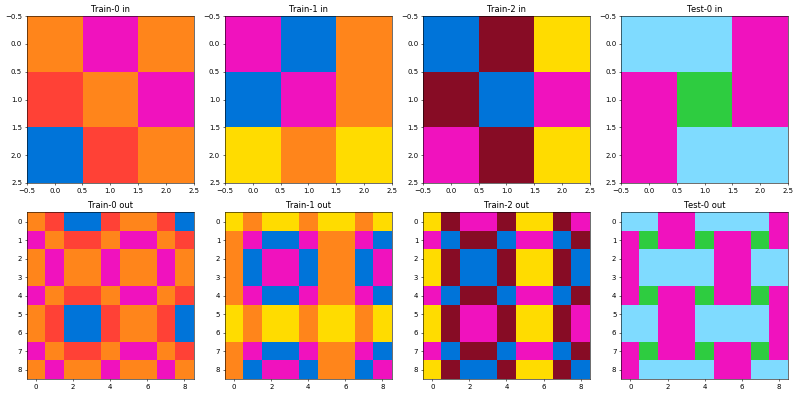

train acc:  0.41152263
valid acc:  0.654321


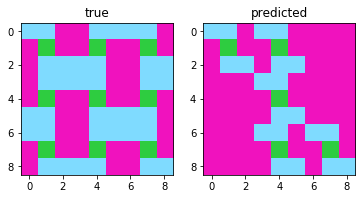

---------------------------------------------------------


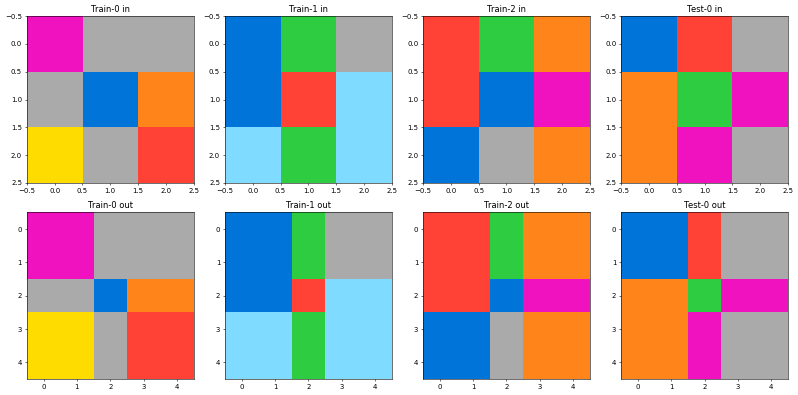

ooops
---------------------------------------------------------


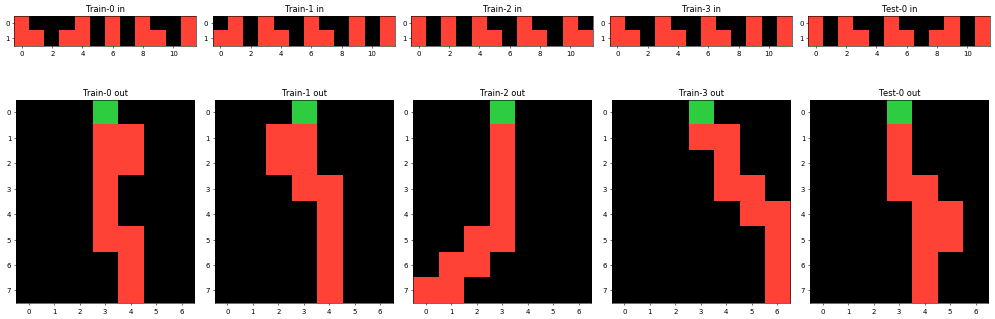

ooops
---------------------------------------------------------


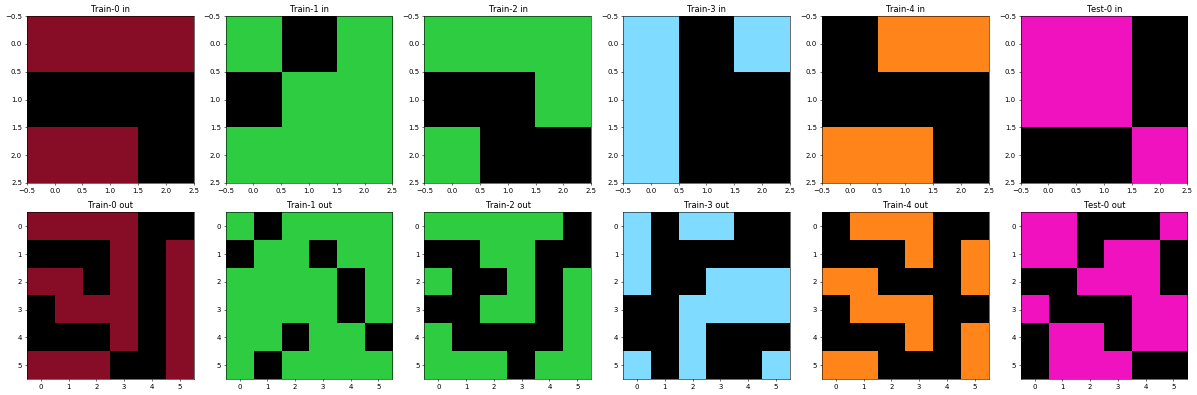

train acc:  0.64444447
valid acc:  0.5555556


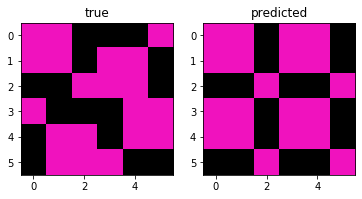


total tasks:  20
errors:  3
solved:  3


In [125]:
loop(diz_eval['t1_3'], 'eval', aug=True)

# TYPE 1_1

### SIMPLE 5X5

In [60]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  0.8
valid acc:  1.0


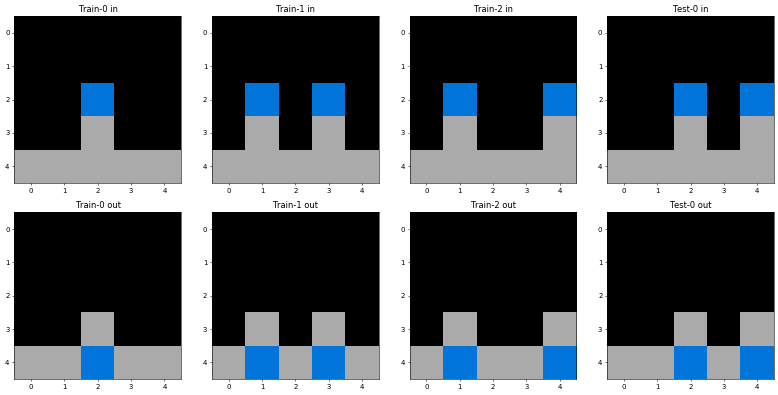

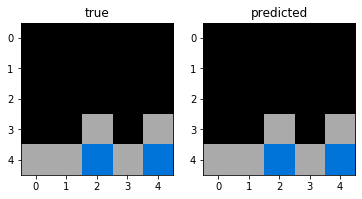

ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  0.93333334
valid acc:  1.0


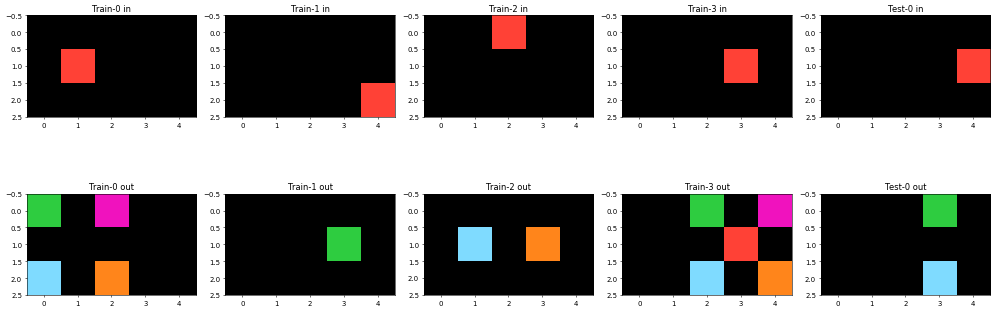

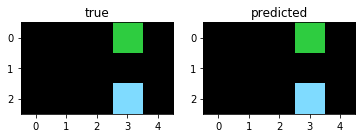

----------------------------------------------------------------------------
train acc:  0.9947917
valid acc:  1.0


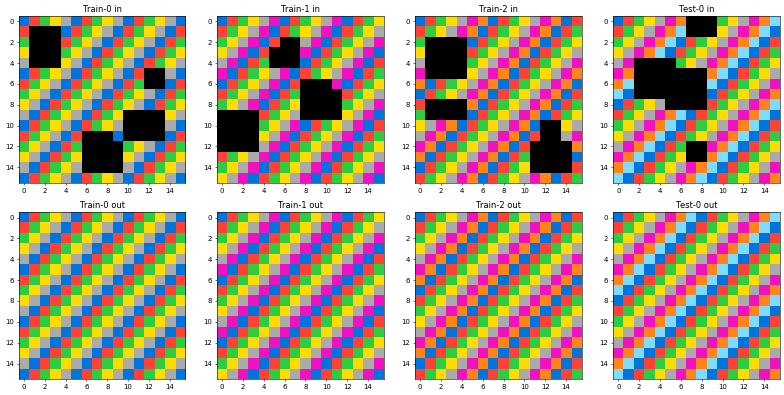

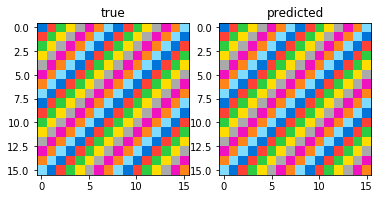

ooops

total tasks:  134
errors:  5
solved:  3


In [61]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  0.9988466
valid acc:  1.0


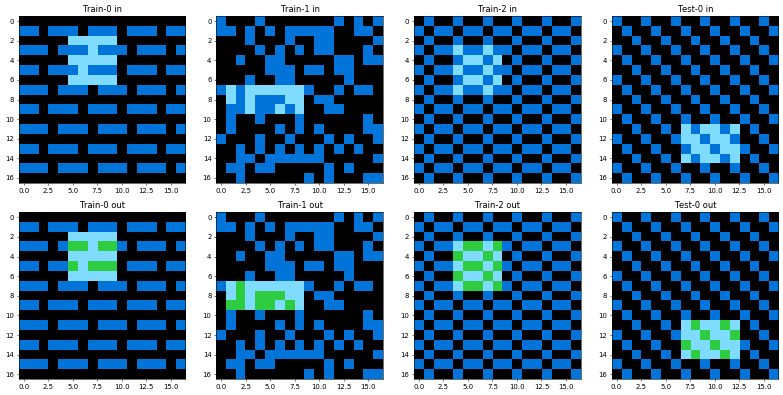

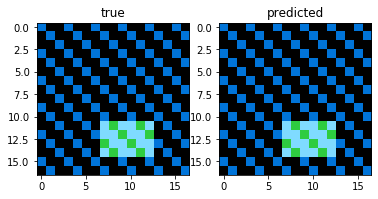

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


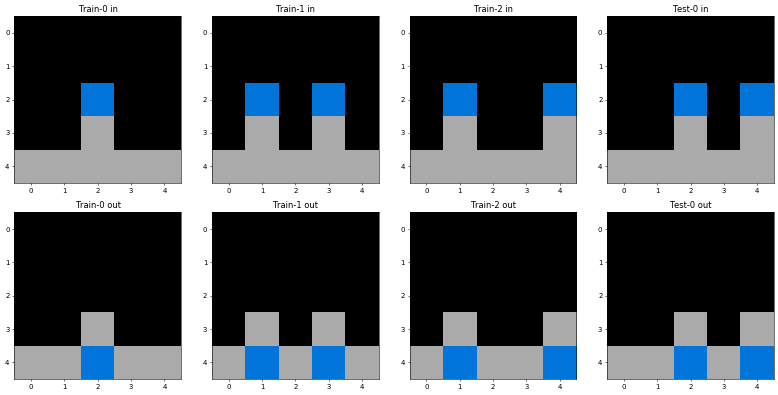

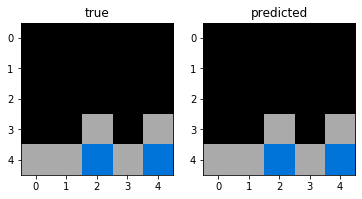

ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


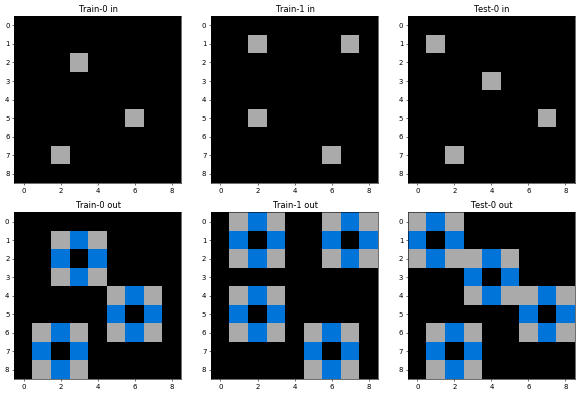

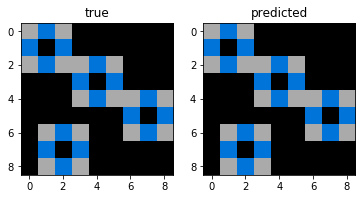

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


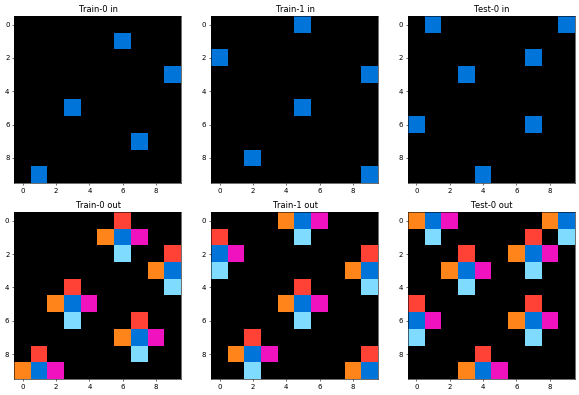

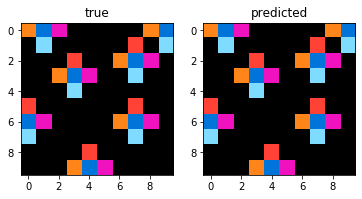

ooops

total tasks:  134
errors:  5
solved:  4


In [62]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 3x3

In [66]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  0.5833333
valid acc:  1.0


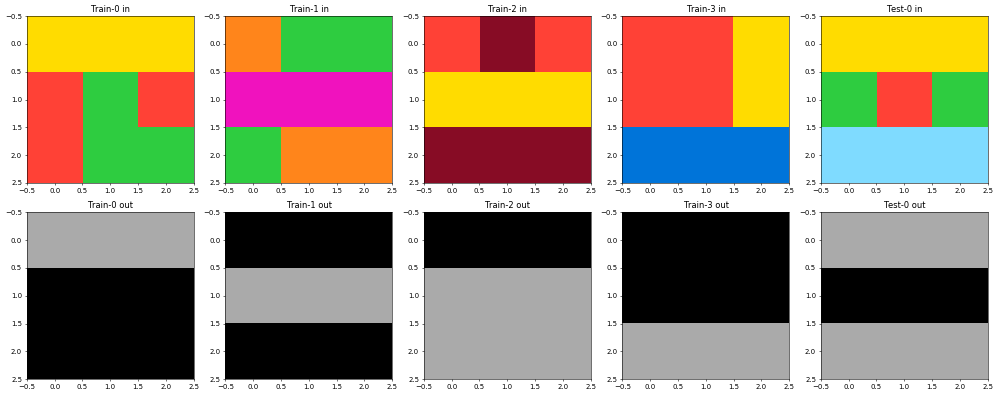

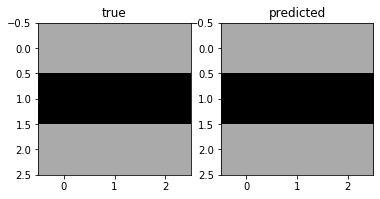

----------------------------------------------------------------------------
train acc:  0.9919262
valid acc:  1.0


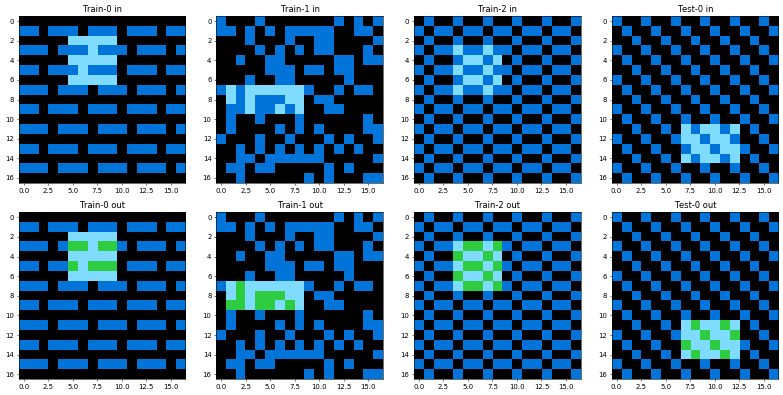

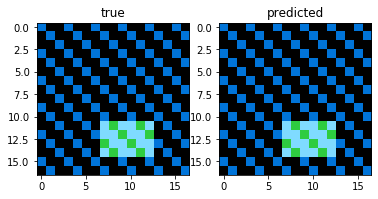

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


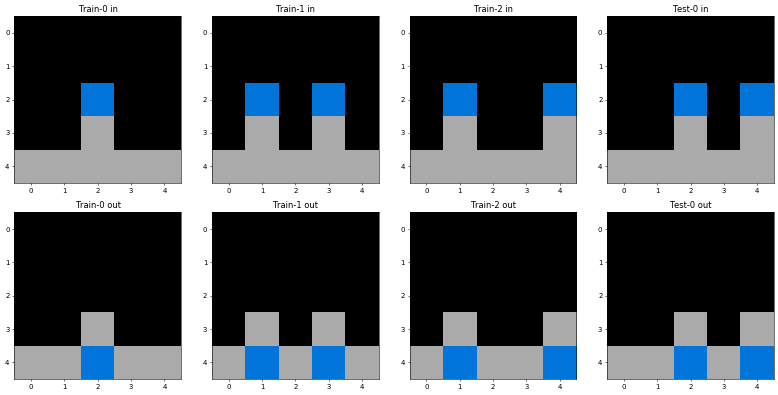

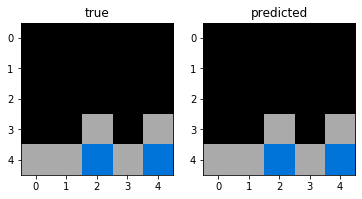

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


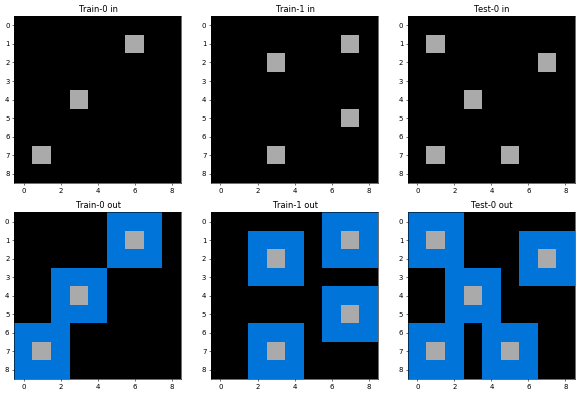

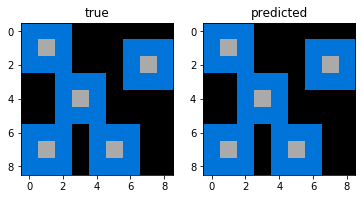

ooops
ooops
----------------------------------------------------------------------------
train acc:  0.85
valid acc:  1.0


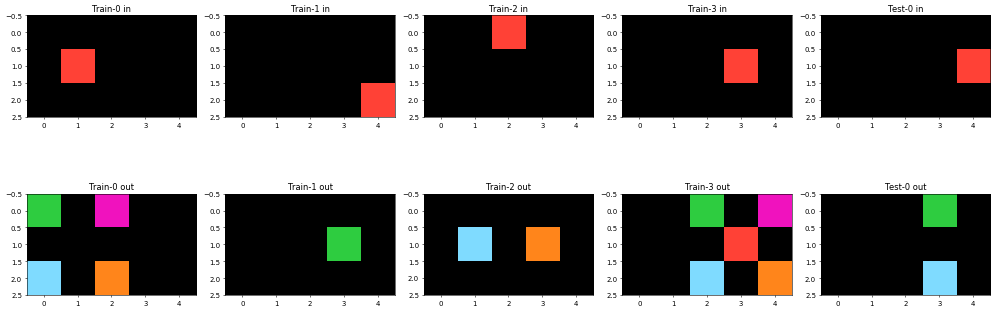

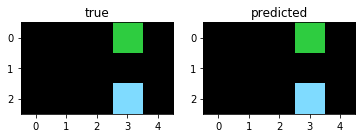

----------------------------------------------------------------------------
train acc:  0.8271605
valid acc:  1.0


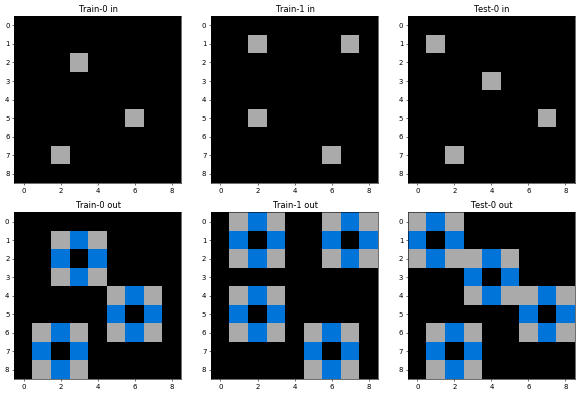

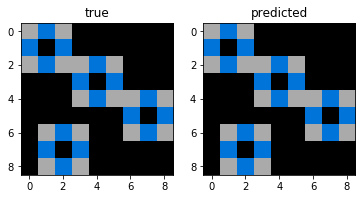

----------------------------------------------------------------------------
train acc:  0.66
valid acc:  1.0


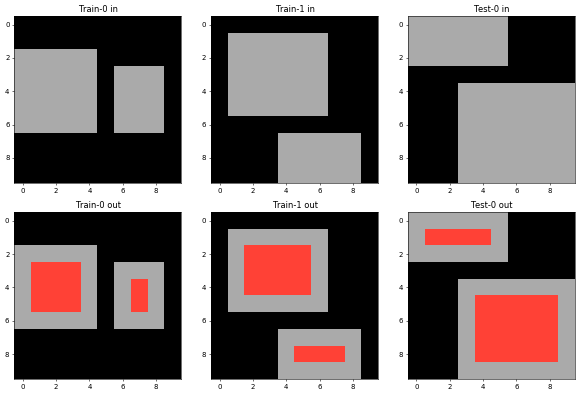

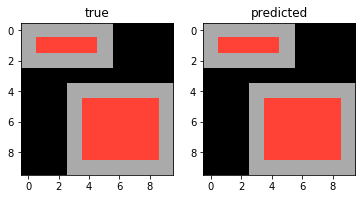

ooops

total tasks:  134
errors:  5
solved:  7


In [67]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


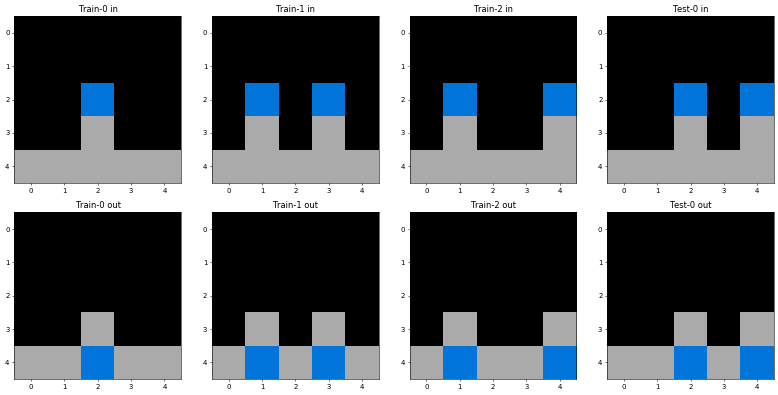

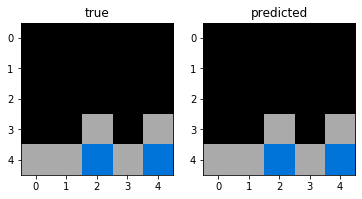

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


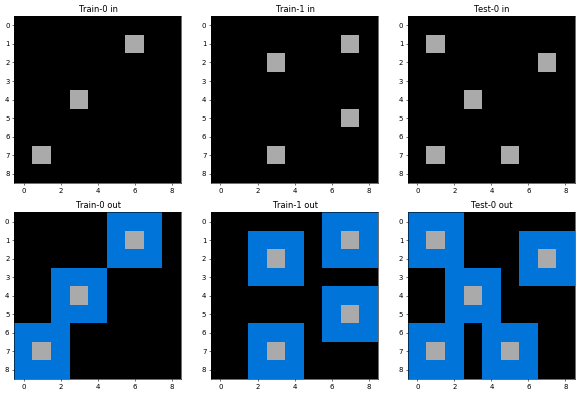

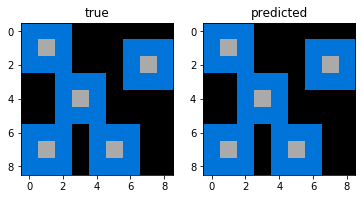

ooops
----------------------------------------------------------------------------
train acc:  0.96444446
valid acc:  1.0


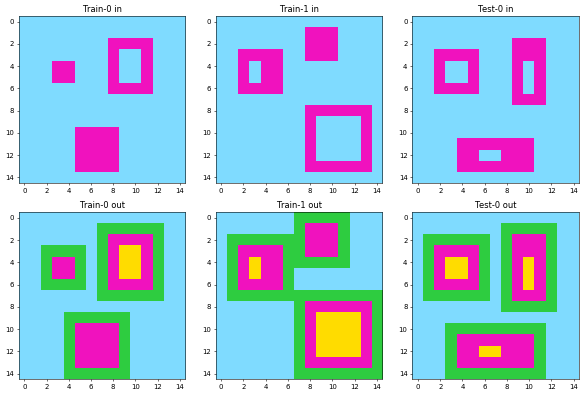

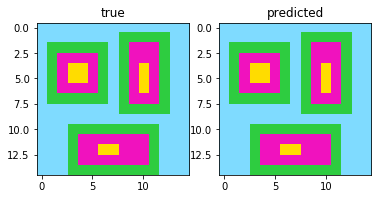

ooops
----------------------------------------------------------------------------
train acc:  0.96666664
valid acc:  1.0


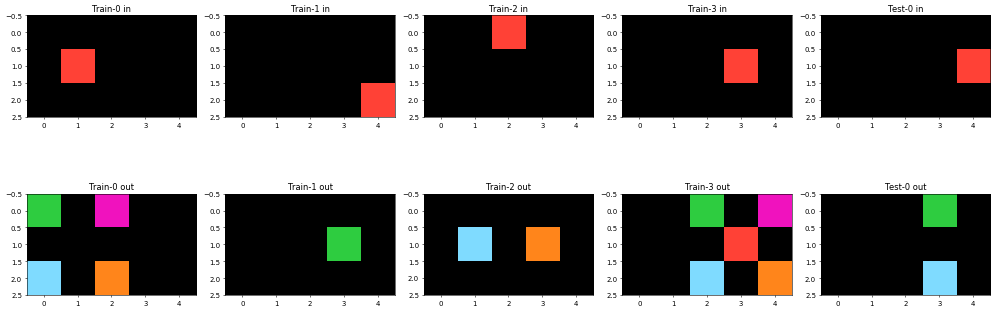

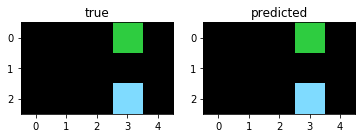

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


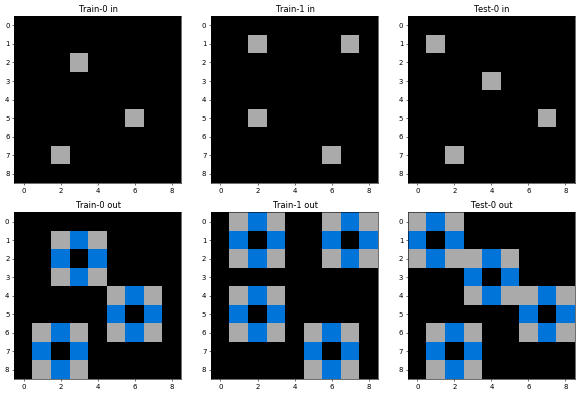

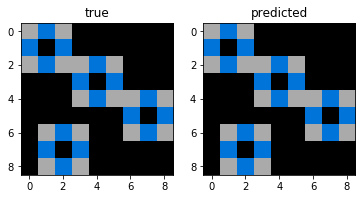

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


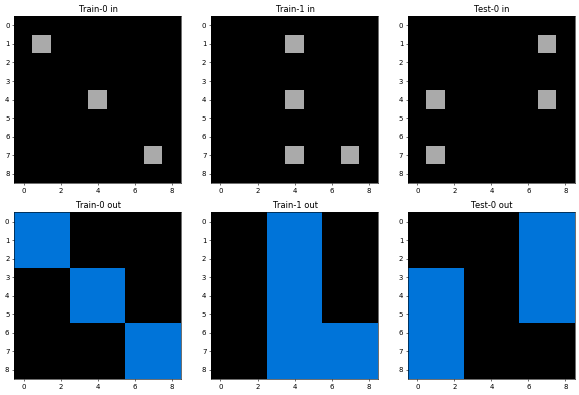

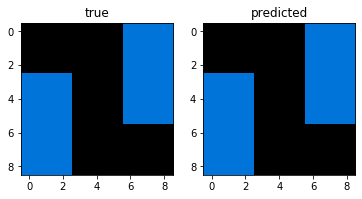

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


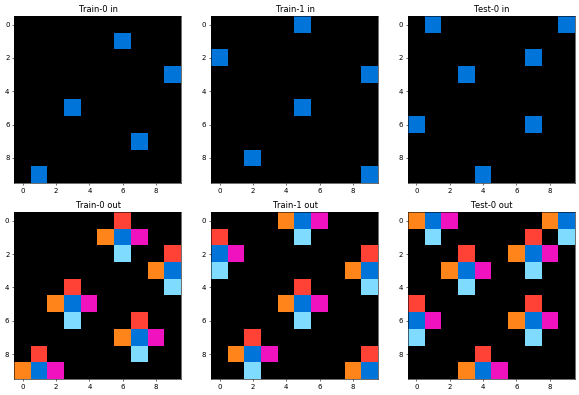

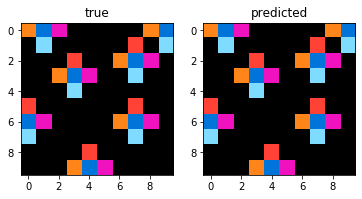

ooops

total tasks:  134
errors:  5
solved:  7


In [68]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 1x1

In [69]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  0.6944444
valid acc:  1.0


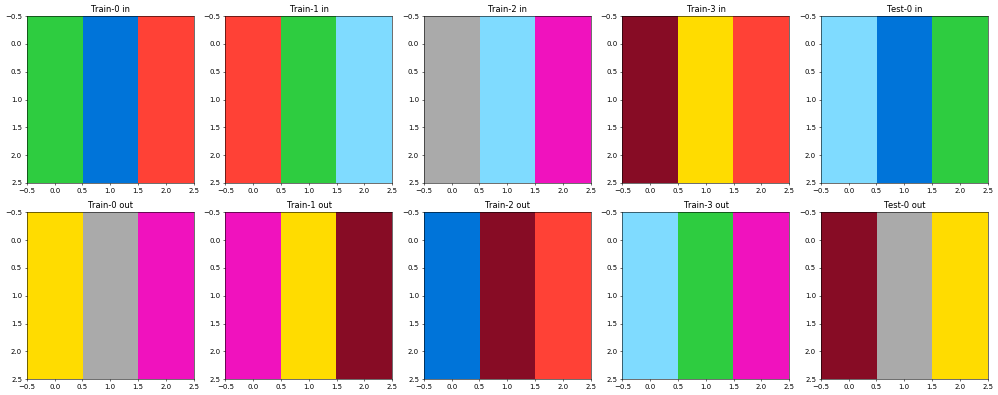

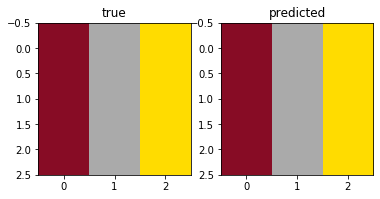

ooops
ooops
ooops
ooops
ooops

total tasks:  134
errors:  5
solved:  1


In [70]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


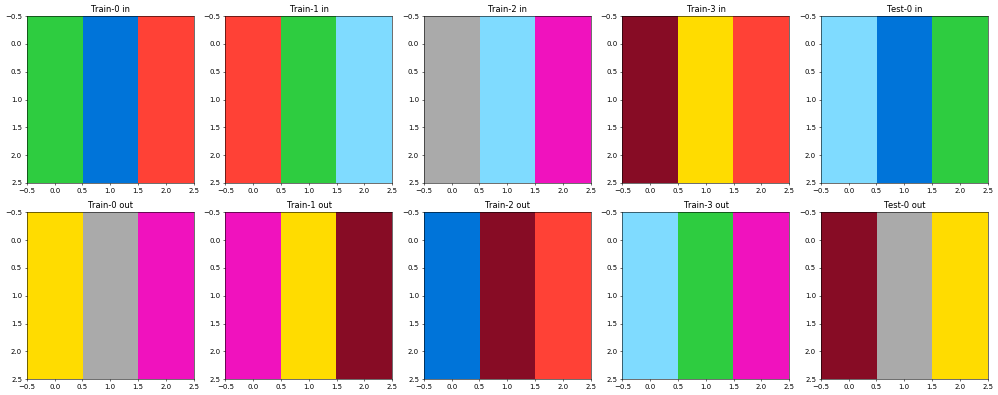

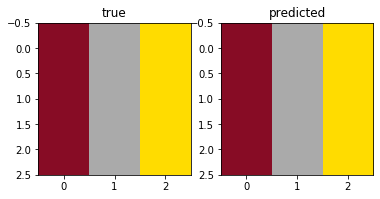

ooops
ooops
ooops
ooops
ooops

total tasks:  134
errors:  5
solved:  1


In [71]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 1x5

In [72]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [73]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

ooops
ooops
ooops
ooops
ooops

total tasks:  134
errors:  5
solved:  0


ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


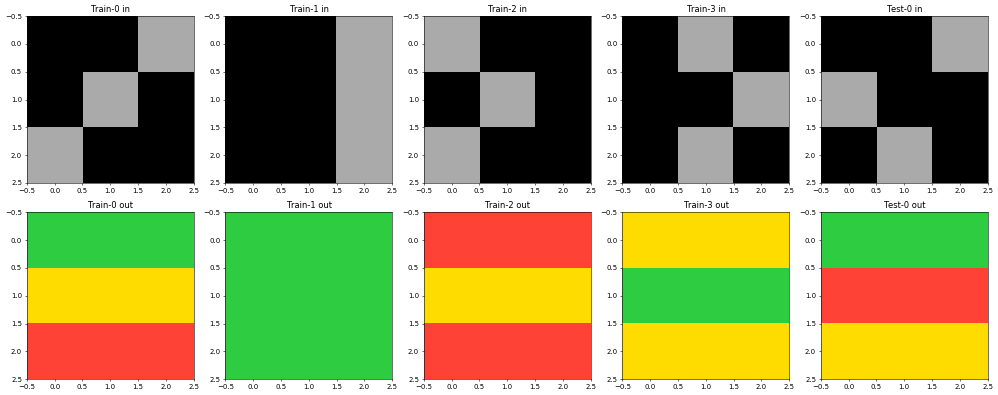

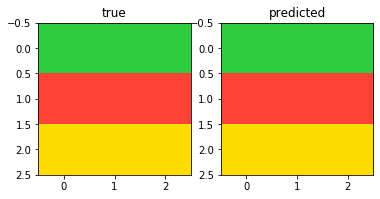

ooops

total tasks:  134
errors:  5
solved:  1


In [74]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 5x1

In [18]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(5,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  0.41666666
valid acc:  1.0


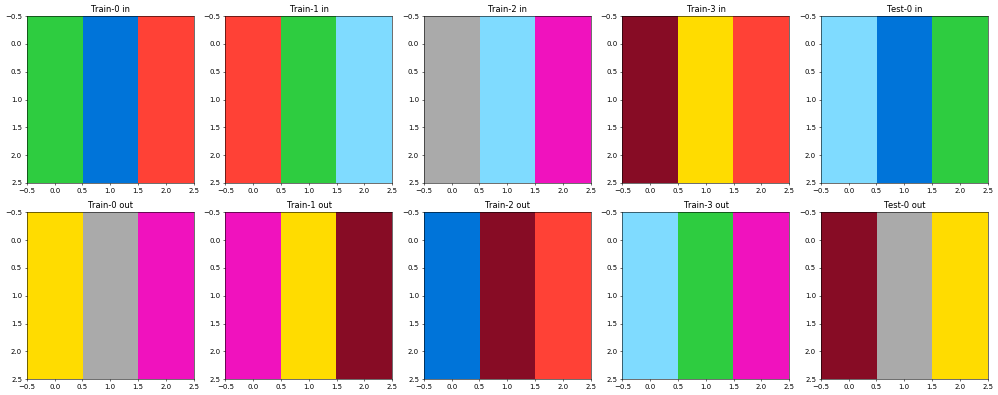

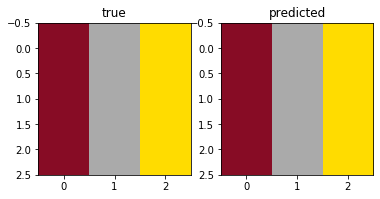

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


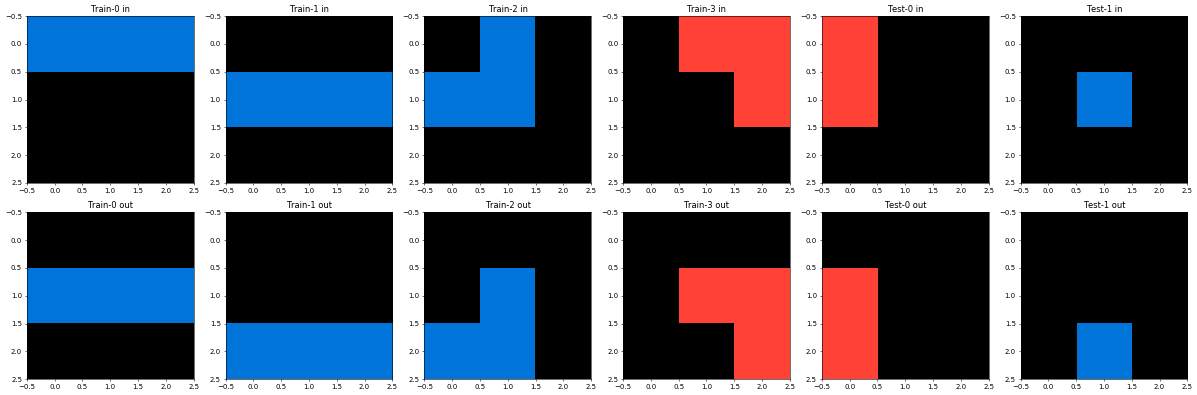

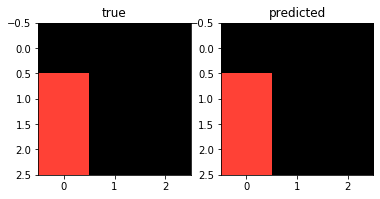

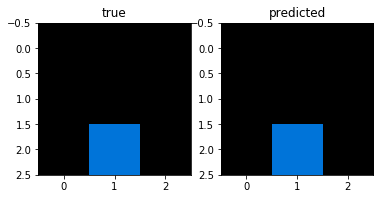

----------------------------------------------------------------------------
train acc:  0.73333335
valid acc:  1.0


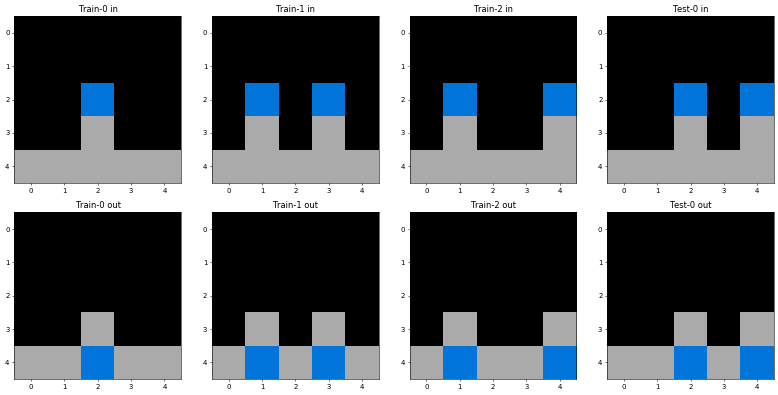

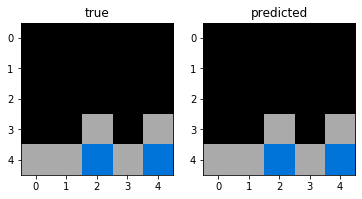

ooops
ooops
ooops
ooops
ooops

total tasks:  134
errors:  5
solved:  3


In [24]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


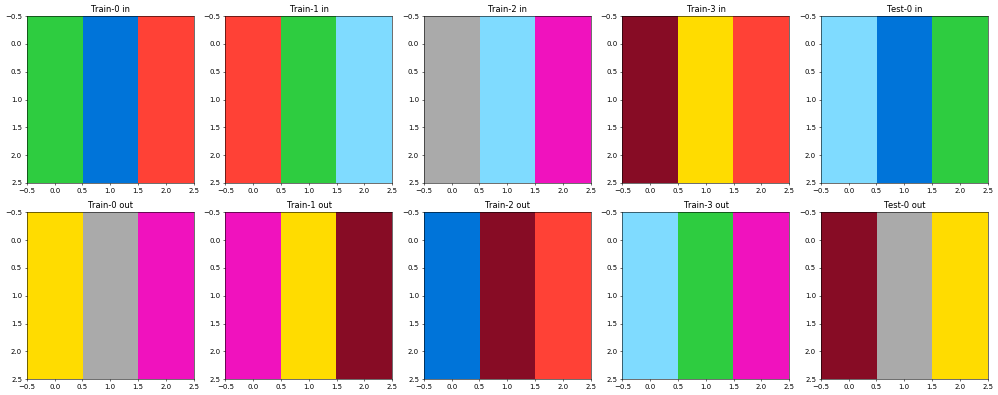

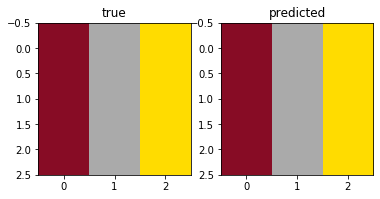

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


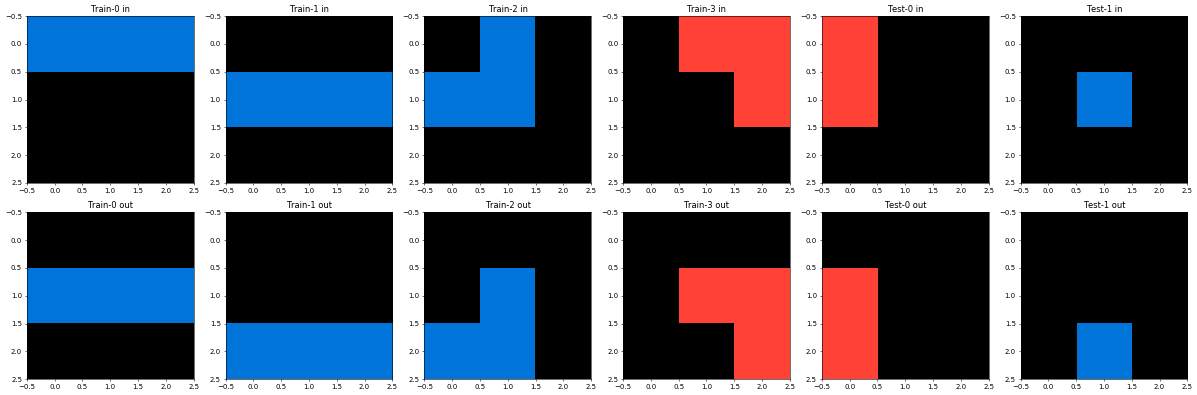

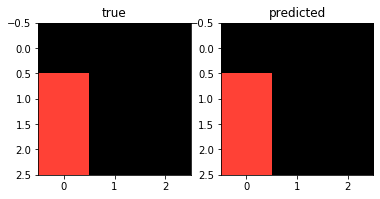

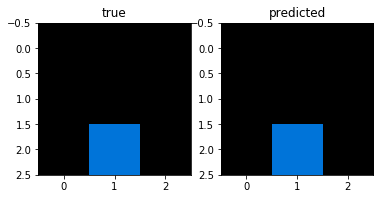

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


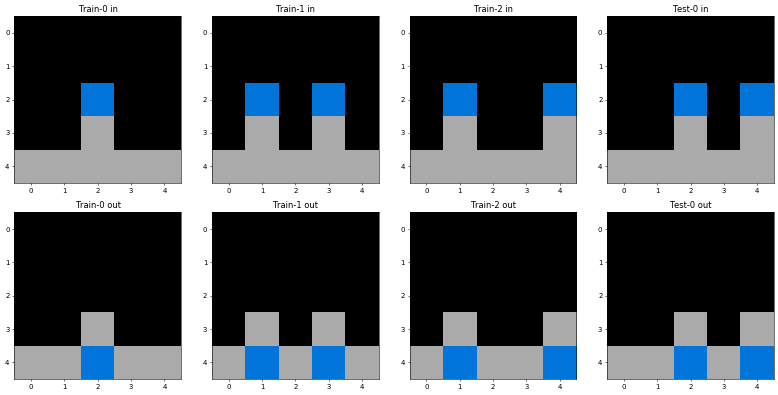

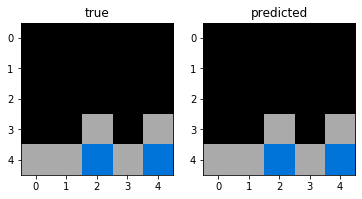

ooops
ooops
ooops
ooops
ooops

total tasks:  134
errors:  5
solved:  3


In [19]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### MULTI 50 10

In [ ]:


def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(50, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(50, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(50, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(50, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(50, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

In [54]:
model=build_model(task)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2, 2, 10)]   0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 2, 2, 50)     550         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 2, 2, 50)     2050        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 2, 2, 50)     4550        input_5[0][0]                    
____________________________________________________________________________________________

----------------------------------------------------------------------------
train acc:  0.9444444
valid acc:  1.0


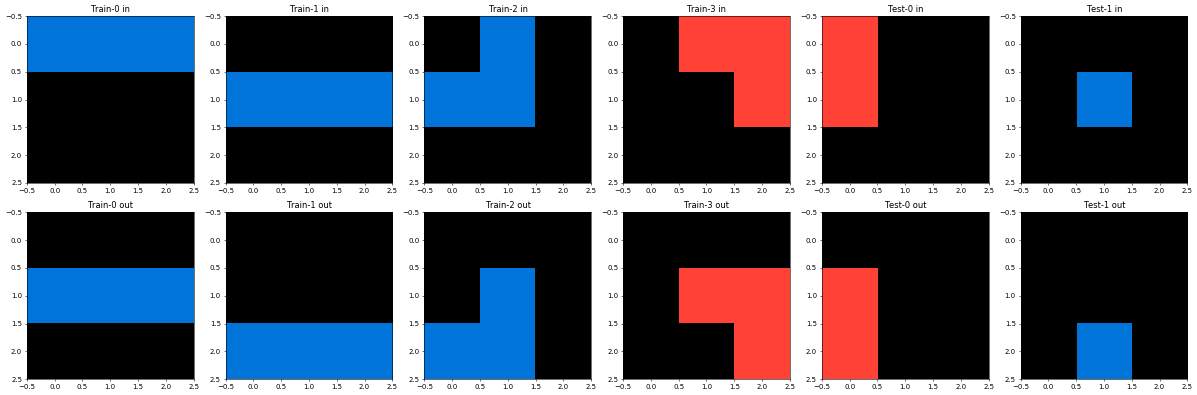

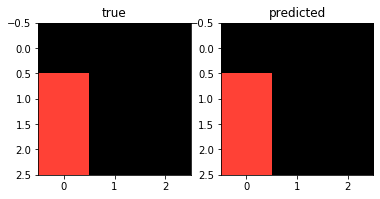

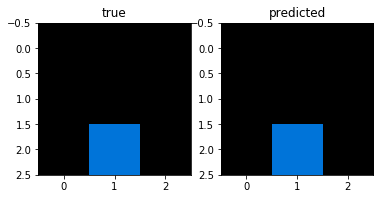

----------------------------------------------------------------------------
train acc:  0.96424454
valid acc:  1.0


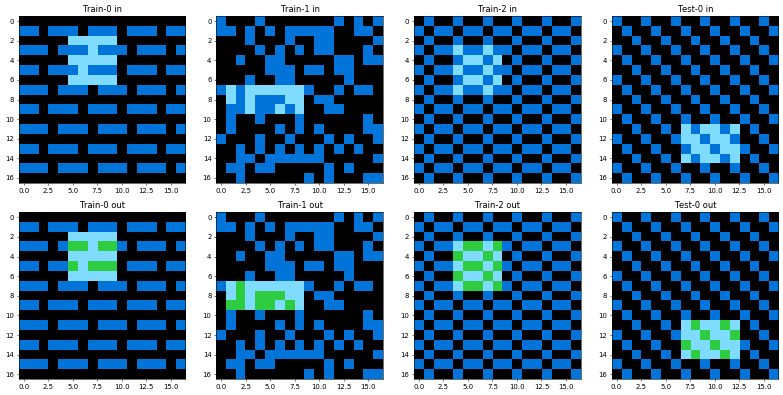

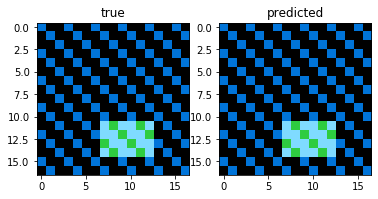

----------------------------------------------------------------------------
train acc:  0.8
valid acc:  1.0


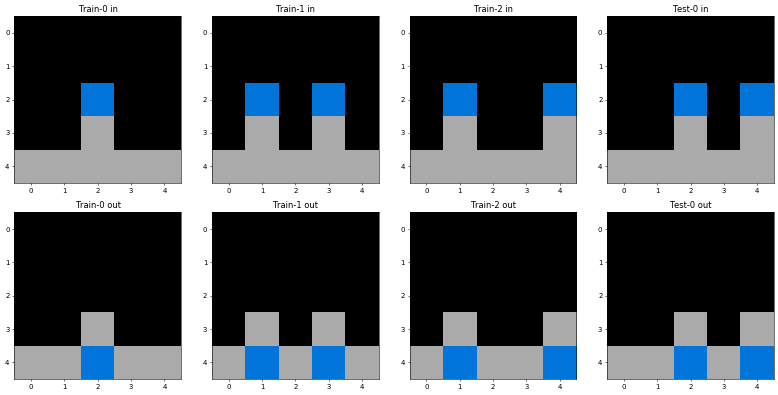

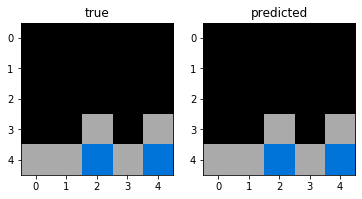

ooops
ooops
----------------------------------------------------------------------------
train acc:  0.89506173
valid acc:  1.0


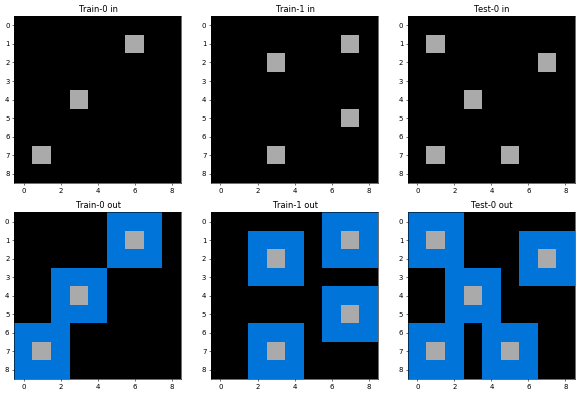

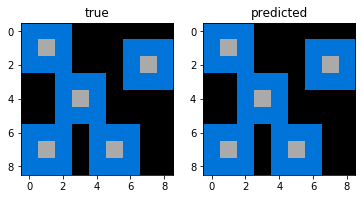

ooops
ooops
----------------------------------------------------------------------------
train acc:  0.81666666
valid acc:  1.0


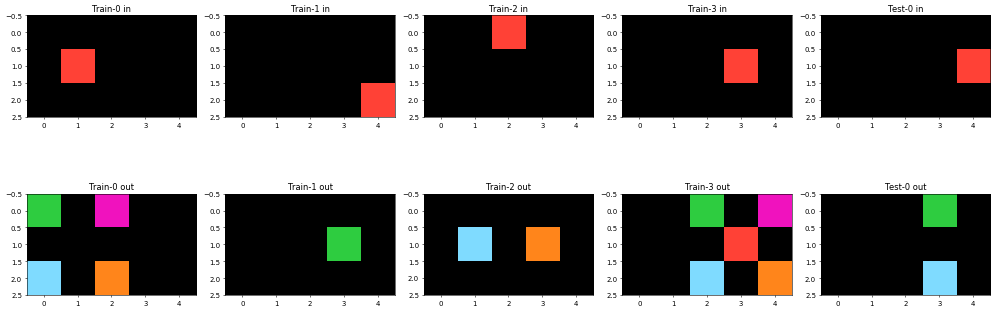

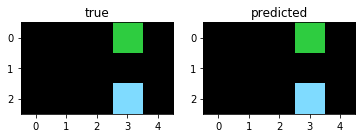

----------------------------------------------------------------------------
train acc:  0.7839506
valid acc:  1.0


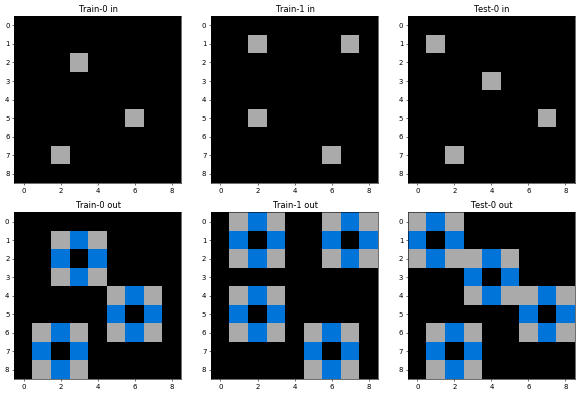

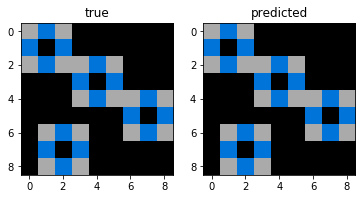

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


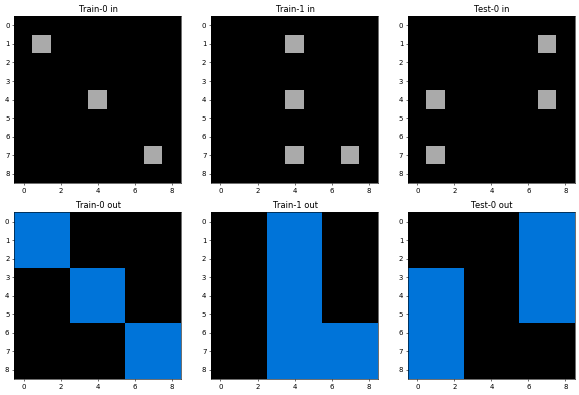

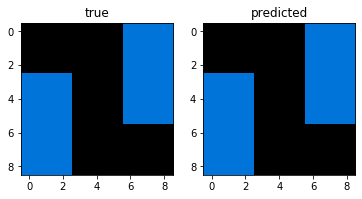

----------------------------------------------------------------------------
train acc:  0.95
valid acc:  1.0


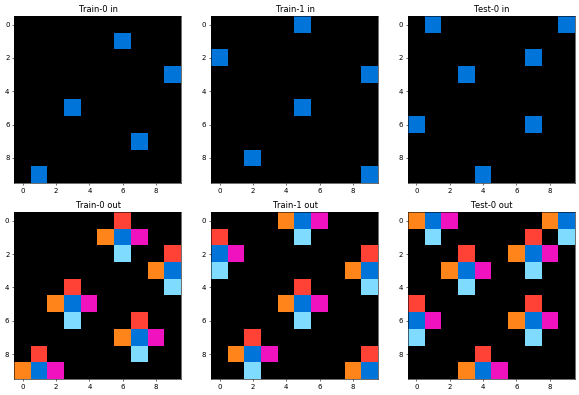

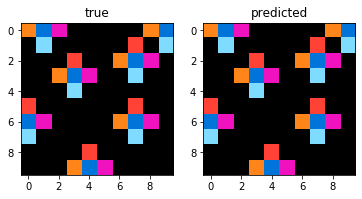

ooops

total tasks:  134
errors:  5
solved:  8


In [55]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


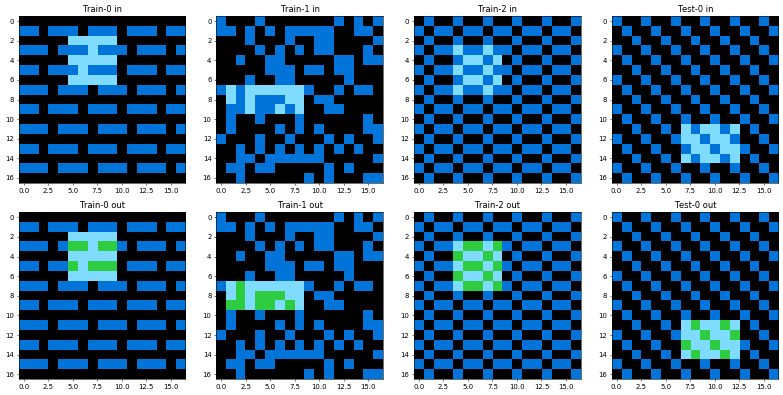

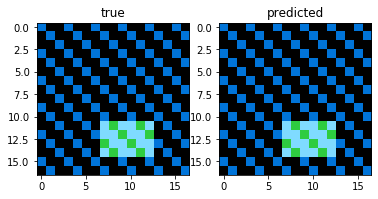

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


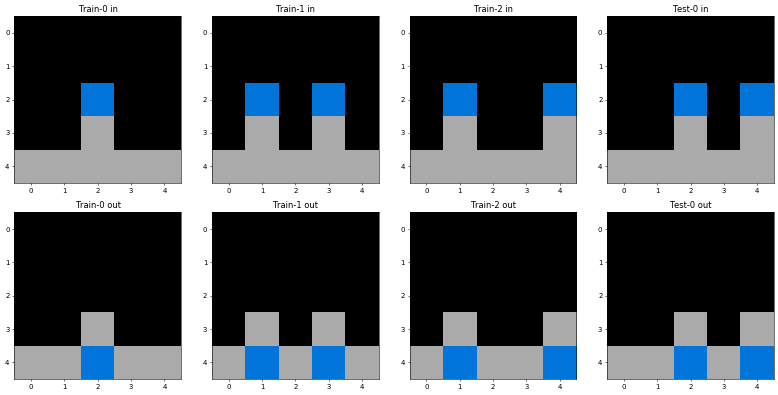

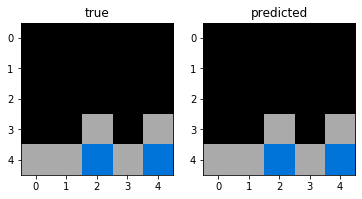

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


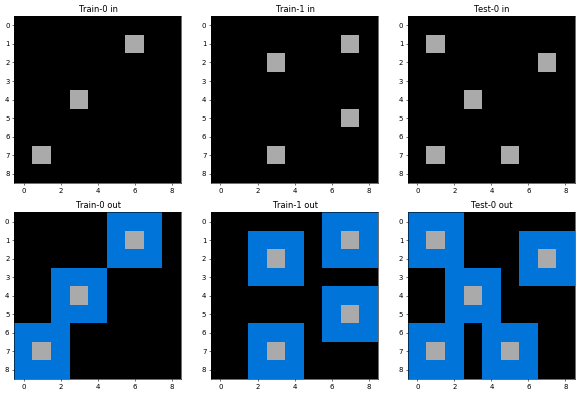

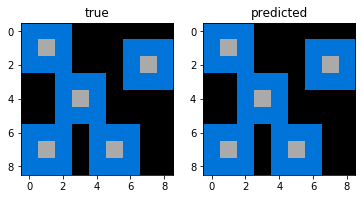

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


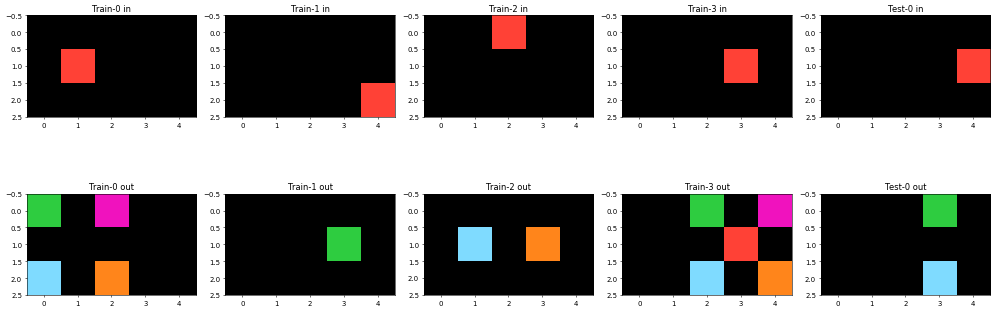

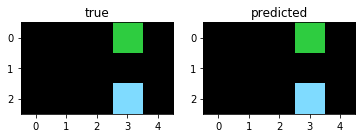

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


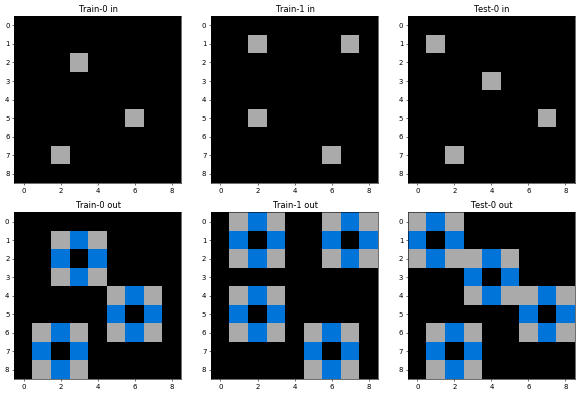

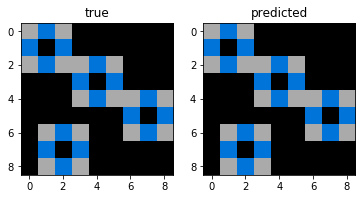

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


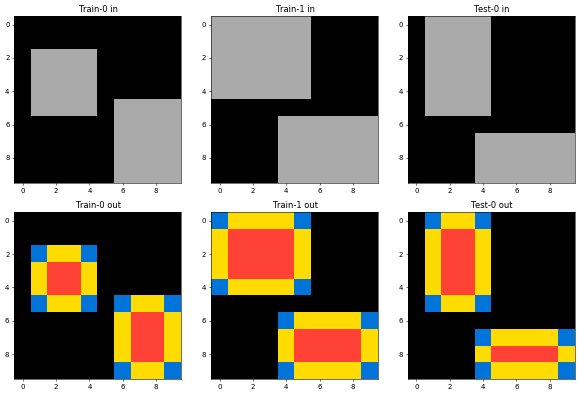

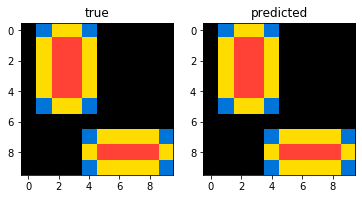

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


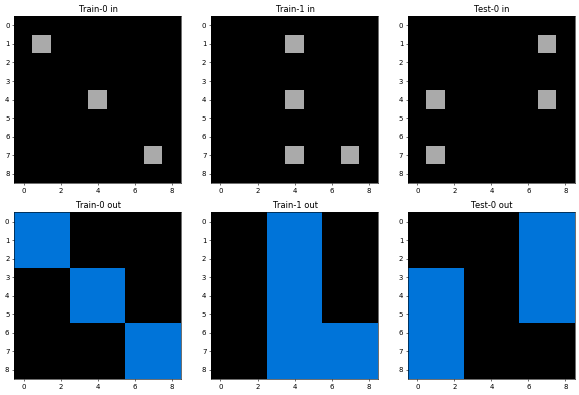

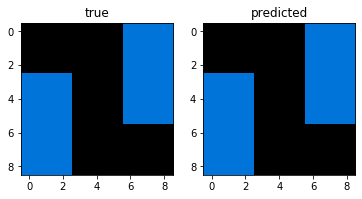

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


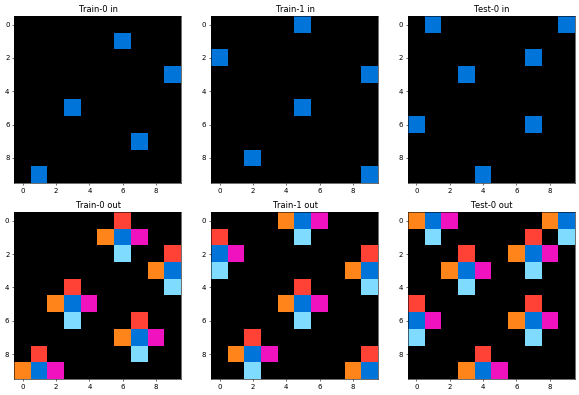

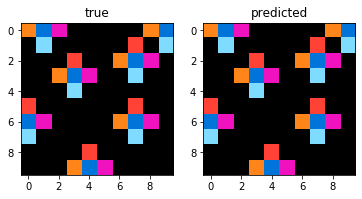

ooops

total tasks:  134
errors:  5
solved:  8


In [58]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

In [56]:
loop(diz_eval['t1_1'], 'eval', plot='onlysolved', aug=True)

ooops
ooops

total tasks:  92
errors:  2
solved:  0


ooops
----------------------------------------------------------------------------
train acc:  0.9125
valid acc:  1.0


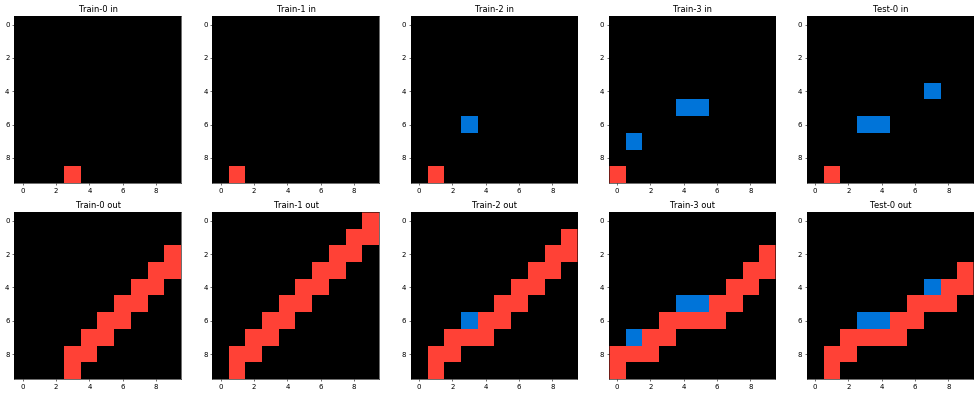

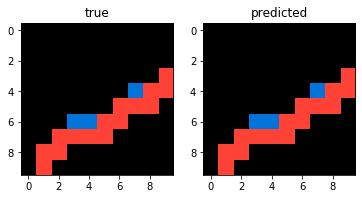

ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


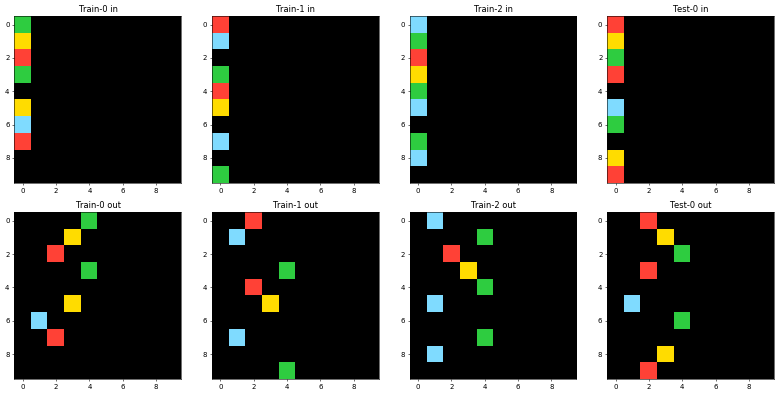

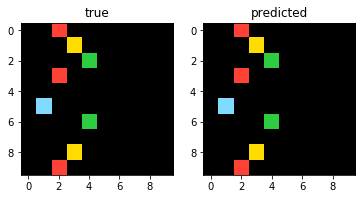


total tasks:  92
errors:  2
solved:  2


In [57]:
loop(diz_eval['t1_1'], 'eval', plot='onlysolved', aug=False)

### MULTI 50 50 (no elu) 10 

In [23]:


def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(50, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(50, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(50, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(50, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(50, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


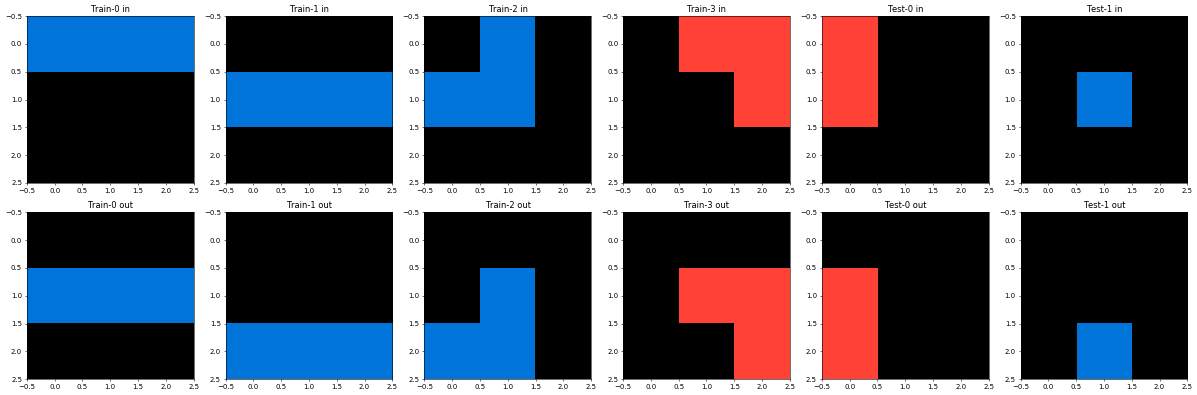

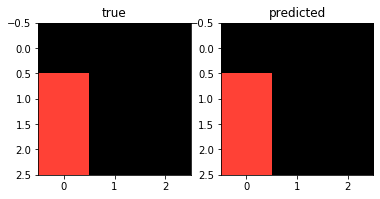

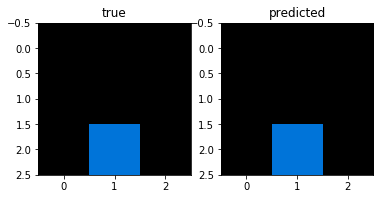

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


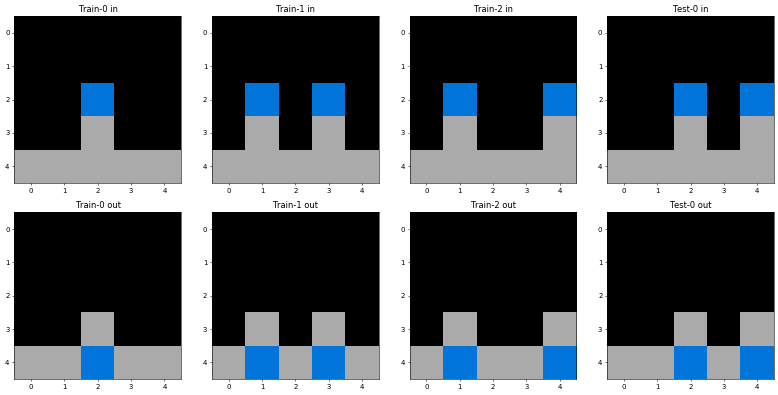

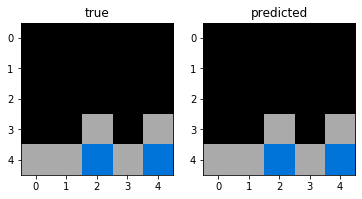

ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  0.995
valid acc:  1.0


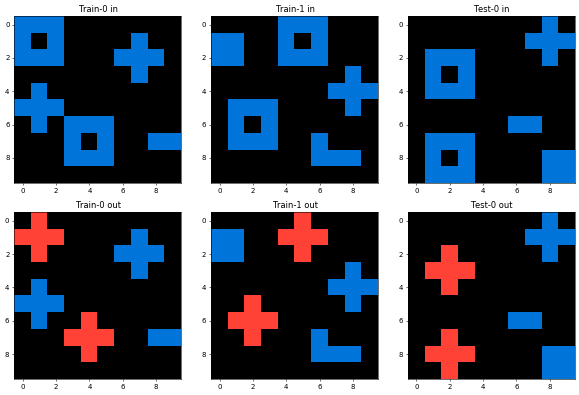

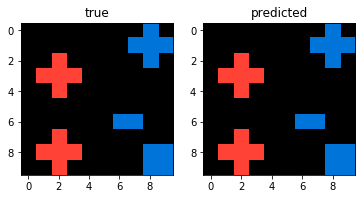

----------------------------------------------------------------------------
train acc:  0.93333334
valid acc:  1.0


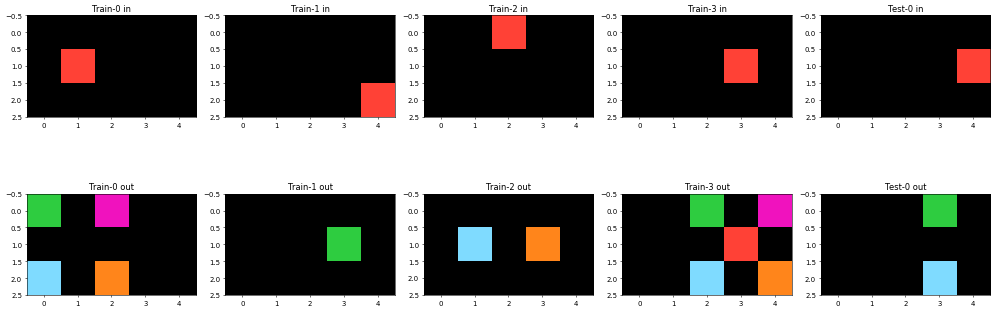

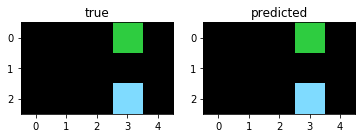

----------------------------------------------------------------------------
train acc:  0.9506173
valid acc:  1.0


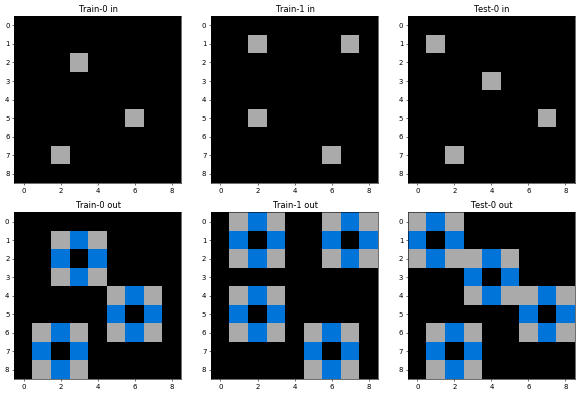

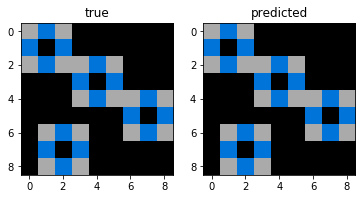

ooops

total tasks:  134
errors:  5
solved:  5


In [24]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


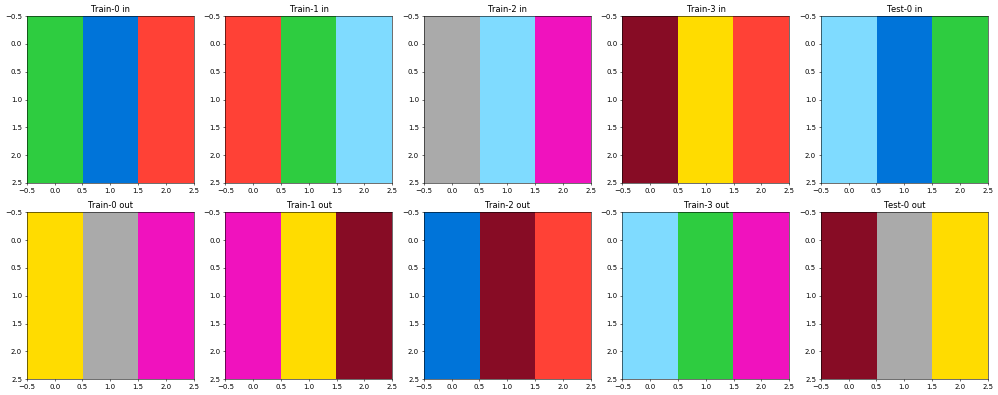

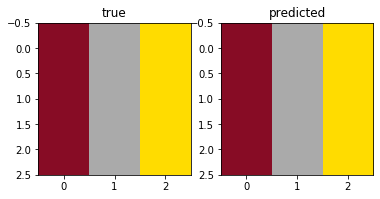

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


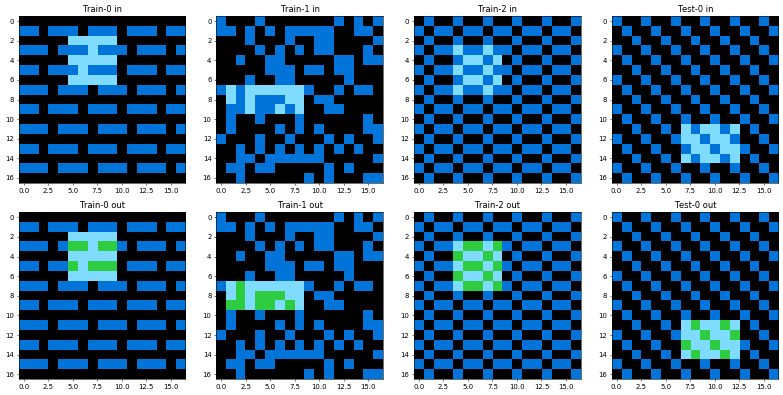

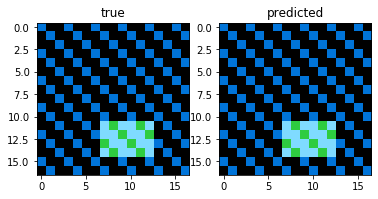

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


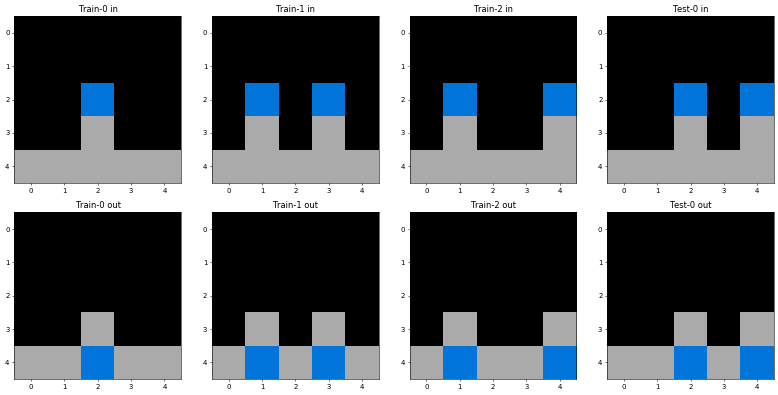

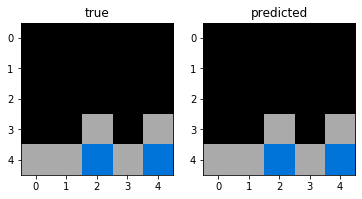

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


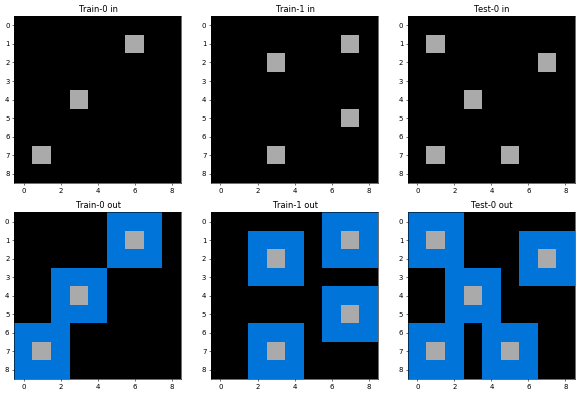

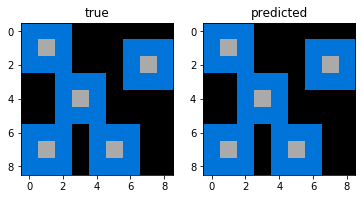

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


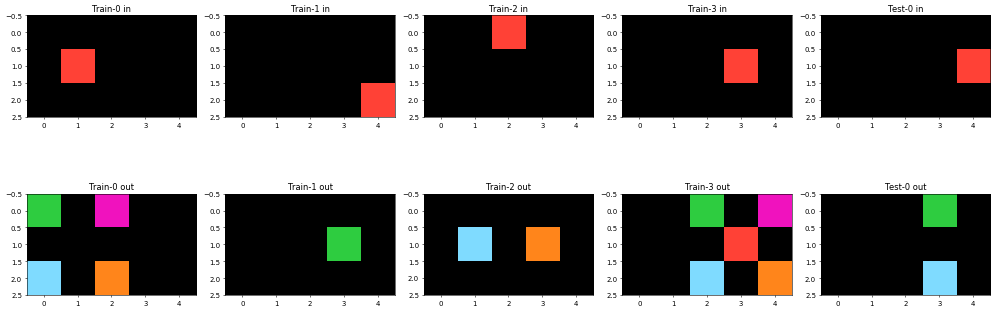

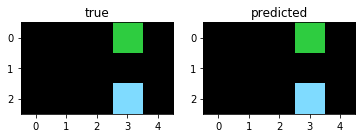

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


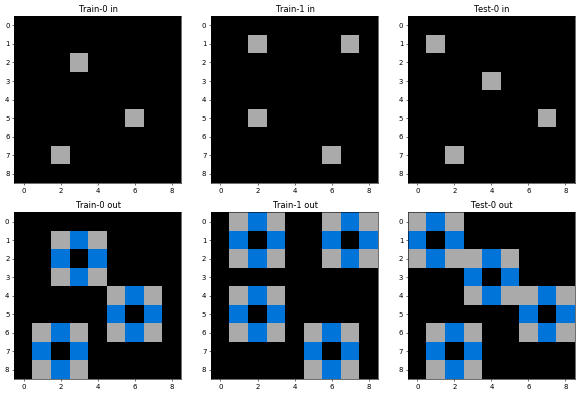

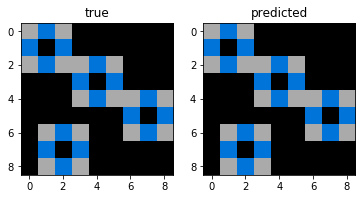

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


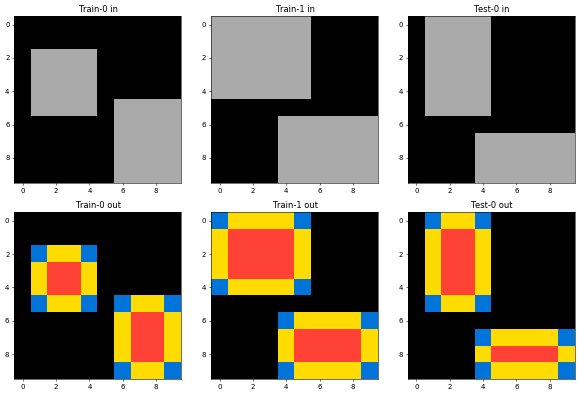

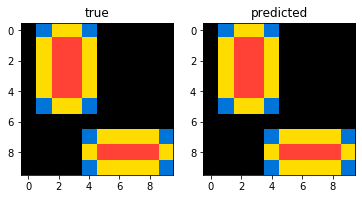

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


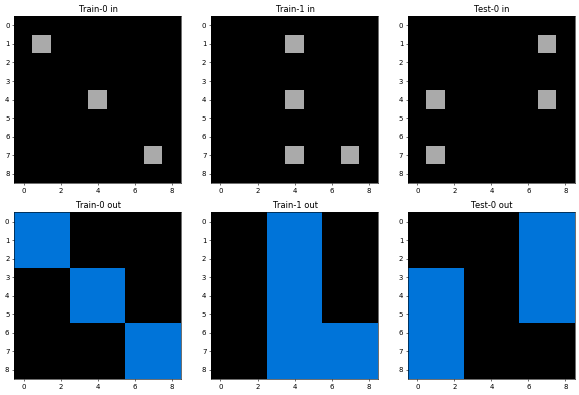

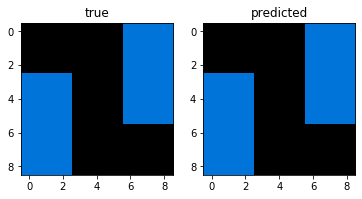

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


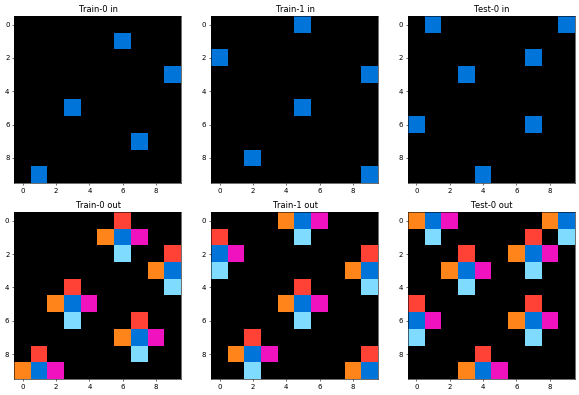

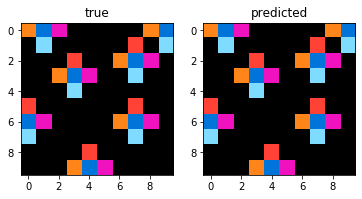

ooops

total tasks:  134
errors:  5
solved:  9


In [25]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### MULTI 50 50 (elu) 10 

In [26]:

def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(50, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(50, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(50, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(50, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(50, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(50, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


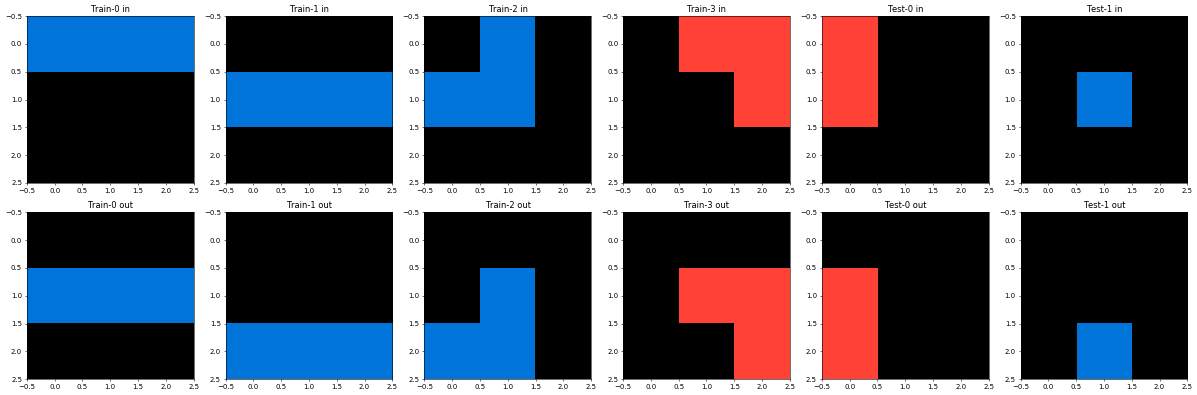

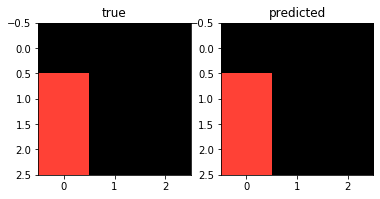

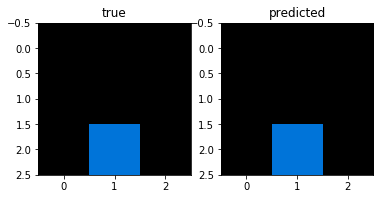

----------------------------------------------------------------------------
train acc:  0.9561707
valid acc:  1.0


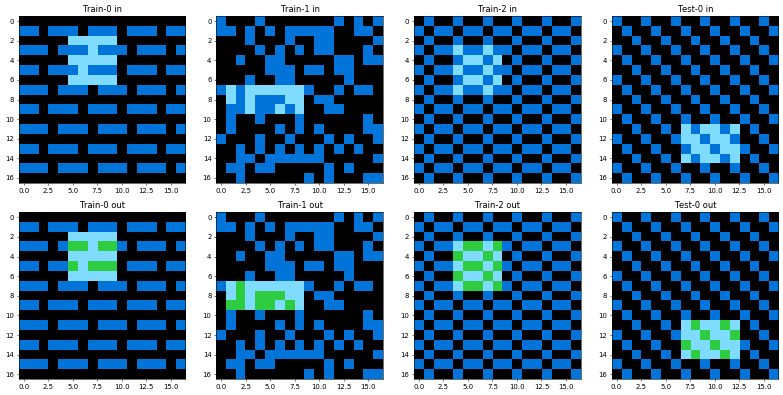

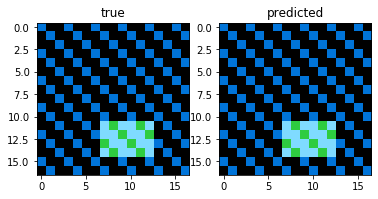

----------------------------------------------------------------------------
train acc:  0.9866667
valid acc:  1.0


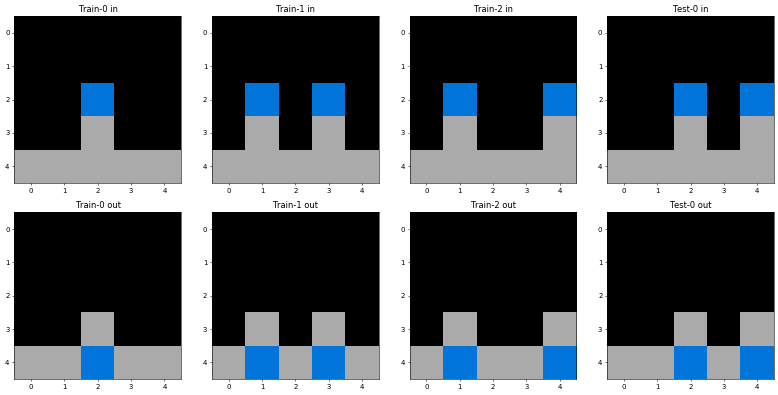

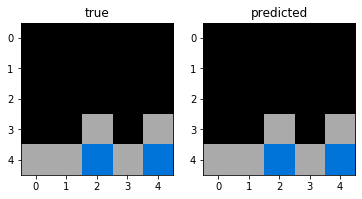

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


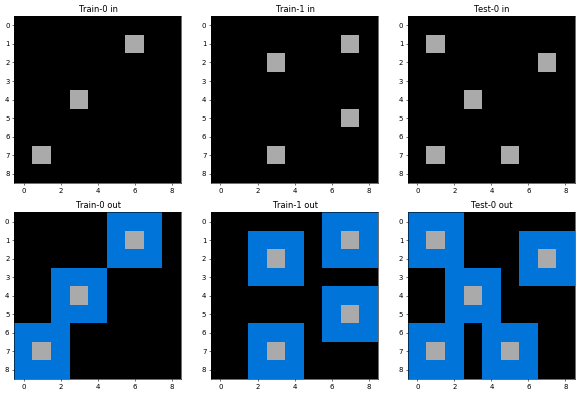

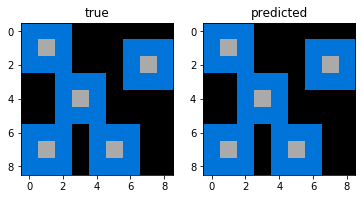

ooops
ooops
----------------------------------------------------------------------------
train acc:  0.67901236
valid acc:  1.0


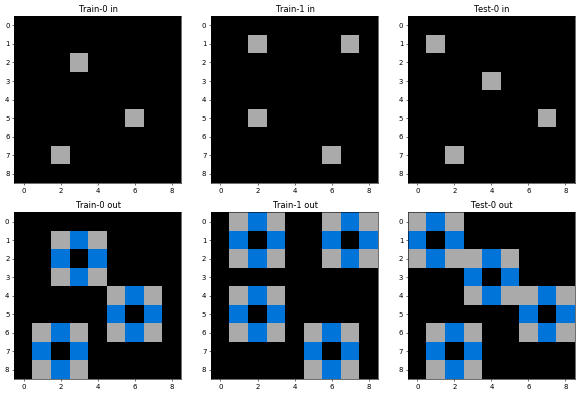

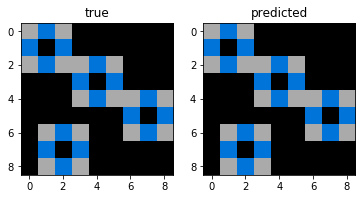

----------------------------------------------------------------------------
train acc:  0.96875
valid acc:  1.0


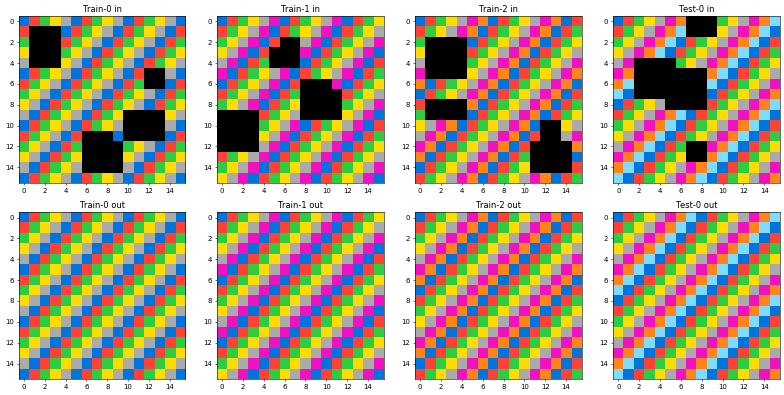

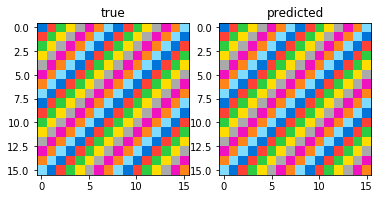

----------------------------------------------------------------------------
train acc:  0.825
valid acc:  1.0


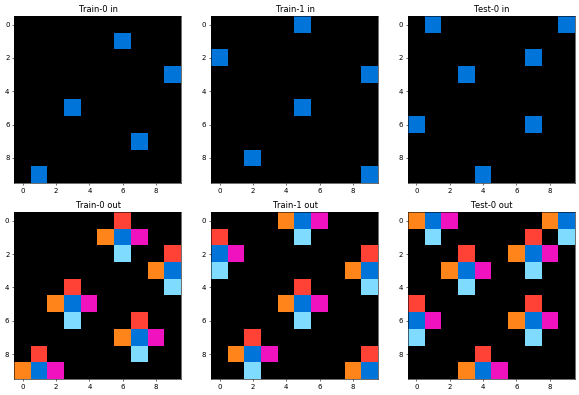

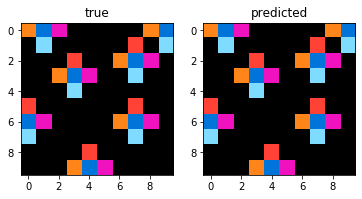

ooops

total tasks:  134
errors:  5
solved:  7


In [27]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


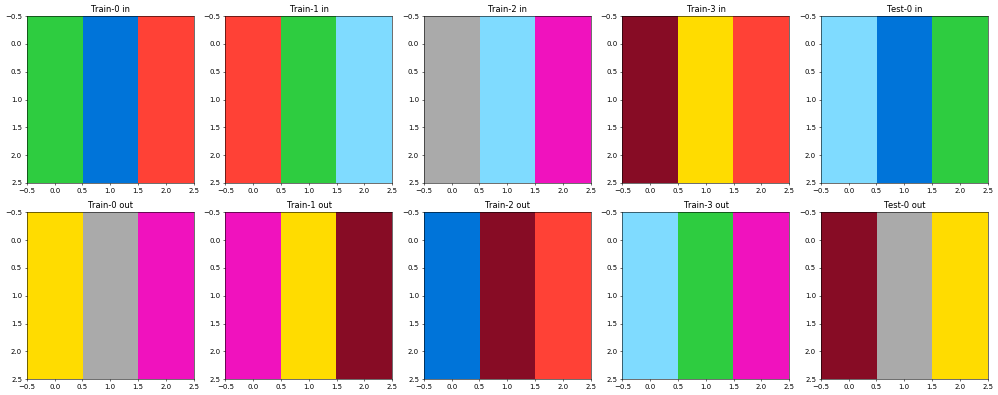

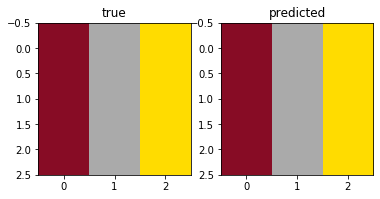

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


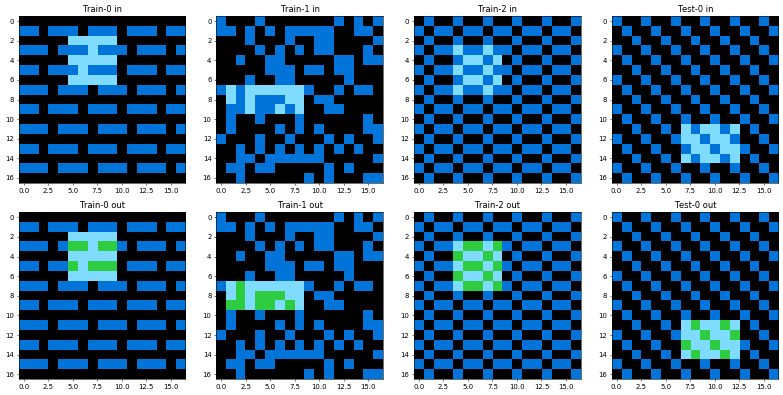

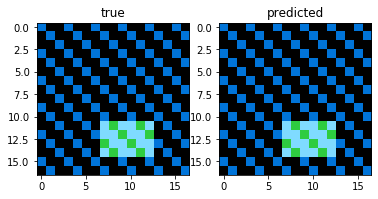

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


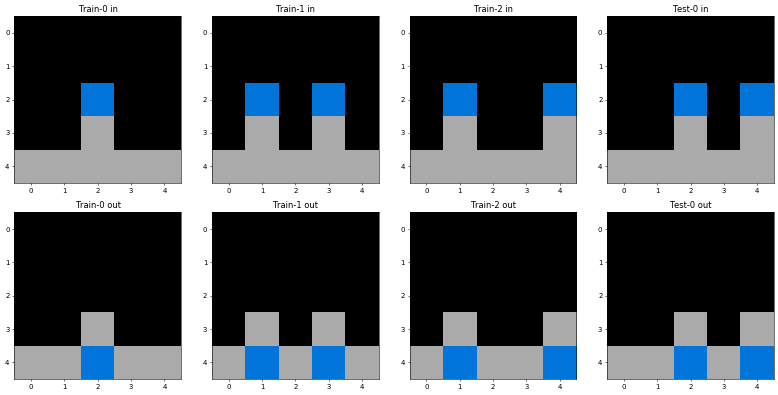

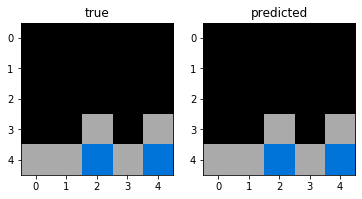

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


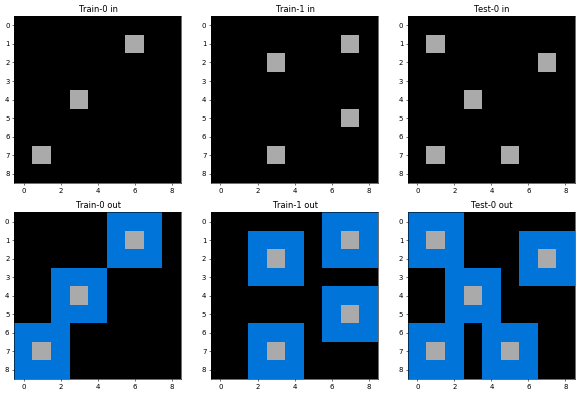

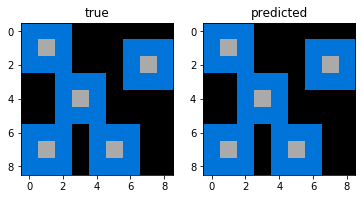

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


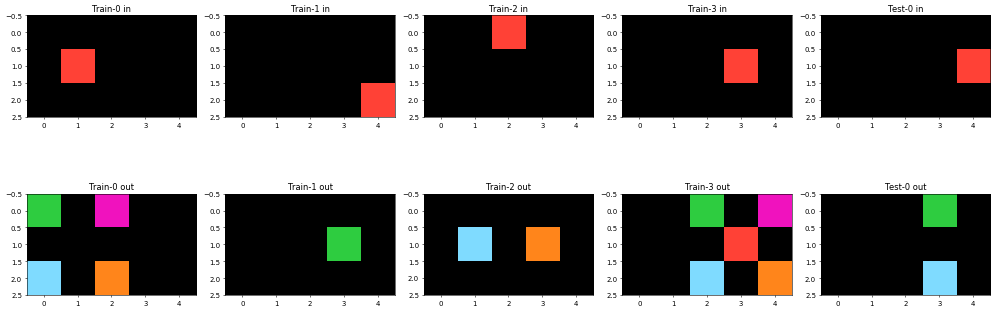

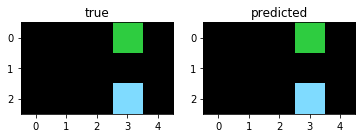

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


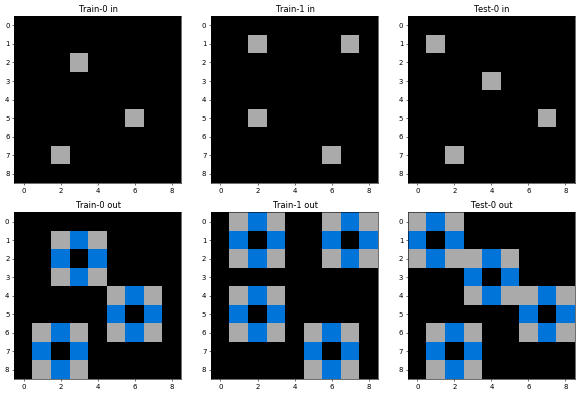

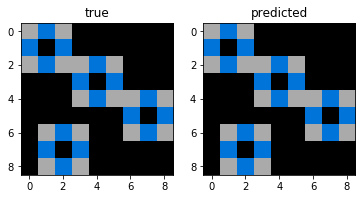

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


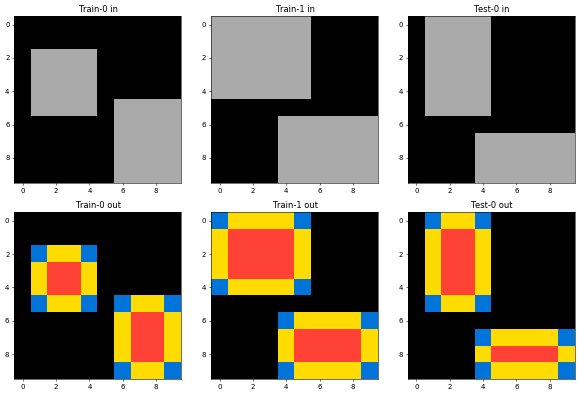

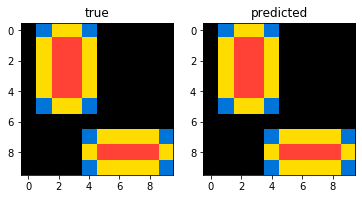

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


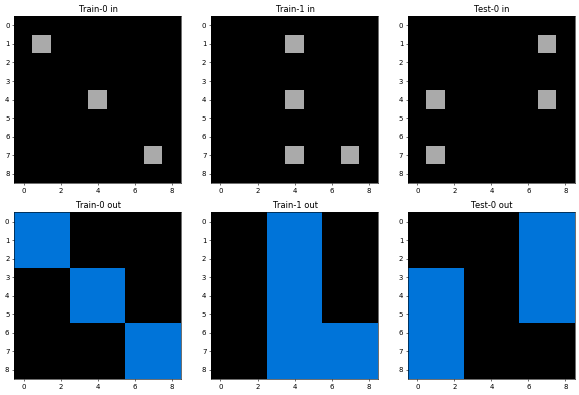

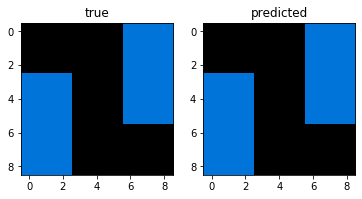

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


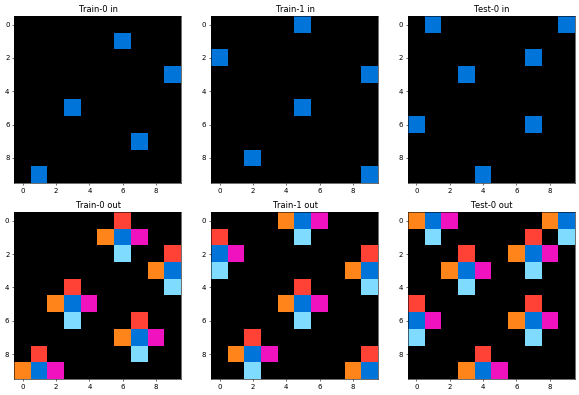

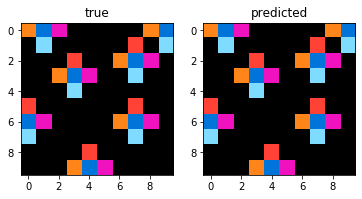

ooops

total tasks:  134
errors:  5
solved:  9


In [28]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 150 50 10

In [30]:

def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(150, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(150, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(150, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(150, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(150, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(150, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


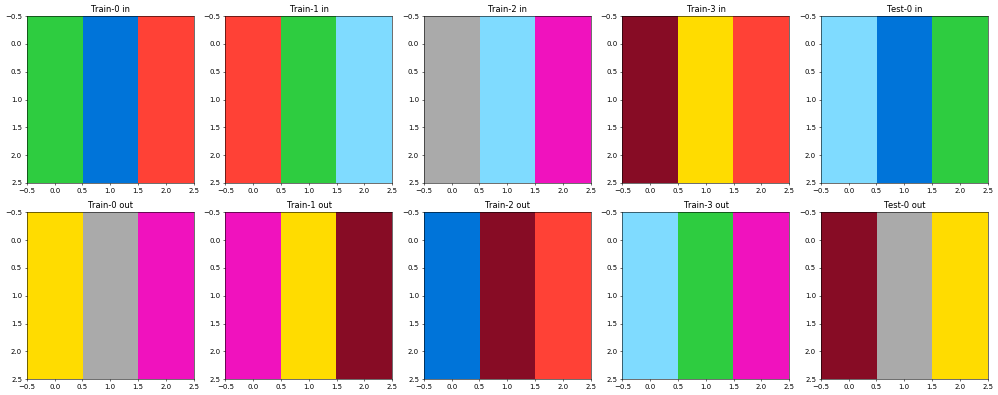

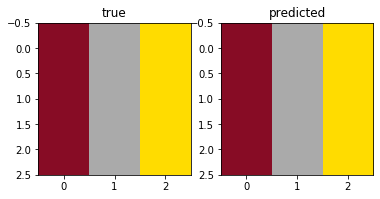

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


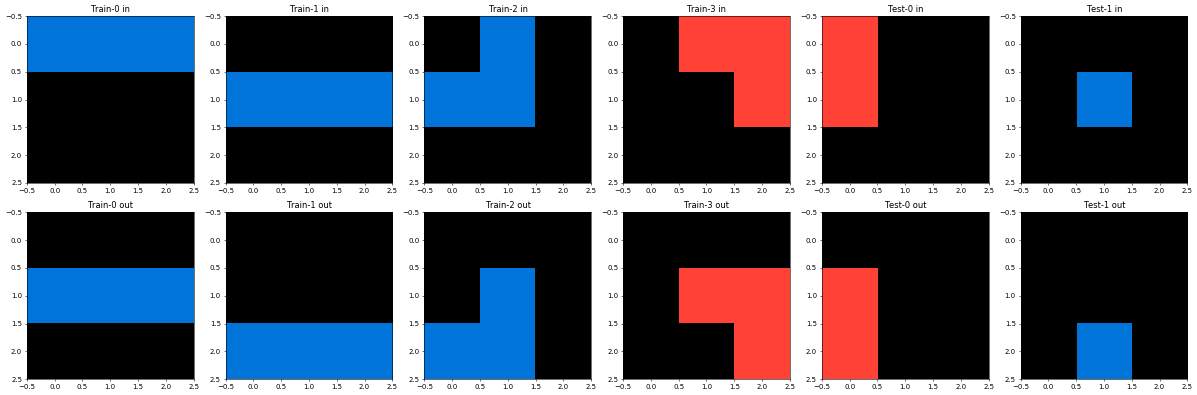

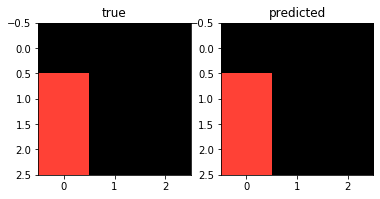

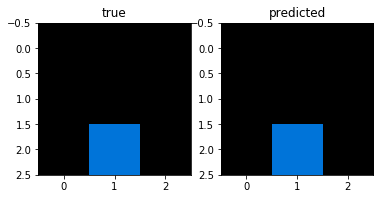

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


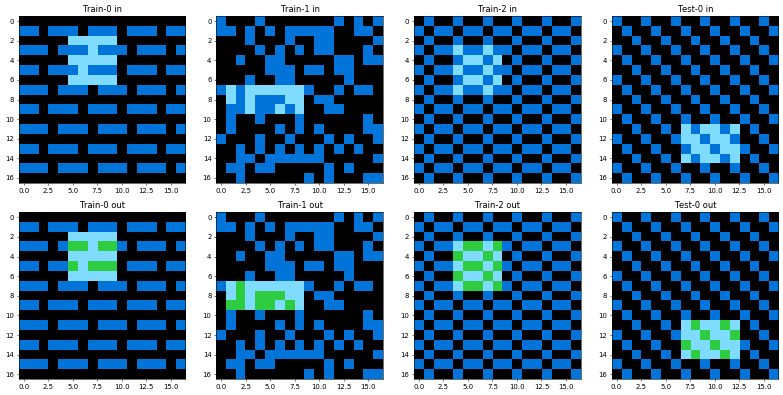

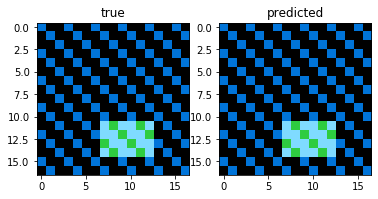

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


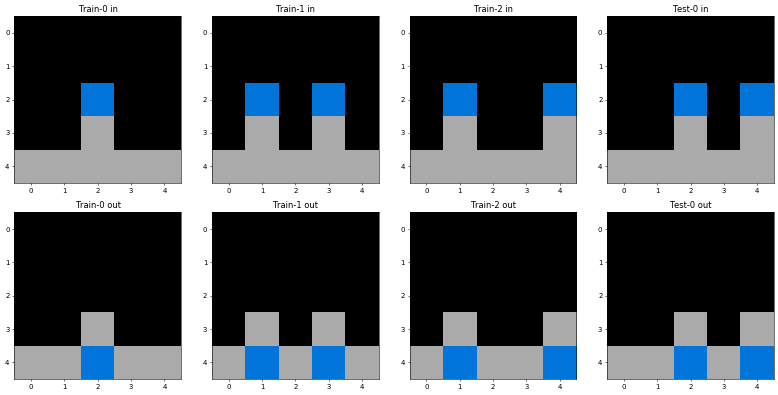

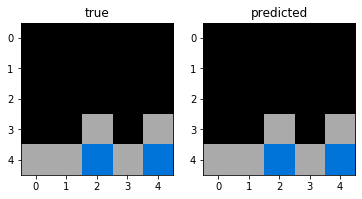

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


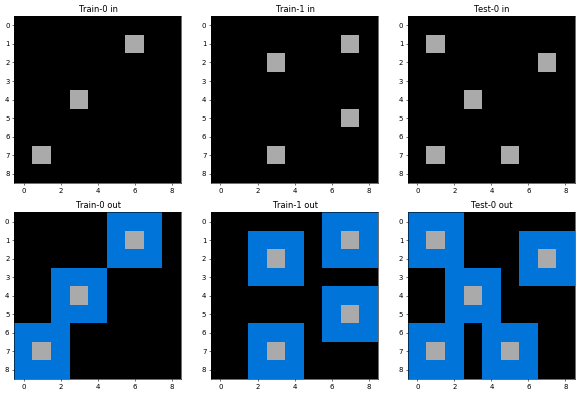

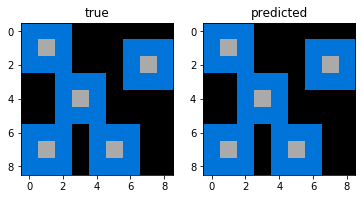

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


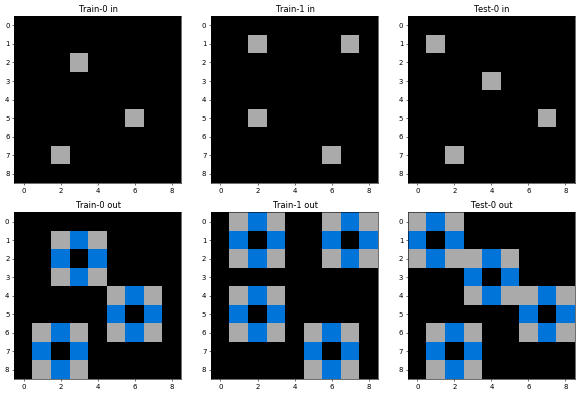

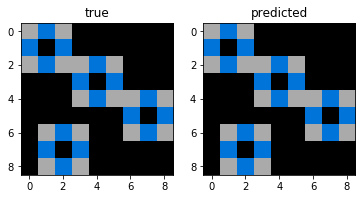

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


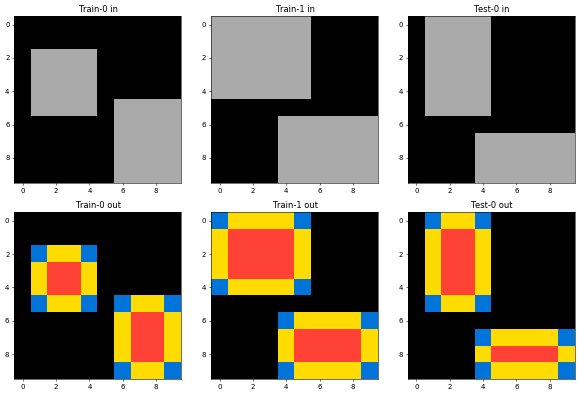

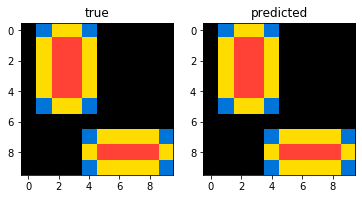

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


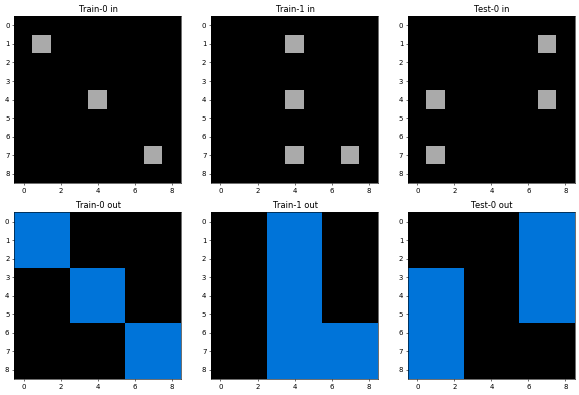

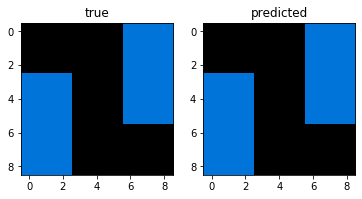

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


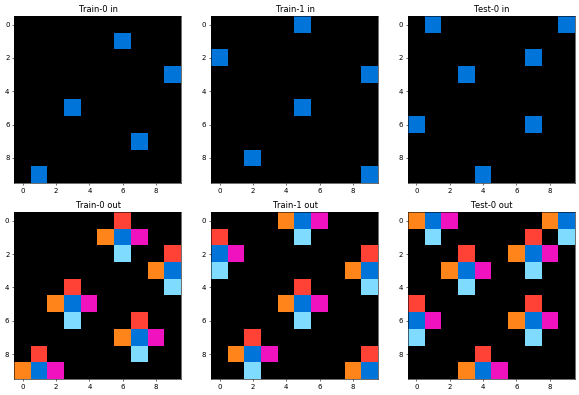

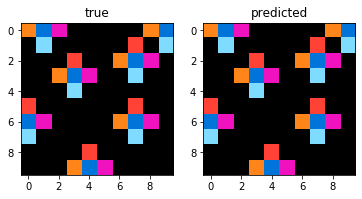

ooops

total tasks:  134
errors:  5
solved:  9


In [31]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

### 10 50 10

In [18]:

def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(10, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(10, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(10, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(10, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(10, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(10, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


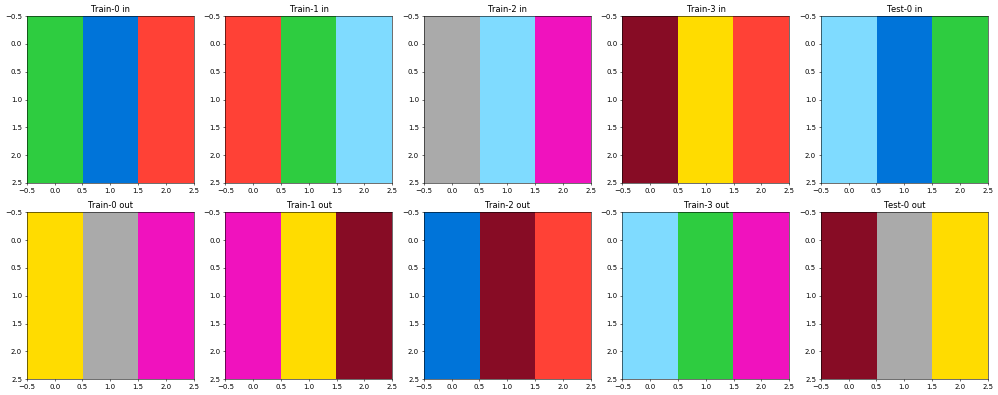

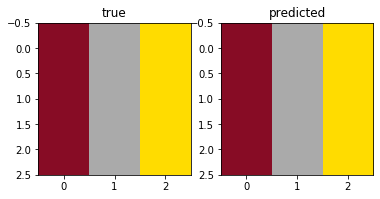

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


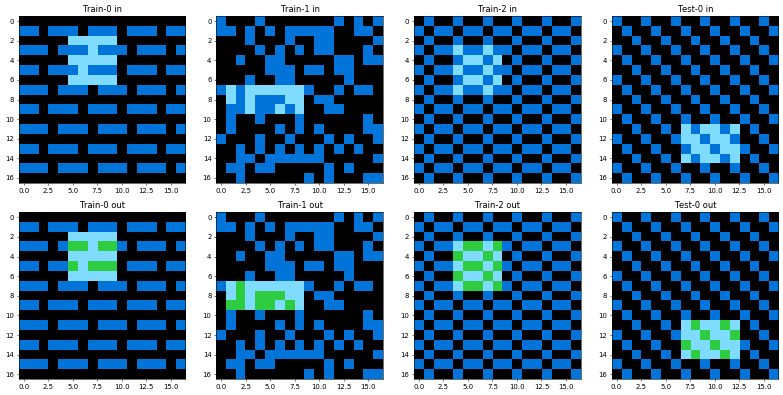

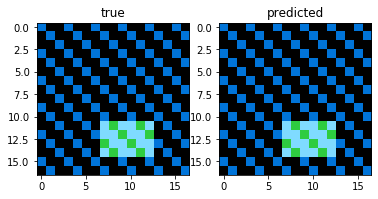

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


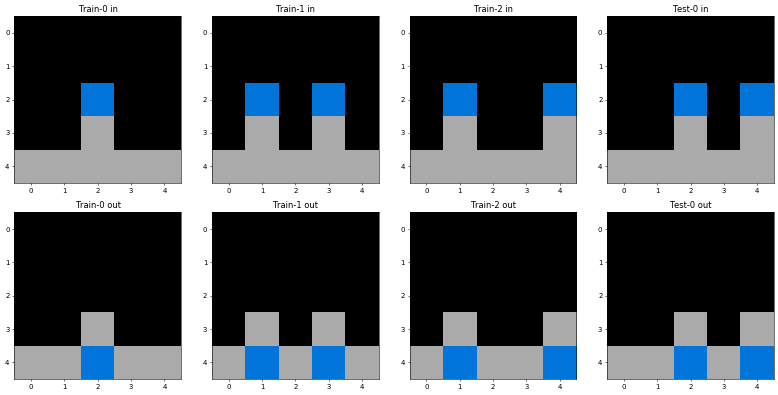

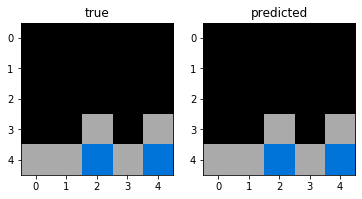

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


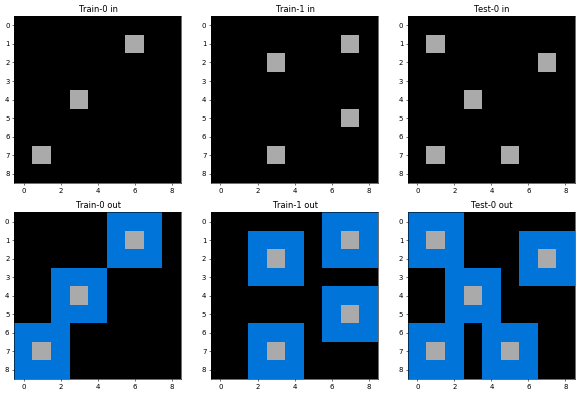

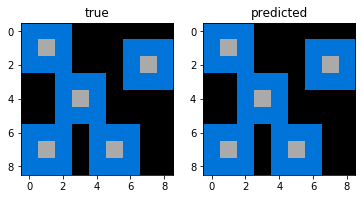

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


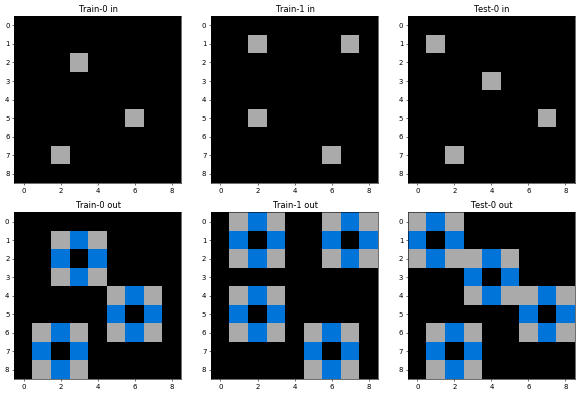

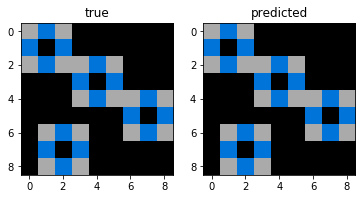

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


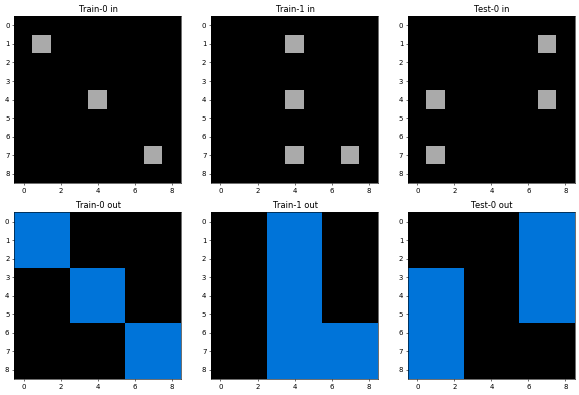

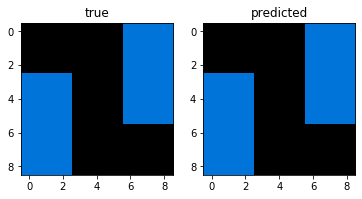

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


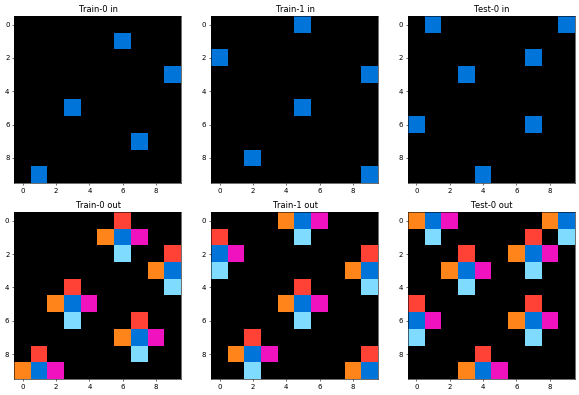

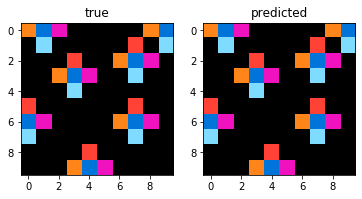

ooops

total tasks:  134
errors:  5
solved:  7


In [19]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

----------------------------------------------------------------------------
train acc:  0.9166667
valid acc:  1.0


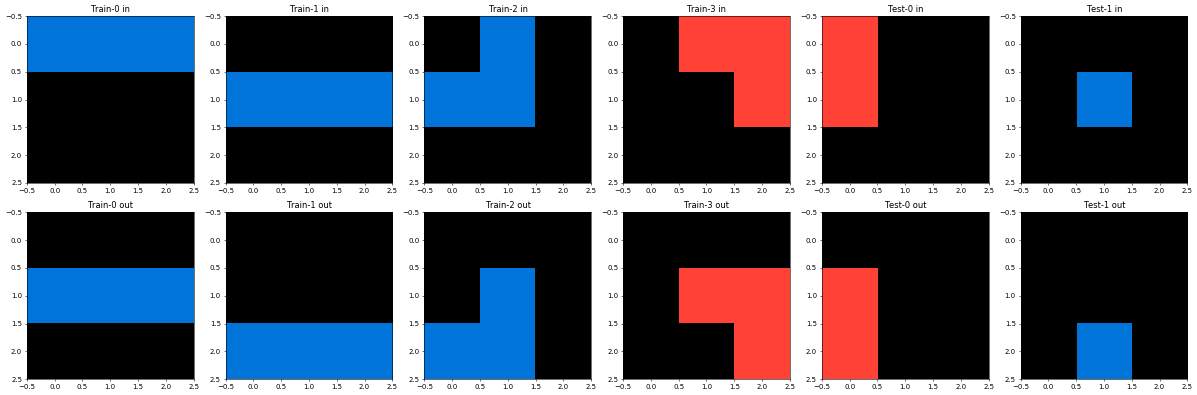

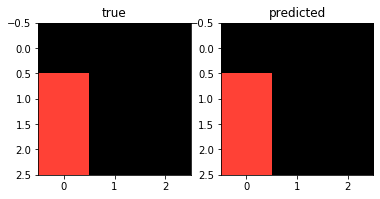

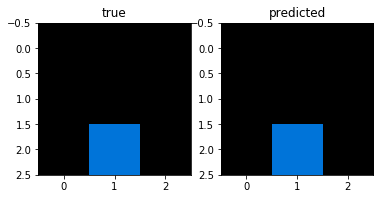

----------------------------------------------------------------------------
train acc:  0.91580164
valid acc:  1.0


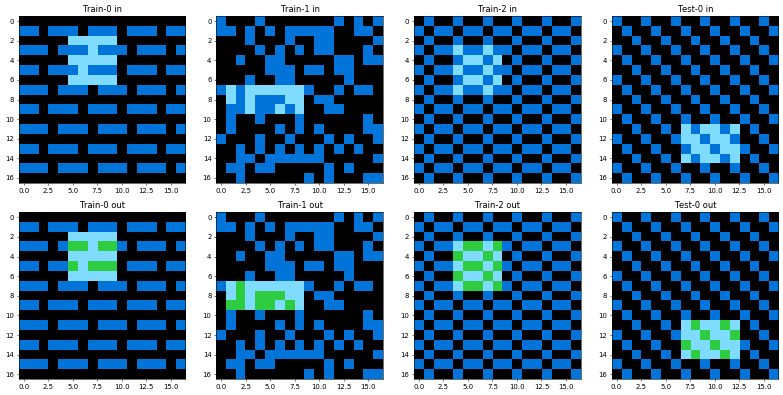

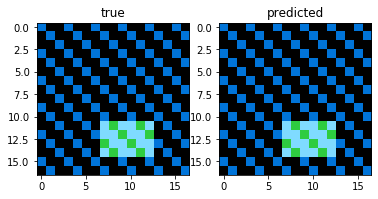

----------------------------------------------------------------------------
train acc:  0.8
valid acc:  1.0


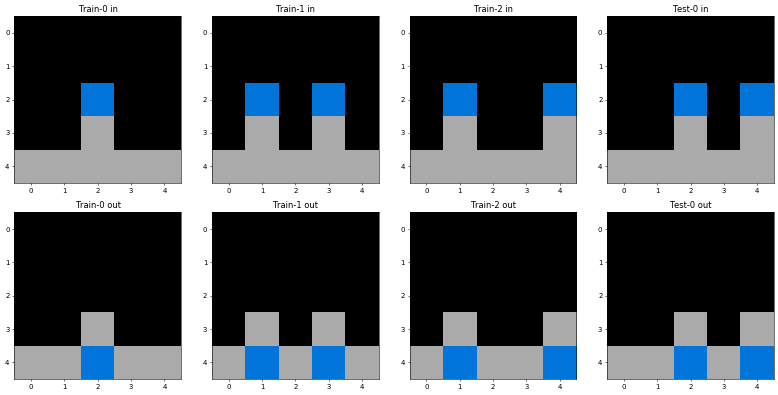

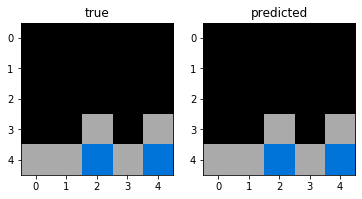

ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  0.975
valid acc:  1.0


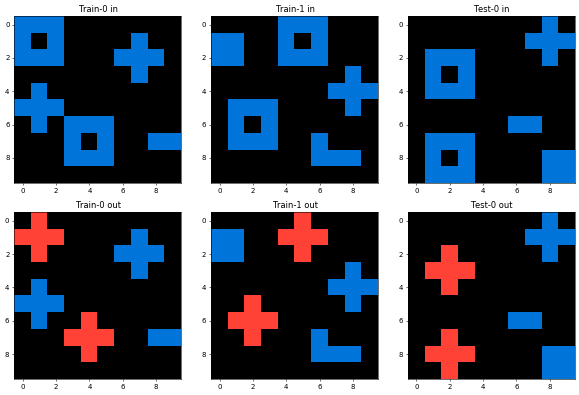

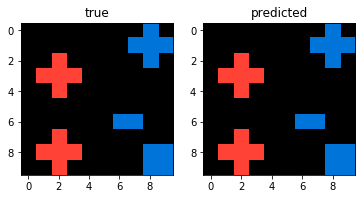

----------------------------------------------------------------------------
train acc:  0.9691358
valid acc:  1.0


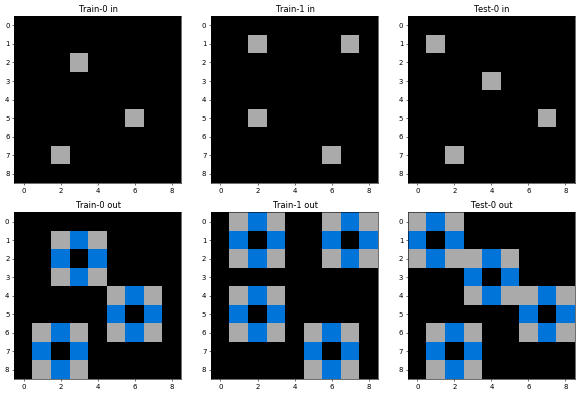

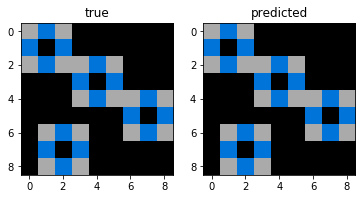

ooops

total tasks:  134
errors:  5
solved:  5


In [20]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

ooops
----------------------------------------------------------------------------
train acc:  0.91
valid acc:  1.0


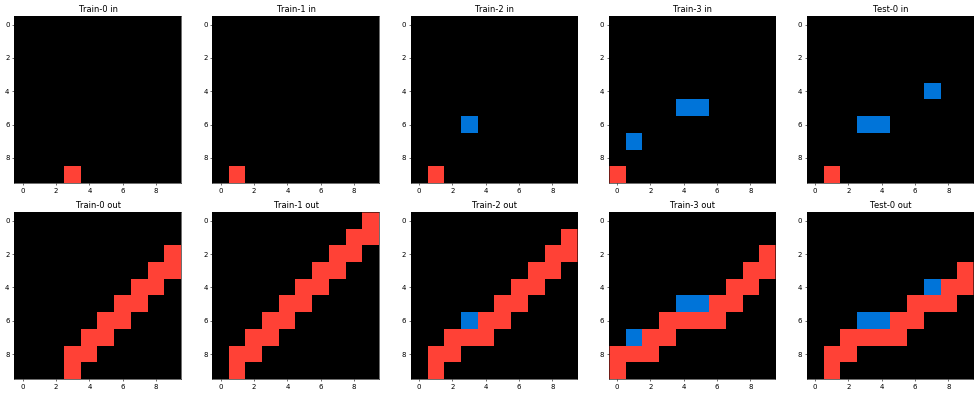

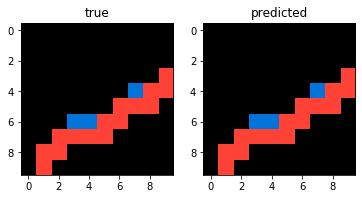

----------------------------------------------------------------------------
train acc:  0.9980276
valid acc:  1.0


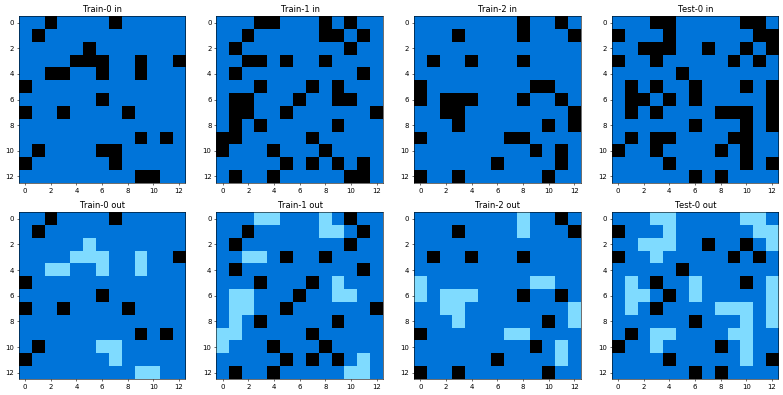

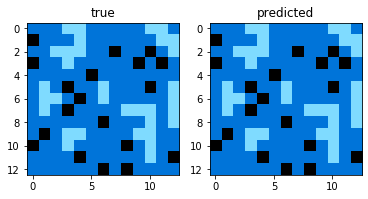

ooops

total tasks:  92
errors:  2
solved:  2


In [21]:
loop(diz_eval['t1_1'], 'eval', plot='onlysolved', aug=False)

In [22]:
loop(diz_eval['t1_1'], 'eval', plot='onlysolved', aug=True)

ooops
ooops

total tasks:  92
errors:  2
solved:  0


### 10 50 50 50 10

In [18]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    
    conv=tf.keras.layers.Conv2D(10, kernel_size=(1,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    
    conv2=tf.keras.layers.Conv2D(10, kernel_size=(2,2),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv2=tf.keras.layers.Dropout(rate=0.15)(conv2)
    
    conv3=tf.keras.layers.Conv2D(10, kernel_size=(3,3),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv3=tf.keras.layers.Dropout(rate=0.15)(conv3)
    
    conv5=tf.keras.layers.Conv2D(10, kernel_size=(5,5),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv5=tf.keras.layers.Dropout(rate=0.15)(conv5)
    
    conv6=tf.keras.layers.Conv2D(10, kernel_size=(1,10),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv6=tf.keras.layers.Dropout(rate=0.15)(conv6)
    
    conv7=tf.keras.layers.Conv2D(10, kernel_size=(10,1),
                                padding='same', activation='elu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001))(images)
    conv7=tf.keras.layers.Dropout(rate=0.15)(conv7)
    
    conv=tf.keras.layers.concatenate([conv, conv2,conv3,conv5, conv6, conv7])
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='elu')(conv)
    conv=tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

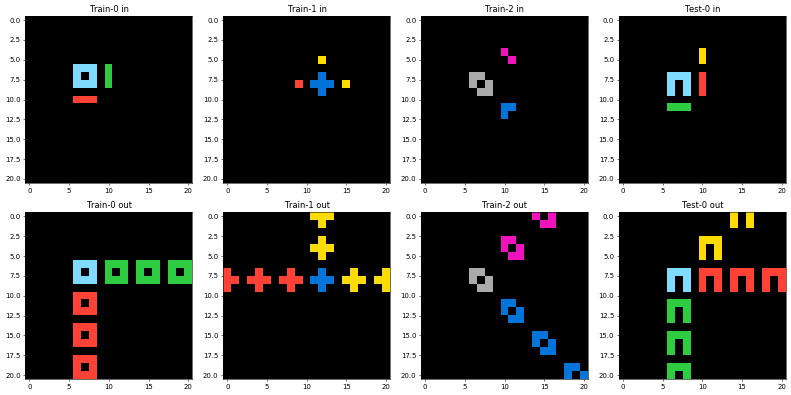

In [27]:
task=get_task('train', diz_train['t1_1'][0])
plot_task(task)

In [28]:
model=build_model(task)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 21, 21, 10)] 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 21, 21, 10)   110         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 21, 21, 10)   410         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 21, 21, 10)   910         input_3[0][0]                    
____________________________________________________________________________________________

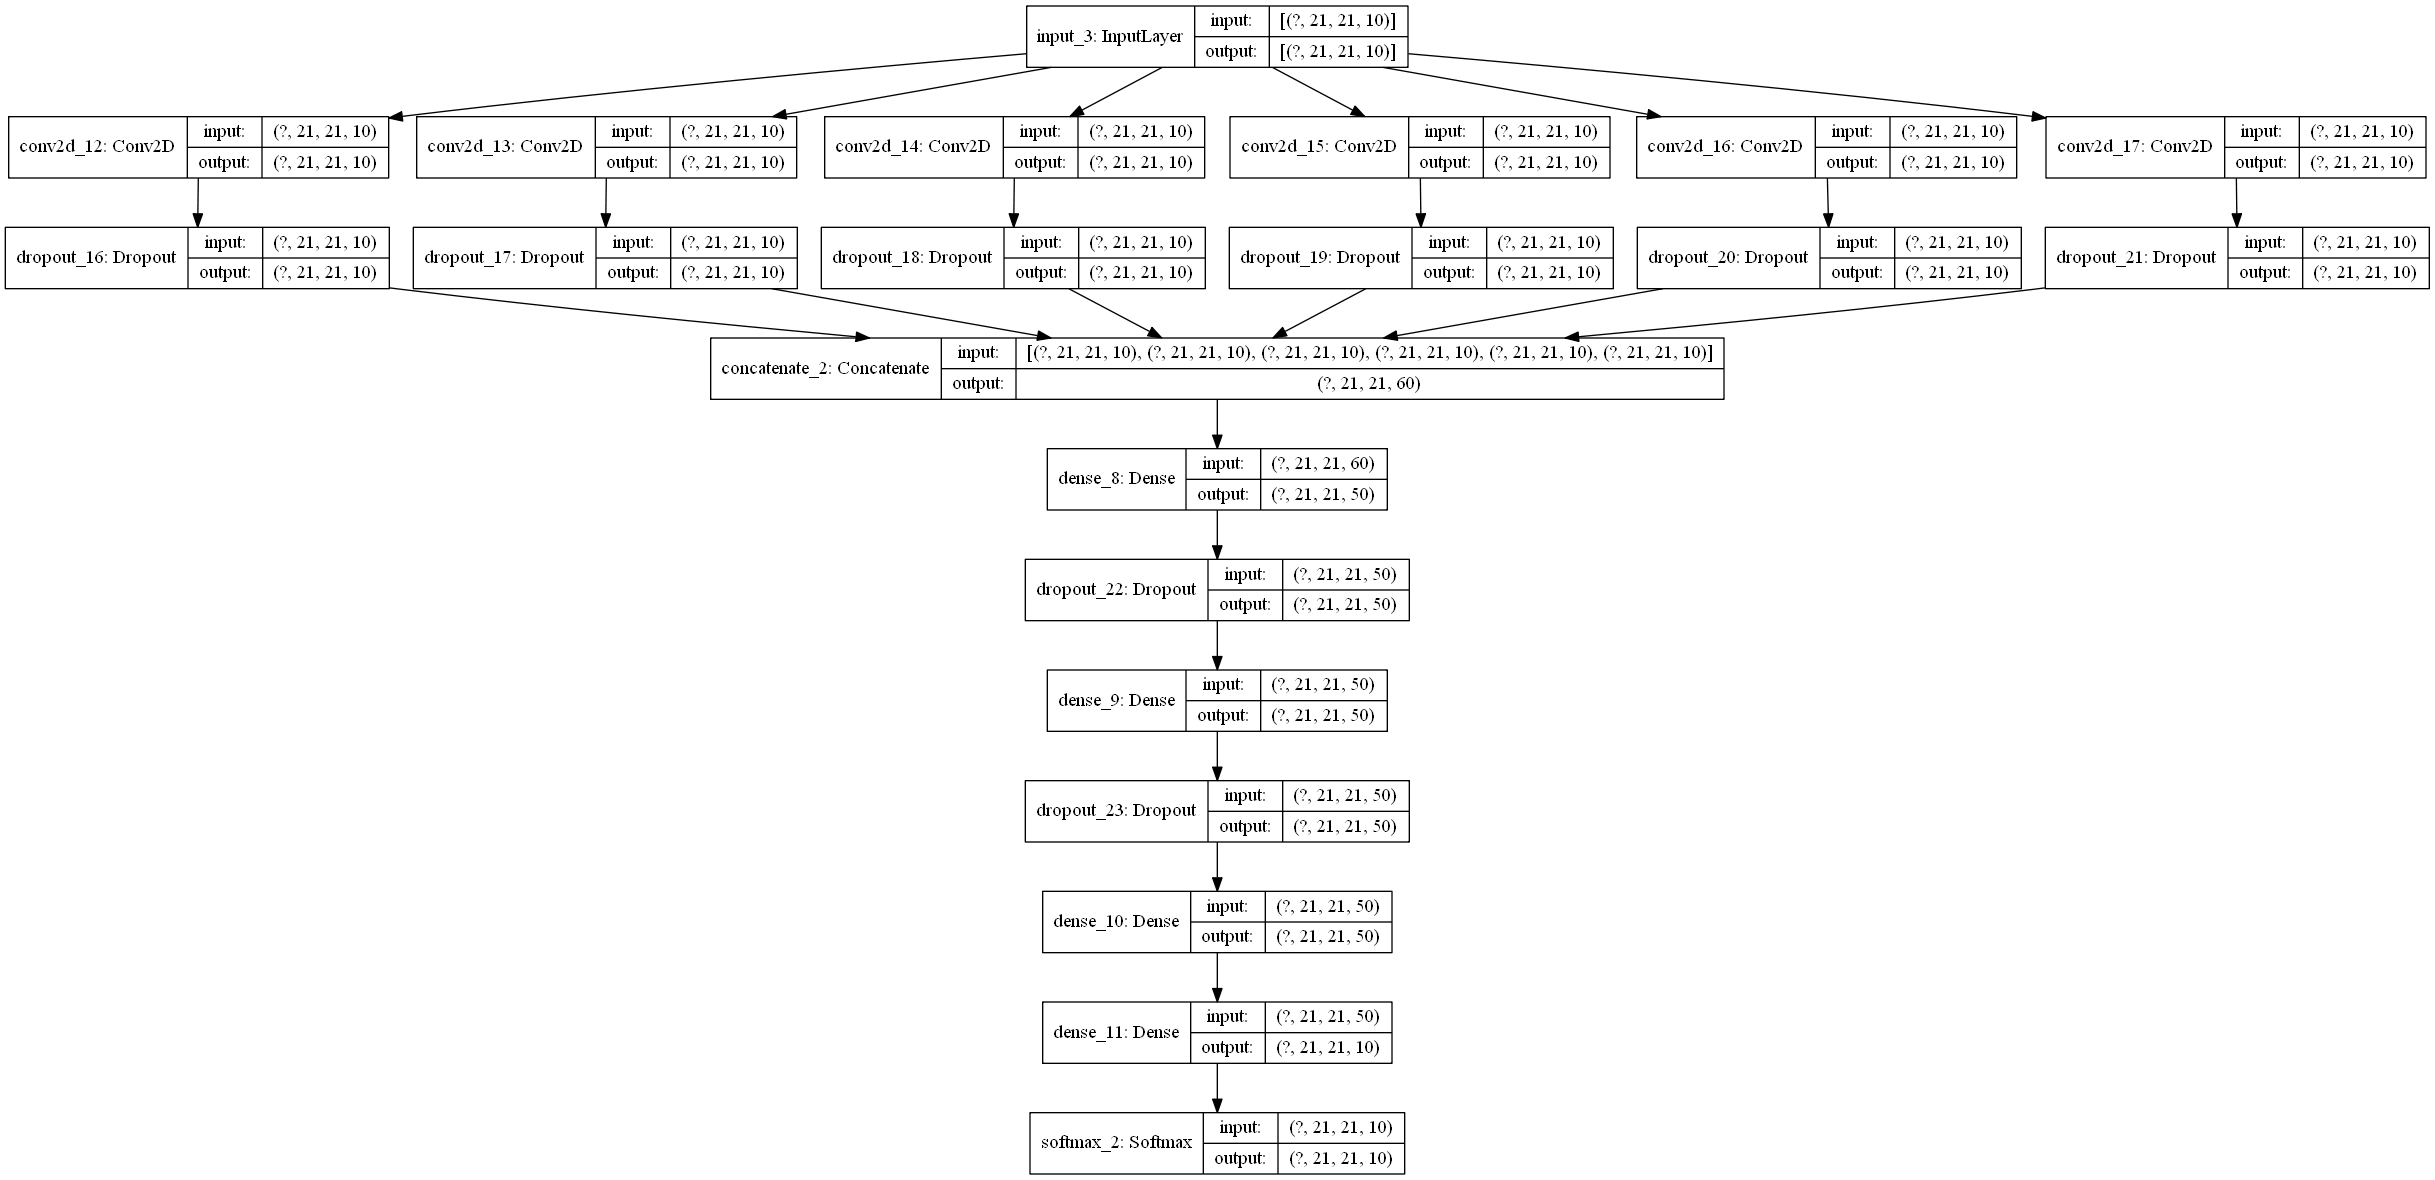

In [29]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

----------------------------------------------------------------------------
train acc:  0.9958848
valid acc:  1.0


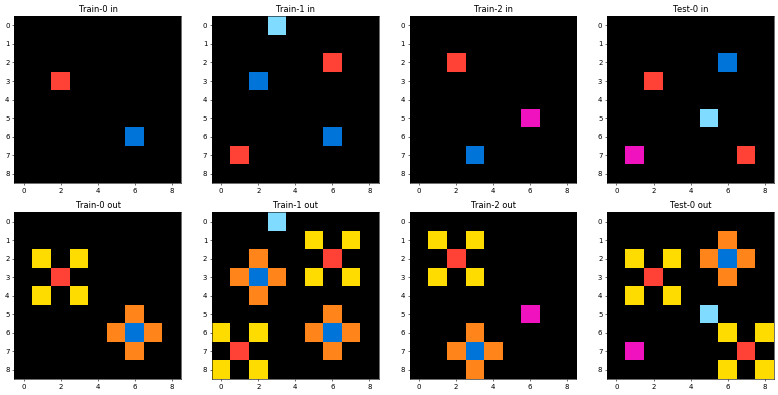

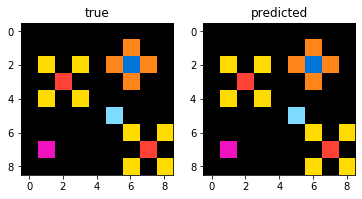

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


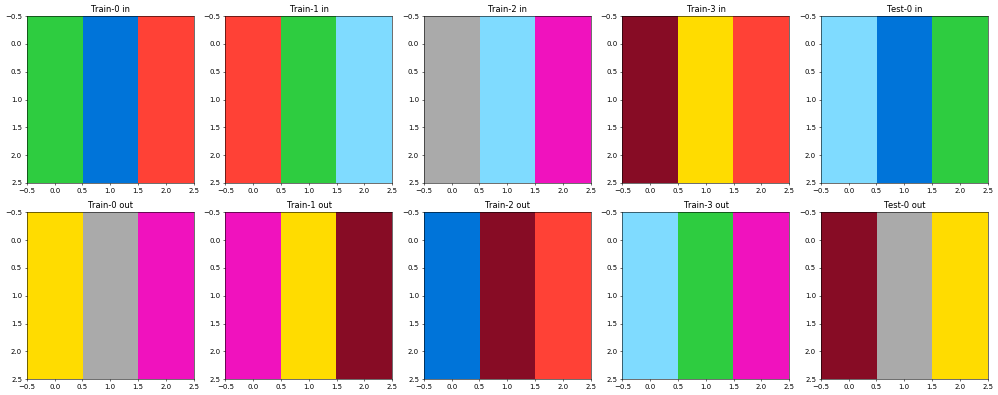

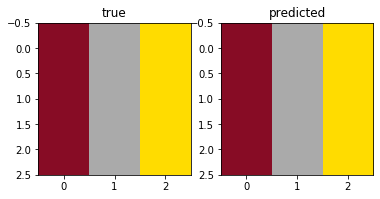

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


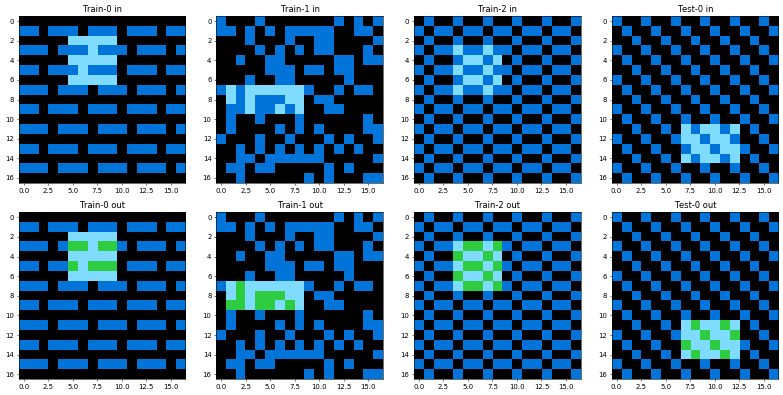

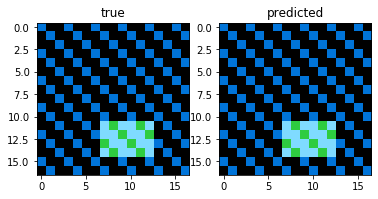

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


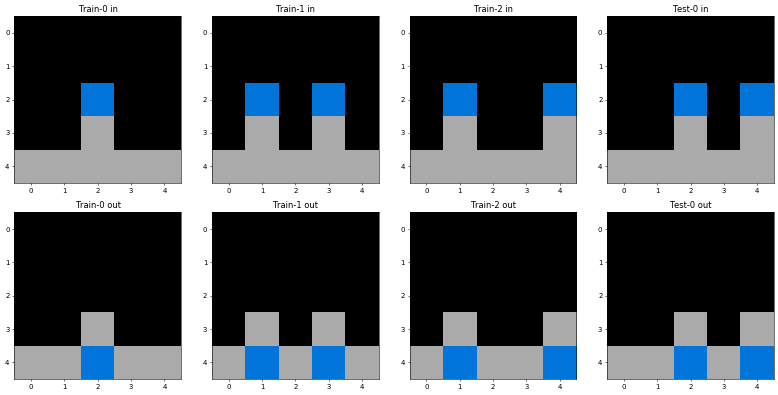

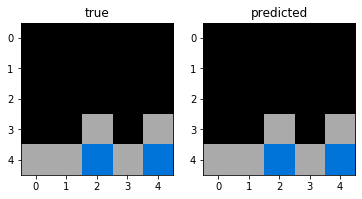

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


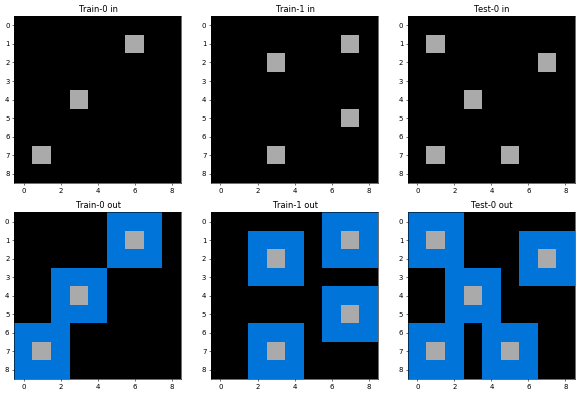

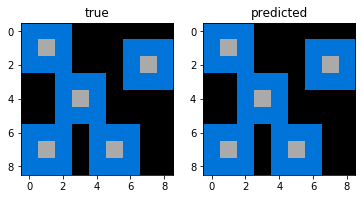

ooops
ooops
----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


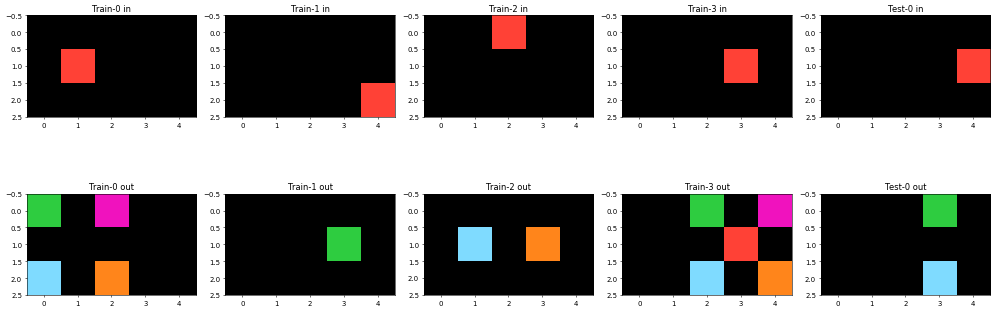

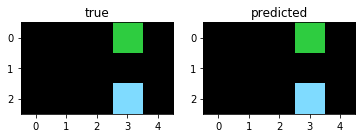

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


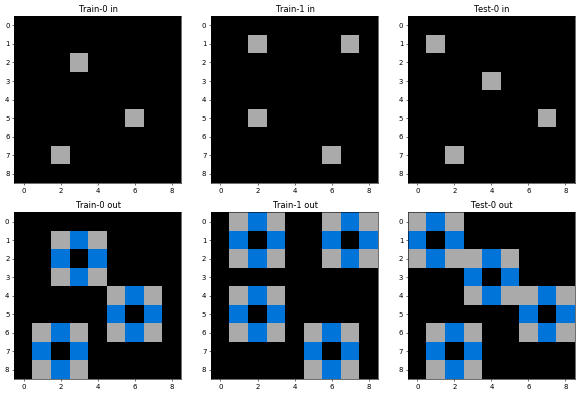

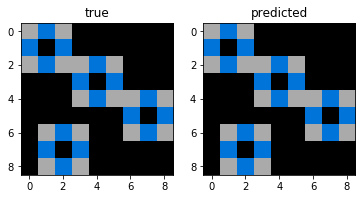

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


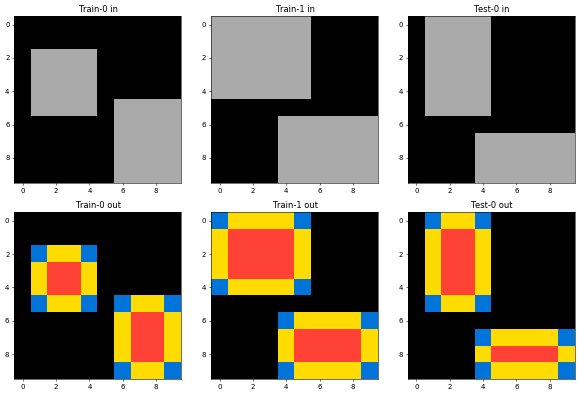

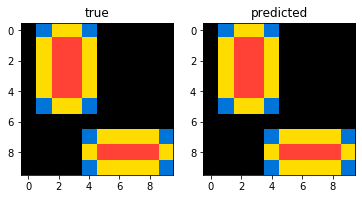

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


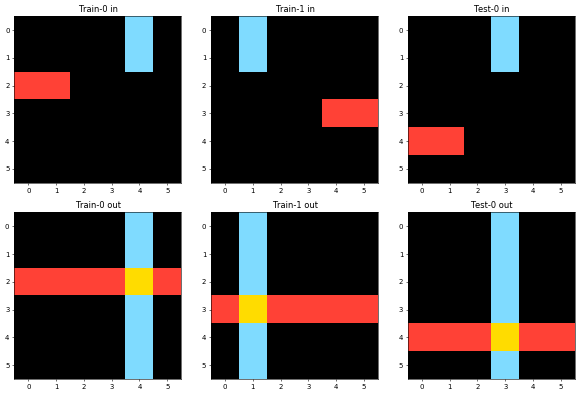

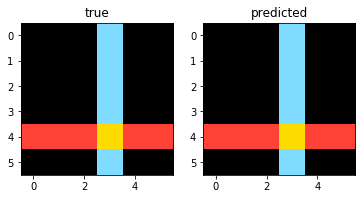

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


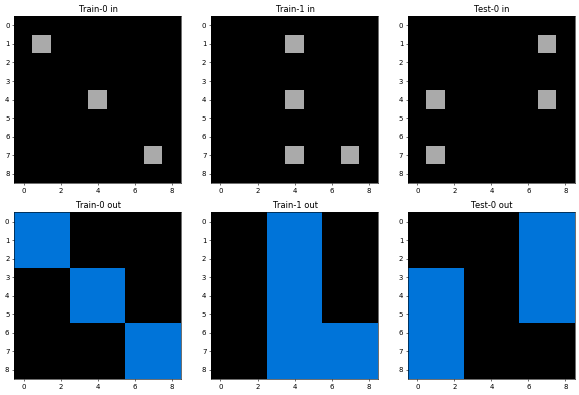

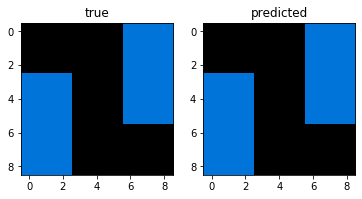

----------------------------------------------------------------------------
train acc:  1.0
valid acc:  1.0


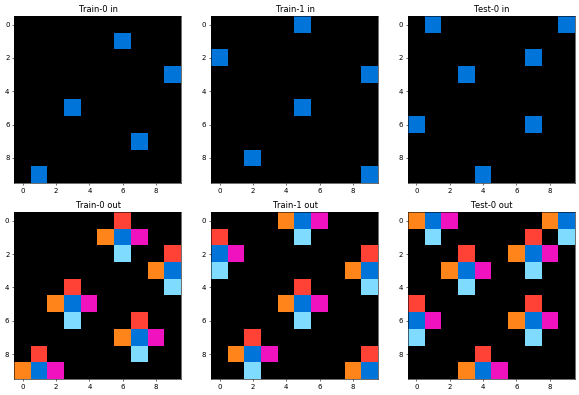

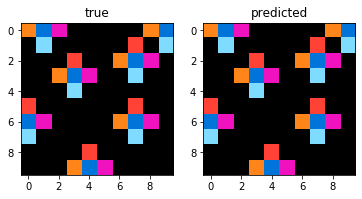

ooops

total tasks:  134
errors:  5
solved:  11


In [56]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=False)

ooops
ooops
ooops
ooops
----------------------------------------------------------------------------
train acc:  0.9
valid acc:  1.0


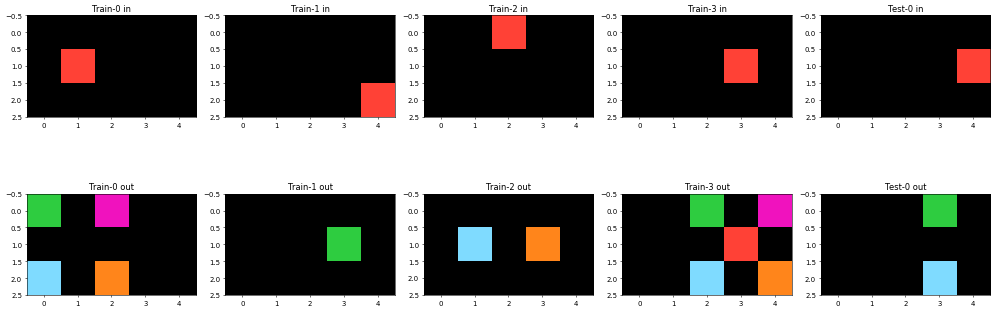

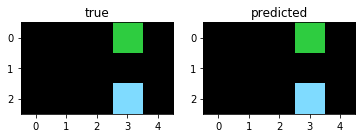

----------------------------------------------------------------------------
train acc:  0.7839506
valid acc:  1.0


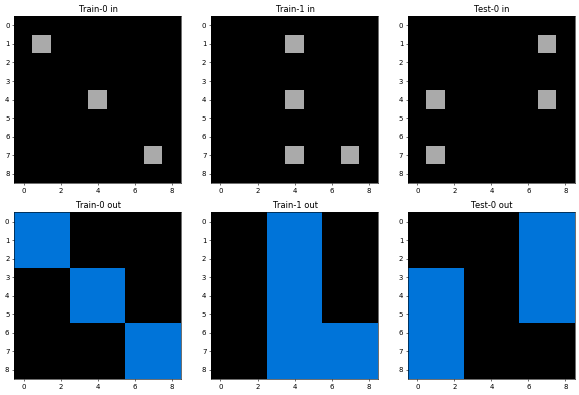

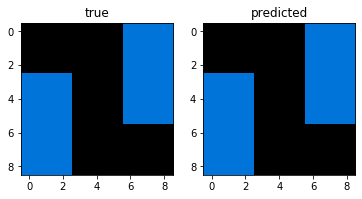

ooops

total tasks:  134
errors:  5
solved:  2


In [58]:
loop(diz_train['t1_1'], 'train', plot='onlysolved', aug=True)

ooops
----------------------------------------------------------------------------
train acc:  0.895
valid acc:  1.0


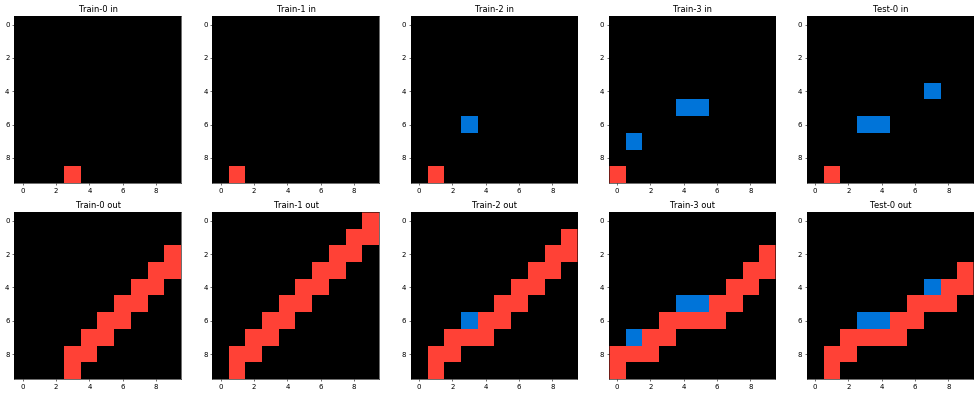

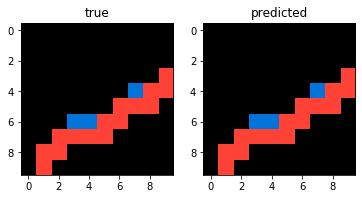

----------------------------------------------------------------------------
train acc:  0.9980276
valid acc:  1.0


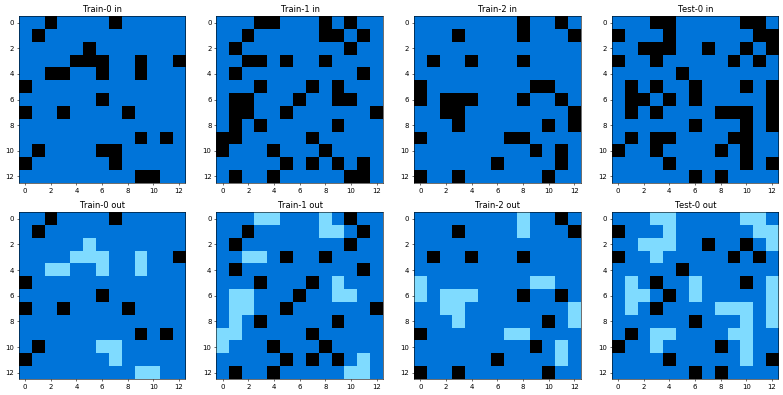

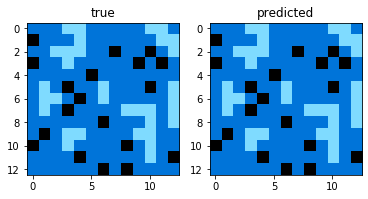

ooops
----------------------------------------------------------------------------
train acc:  0.99333334
valid acc:  1.0


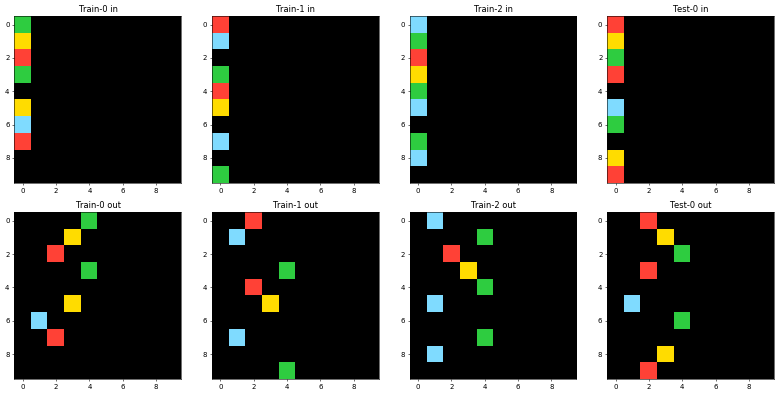

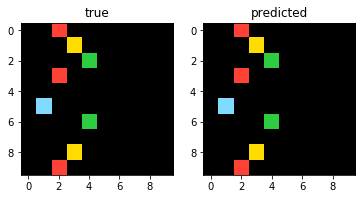


total tasks:  92
errors:  2
solved:  3


In [24]:
loop(diz_eval['t1_1'], 'eval', plot='onlysolved', aug=False)

---------------------------------------------------------


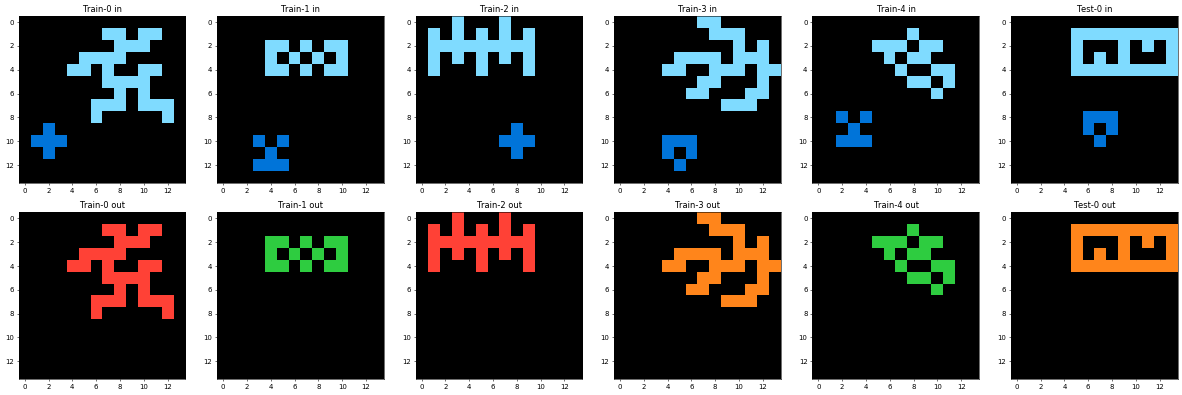

train acc:  0.96020406
valid acc:  0.9183673


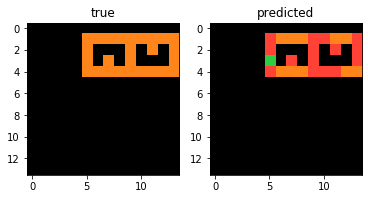

---------------------------------------------------------


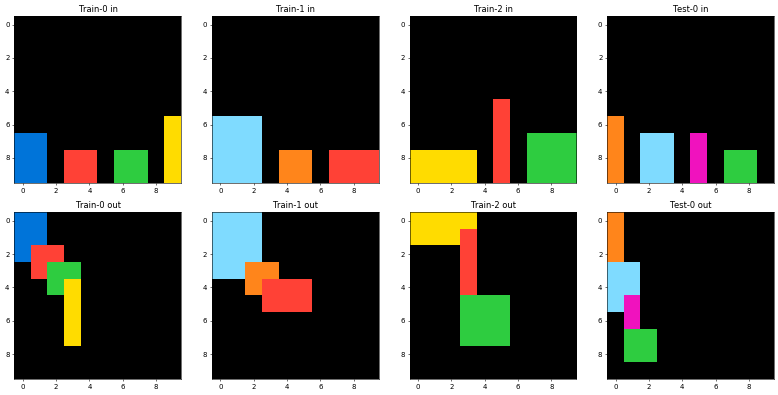

train acc:  0.93333334
valid acc:  0.79


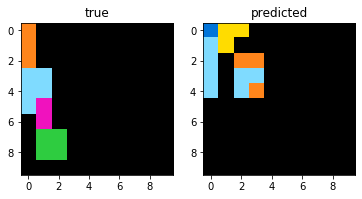

---------------------------------------------------------


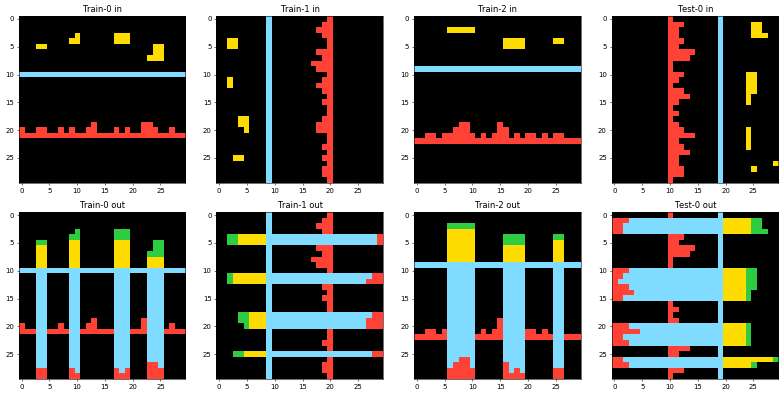

train acc:  0.7551852
valid acc:  0.59444445


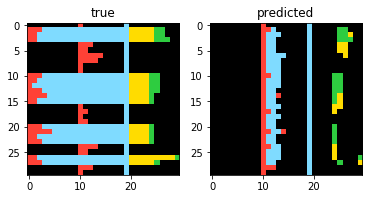

---------------------------------------------------------


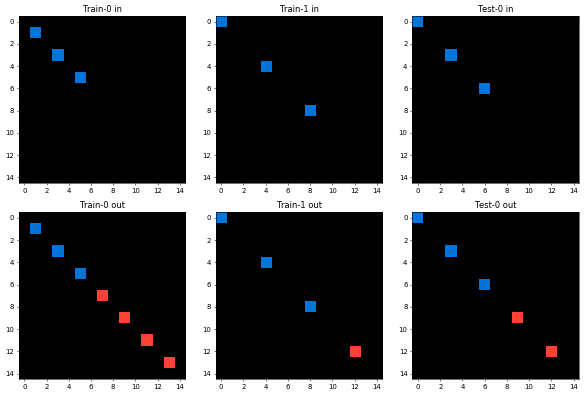

train acc:  0.98888886
valid acc:  0.9911111


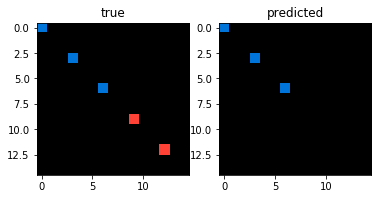

---------------------------------------------------------


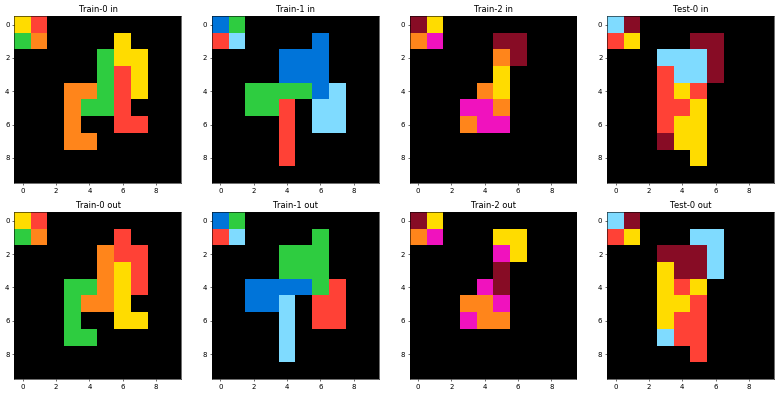

train acc:  1.0
valid acc:  0.82


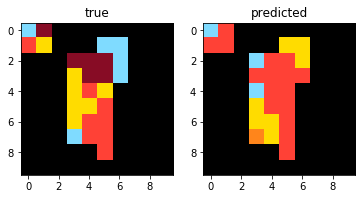

---------------------------------------------------------


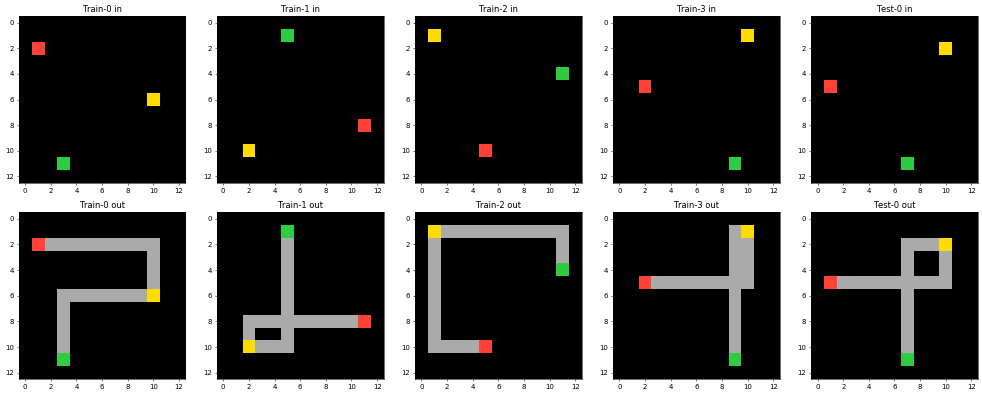

train acc:  0.8786982
valid acc:  0.8816568


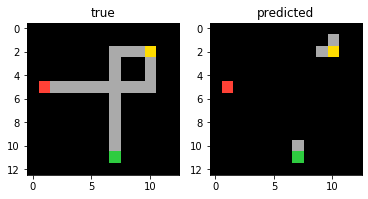

---------------------------------------------------------


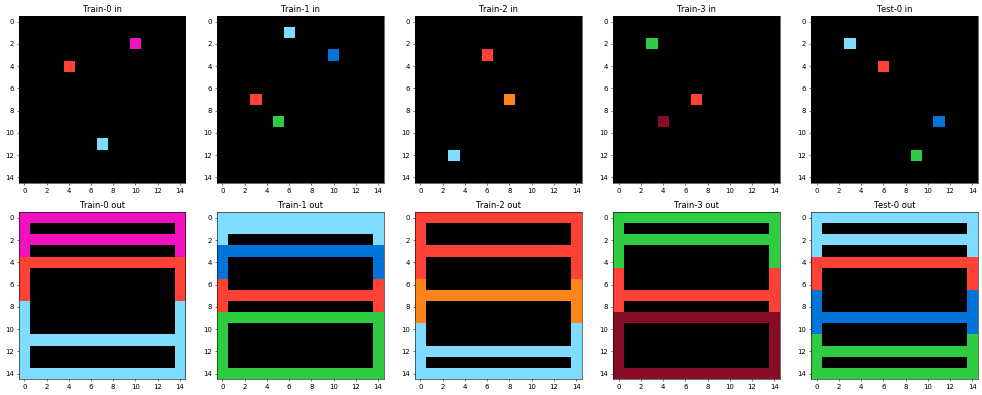

train acc:  0.7788889
valid acc:  0.60444444


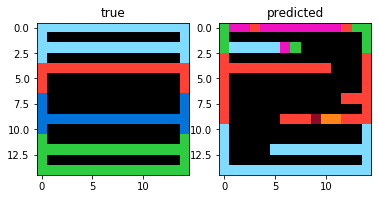

---------------------------------------------------------


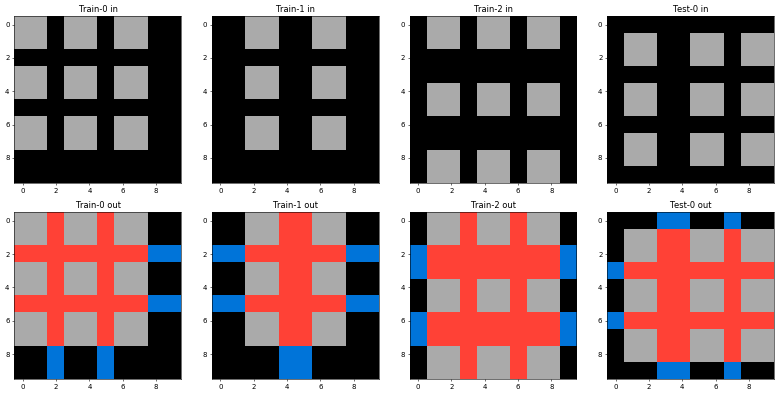

train acc:  0.99666667
valid acc:  0.86


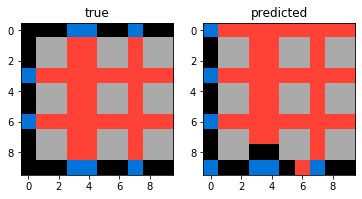

---------------------------------------------------------


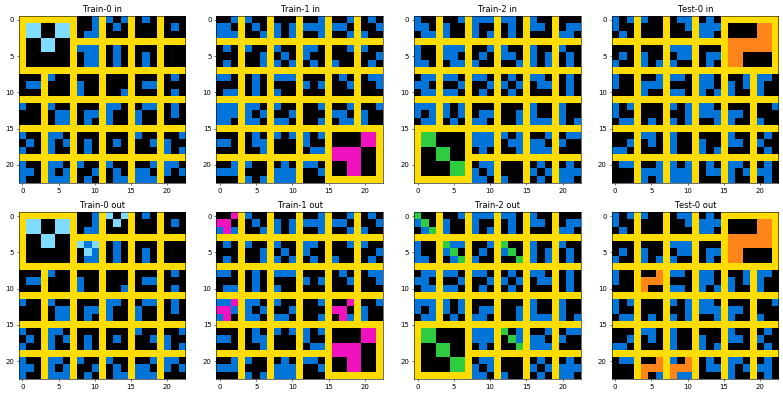

train acc:  0.98298675
valid acc:  0.93194705


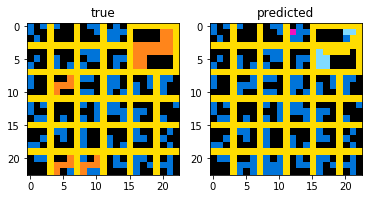

---------------------------------------------------------


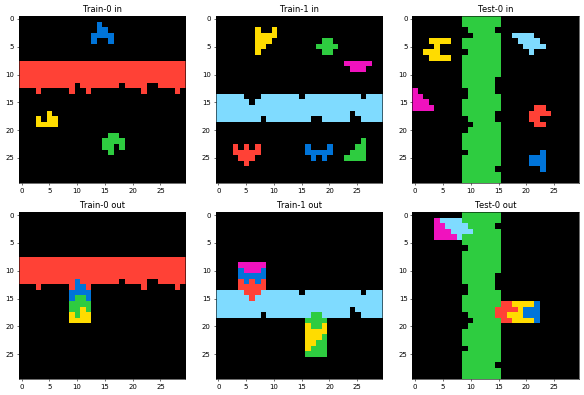

train acc:  0.95055556
valid acc:  0.7088889


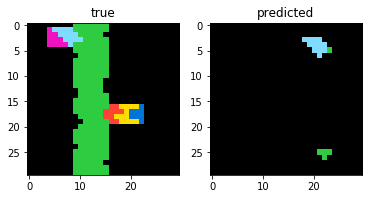

---------------------------------------------------------


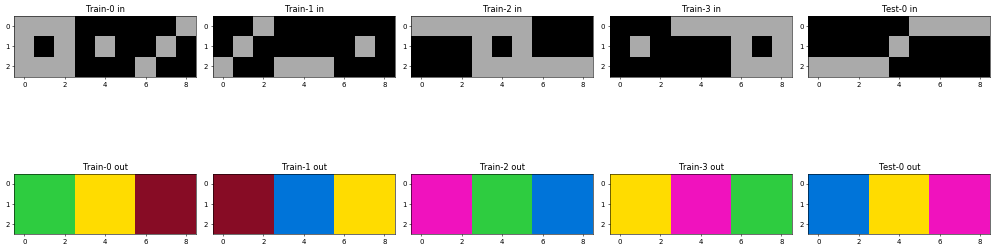

train acc:  0.9722222
valid acc:  0.4814815


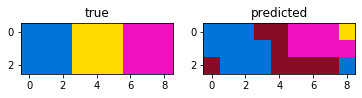

---------------------------------------------------------


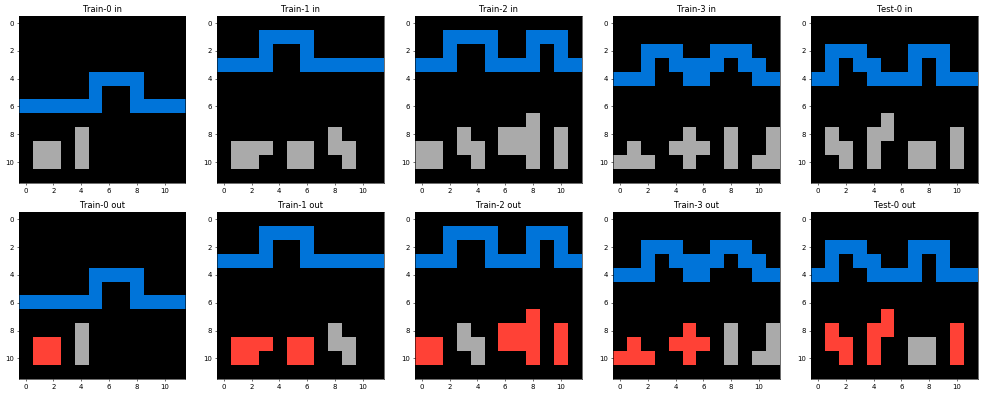

train acc:  0.9947917
valid acc:  0.9305556


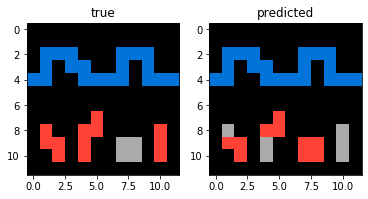

---------------------------------------------------------


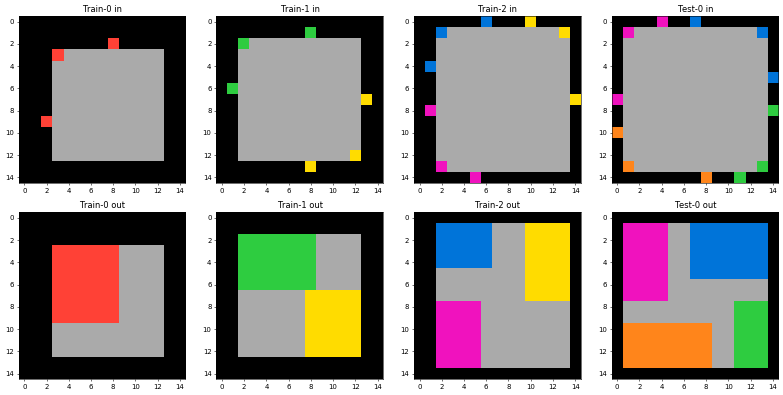

train acc:  0.8888889
valid acc:  0.45333335


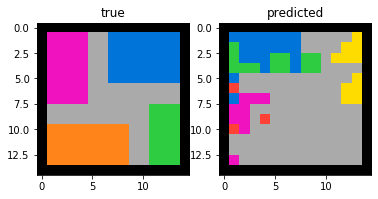

---------------------------------------------------------


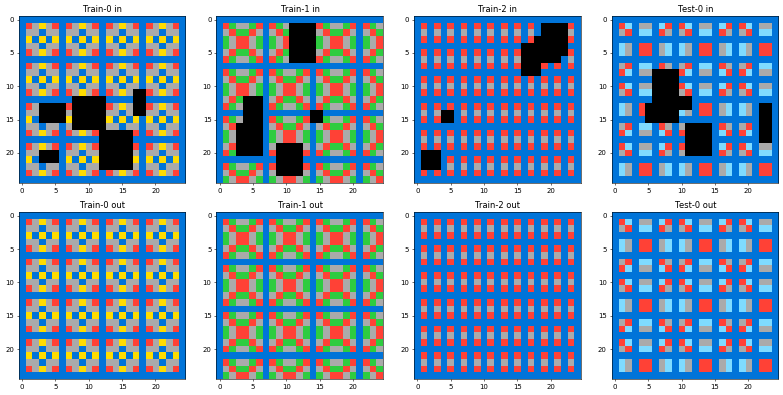

train acc:  1.0
valid acc:  0.8464


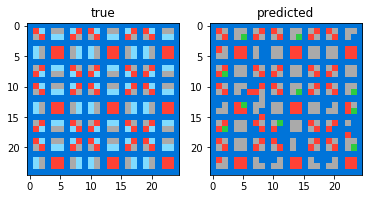

---------------------------------------------------------


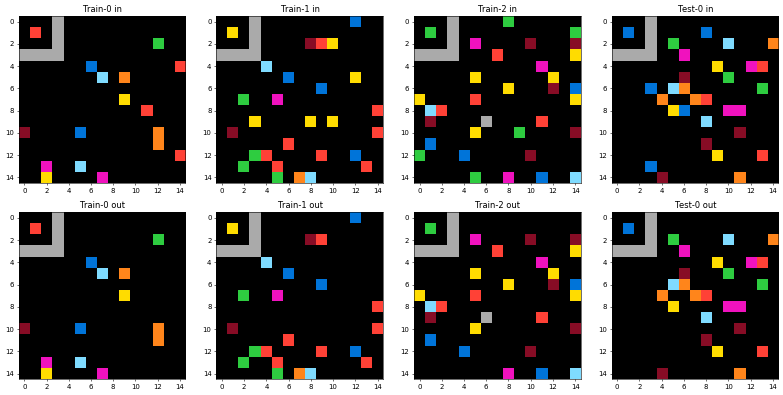

train acc:  0.99703705
valid acc:  0.96


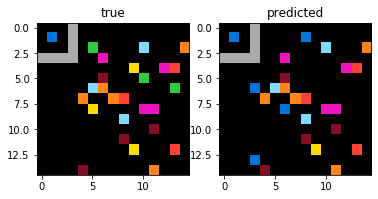

---------------------------------------------------------


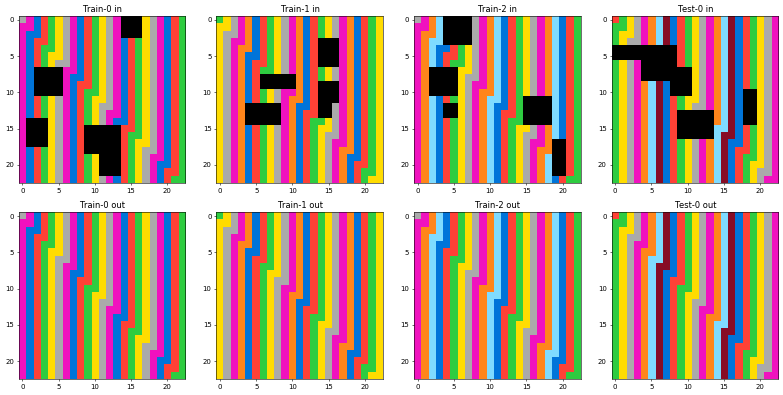

train acc:  1.0
valid acc:  0.8922495


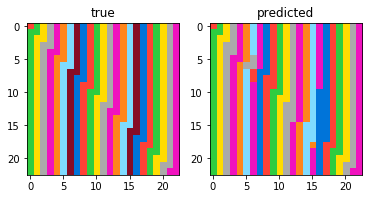

---------------------------------------------------------


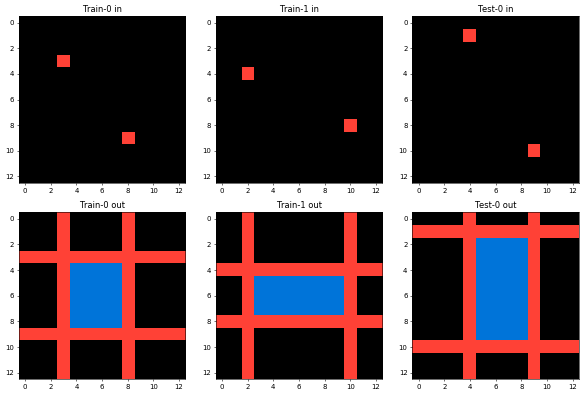

train acc:  0.89349115
valid acc:  0.7633136


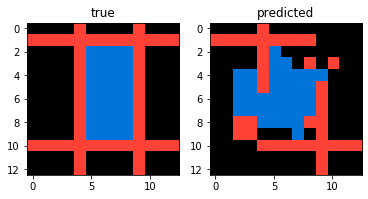

---------------------------------------------------------


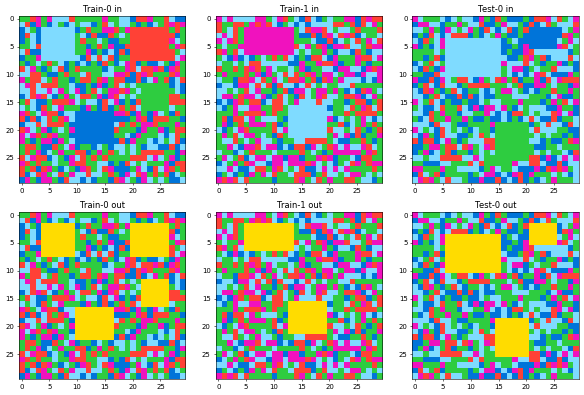

train acc:  0.99666667
valid acc:  0.98


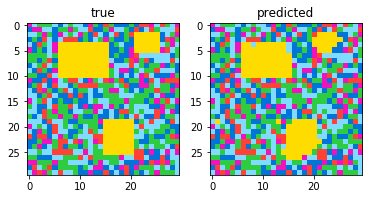

---------------------------------------------------------


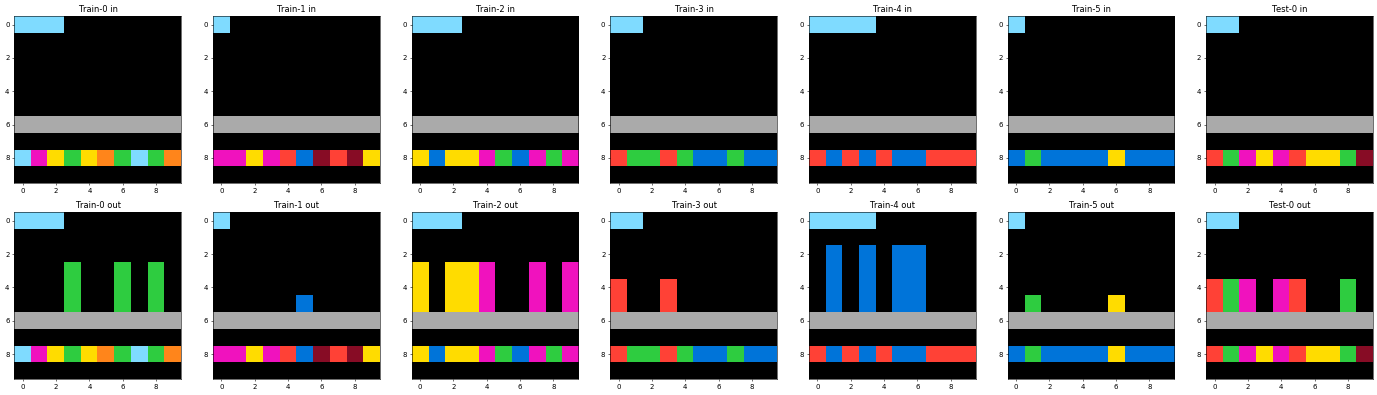

train acc:  0.92
valid acc:  0.87


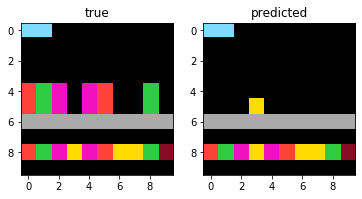

---------------------------------------------------------


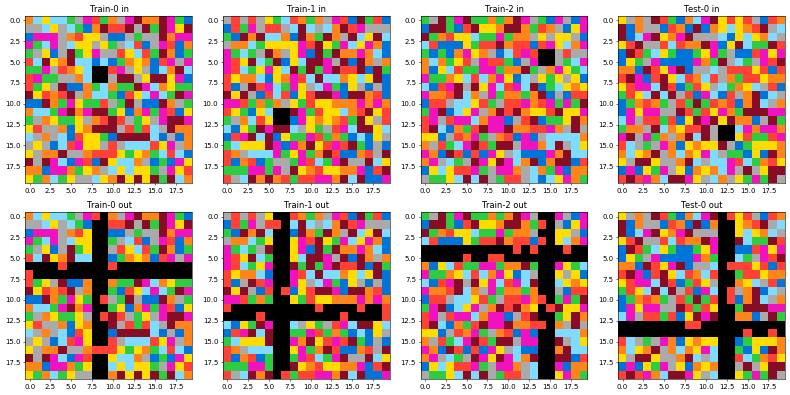

train acc:  0.9916667
valid acc:  0.835


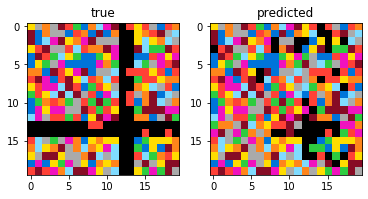

---------------------------------------------------------


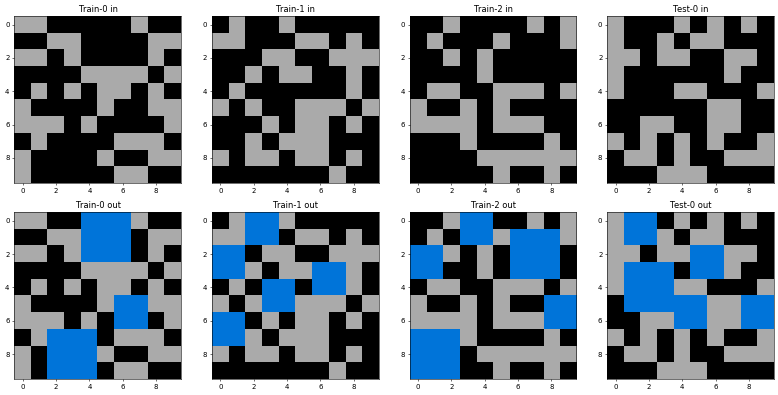

train acc:  0.95
valid acc:  0.92


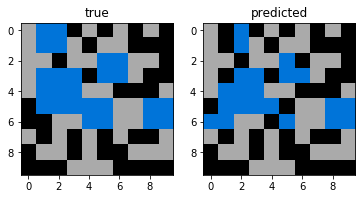

---------------------------------------------------------


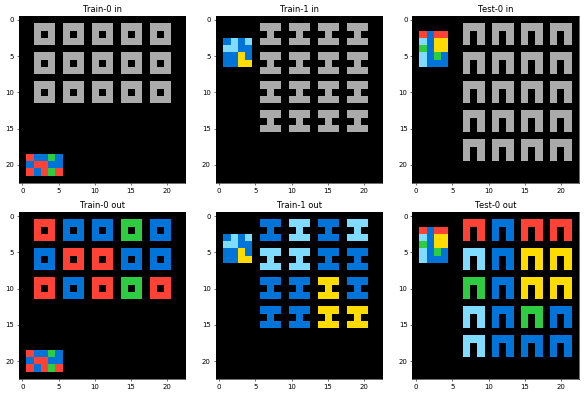

train acc:  0.8922495
valid acc:  0.8015123


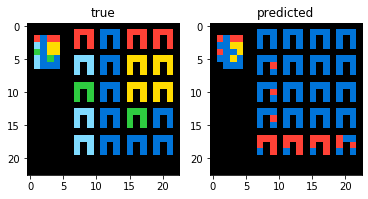

---------------------------------------------------------


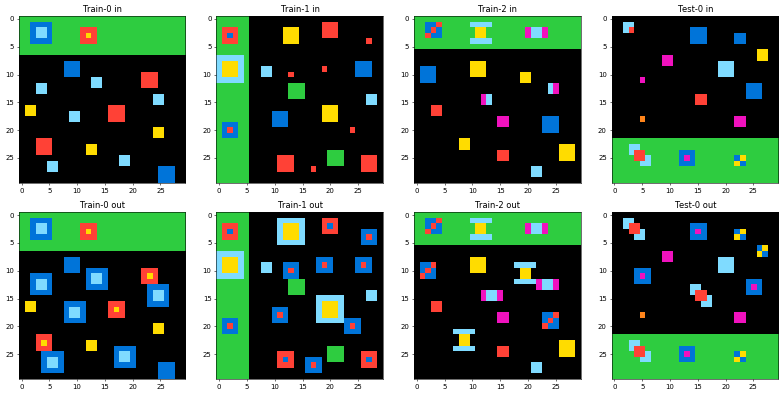

train acc:  0.9611111
valid acc:  0.9533333


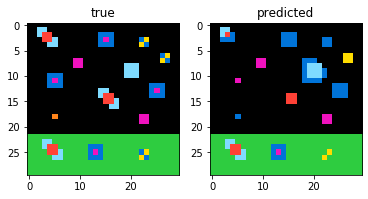


total tasks:  23
errors:  0
solved:  0


In [26]:
loop(diz_test['t1_1'], 'eval', plot=True, aug=False)

---------------------------------------------------------


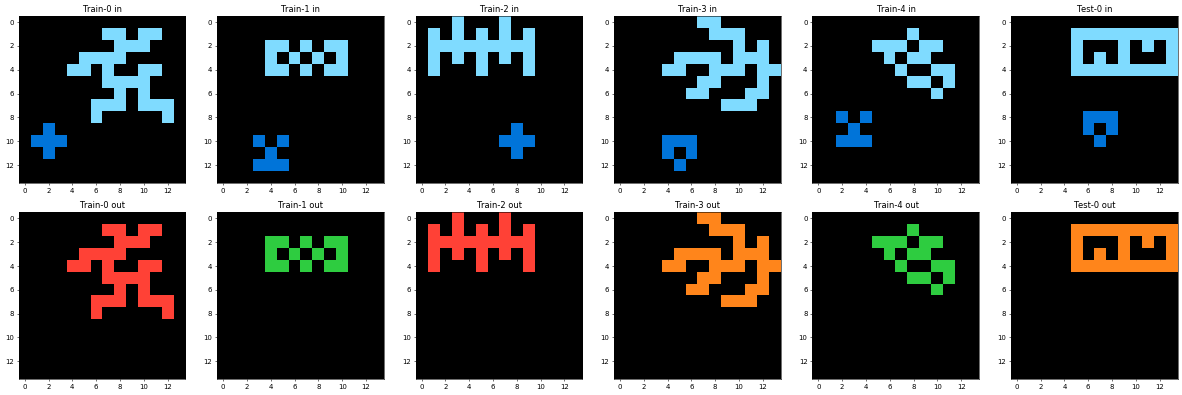

train acc:  0.99285716
valid acc:  0.95408165


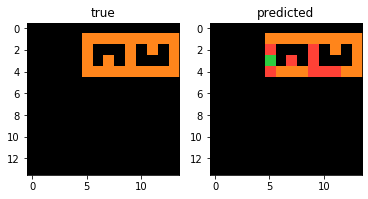

---------------------------------------------------------


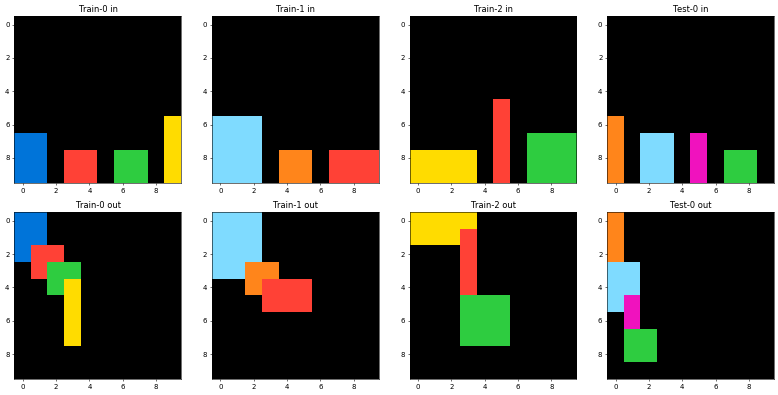

train acc:  0.9533333
valid acc:  0.76


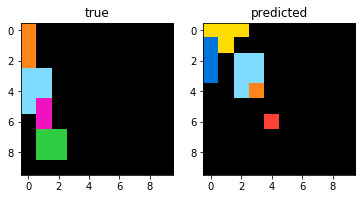

---------------------------------------------------------


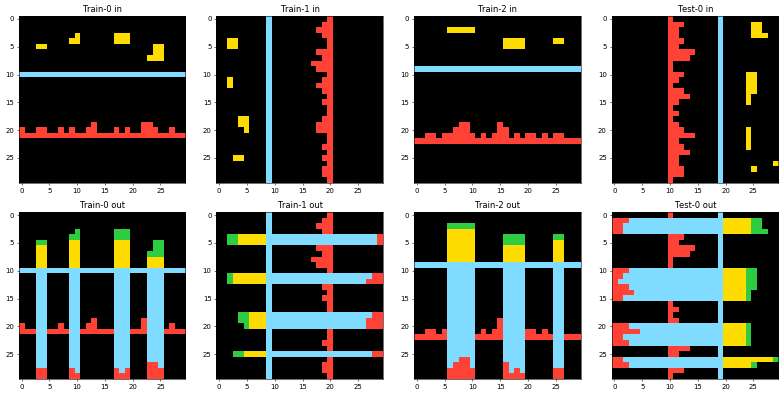

train acc:  0.8025926
valid acc:  0.5822222


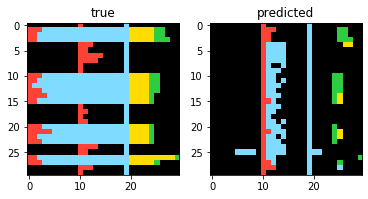

---------------------------------------------------------


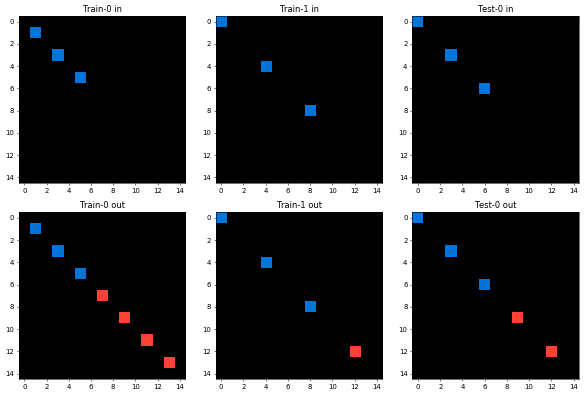

train acc:  0.98888886
valid acc:  0.9911111


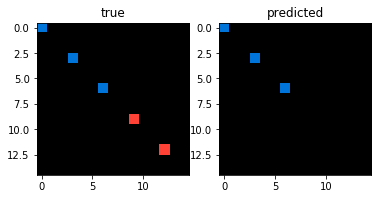

---------------------------------------------------------


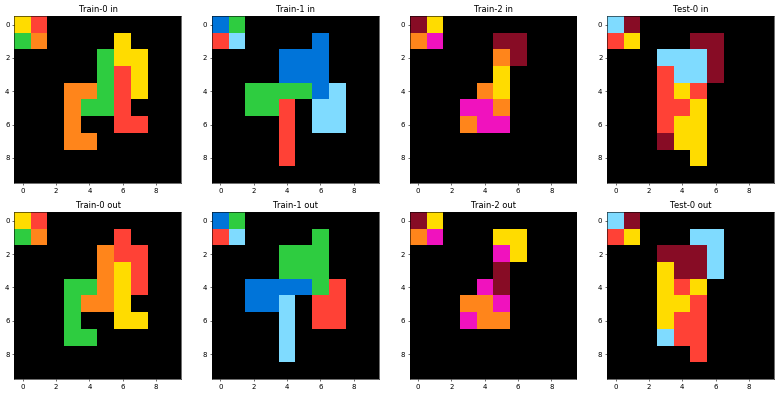

train acc:  1.0
valid acc:  0.81


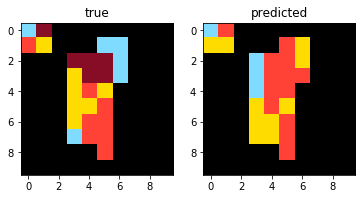

---------------------------------------------------------


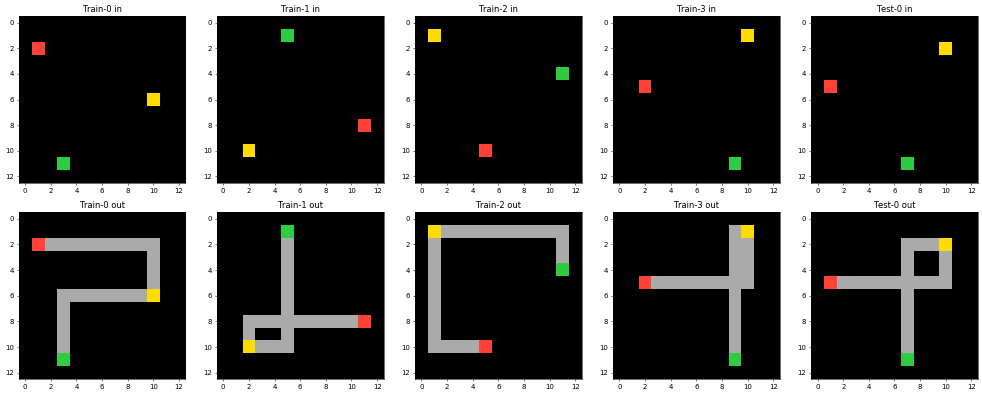

train acc:  0.95118344
valid acc:  0.9230769


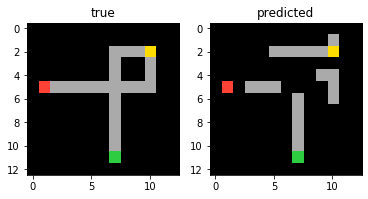

---------------------------------------------------------


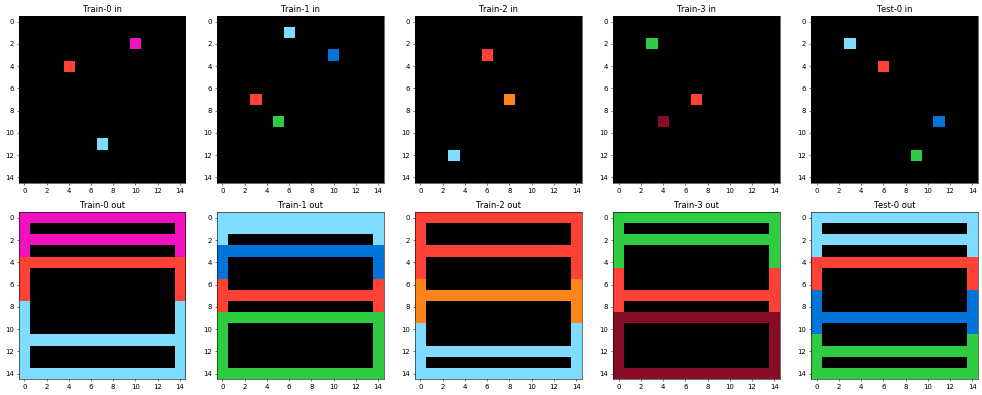

train acc:  0.8233333
valid acc:  0.6622222


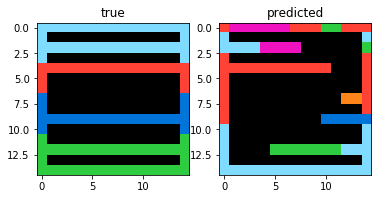

---------------------------------------------------------


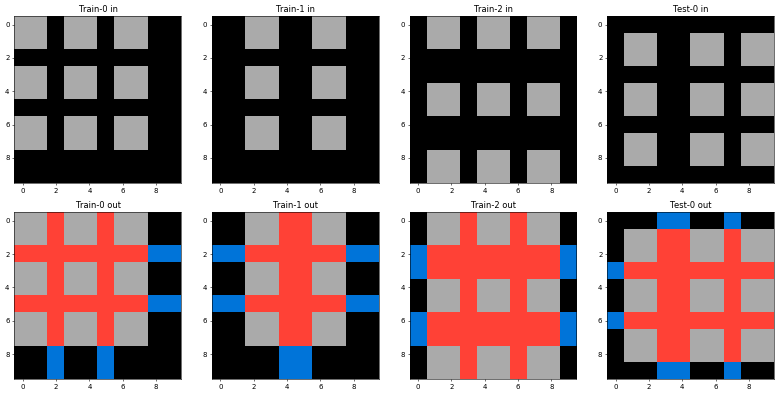

train acc:  1.0
valid acc:  0.86


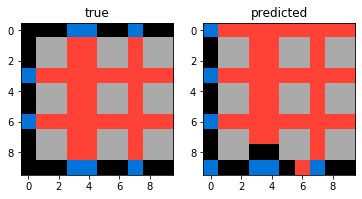

---------------------------------------------------------


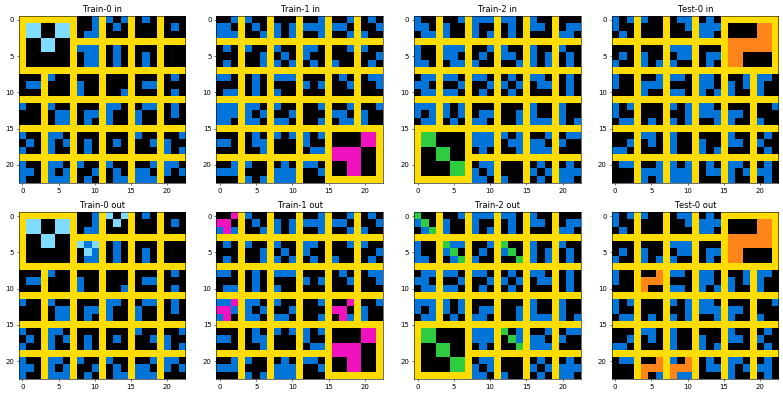

train acc:  0.99810964
valid acc:  0.92627597


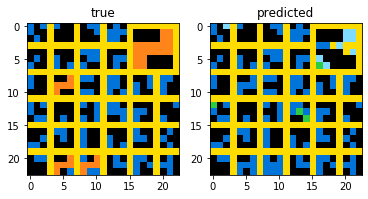

---------------------------------------------------------


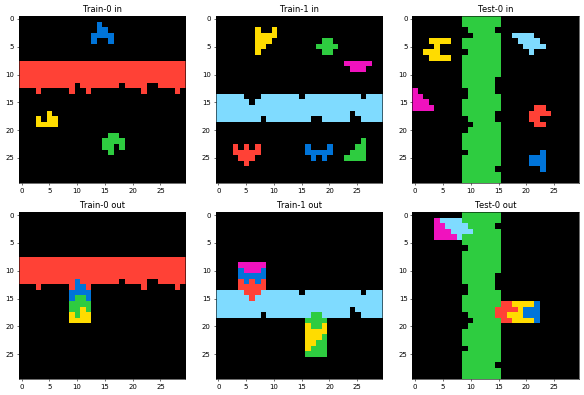

train acc:  0.9722222
valid acc:  0.67777777


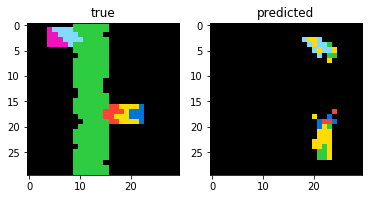

---------------------------------------------------------


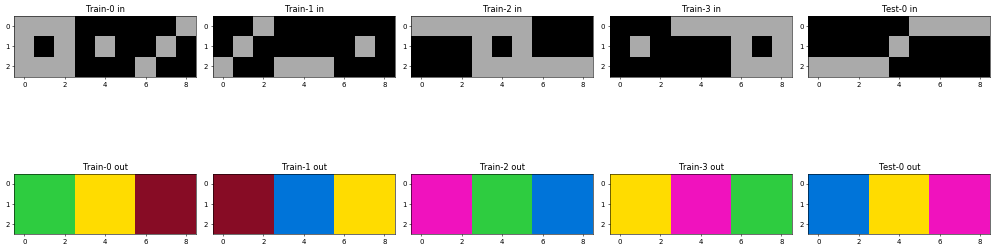

train acc:  1.0
valid acc:  0.44444445


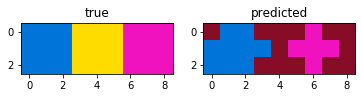

---------------------------------------------------------


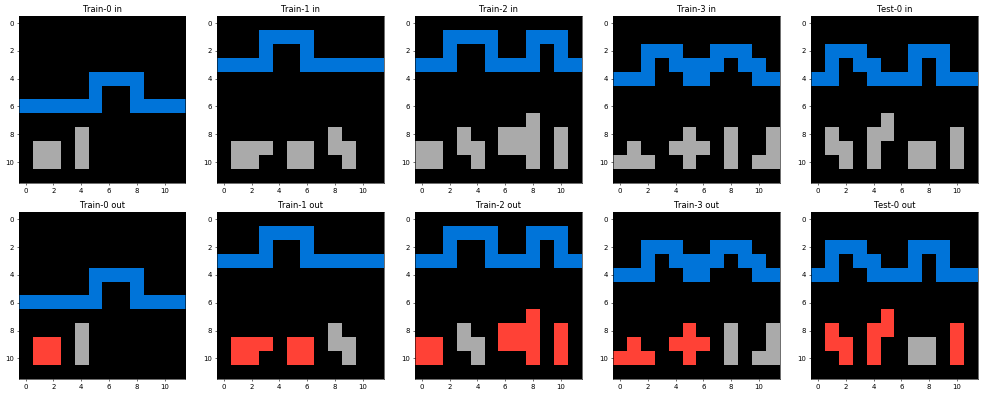

train acc:  1.0
valid acc:  0.9375


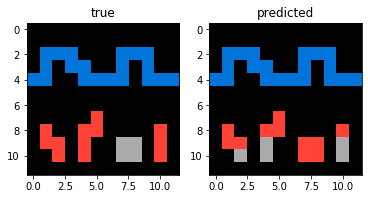

---------------------------------------------------------


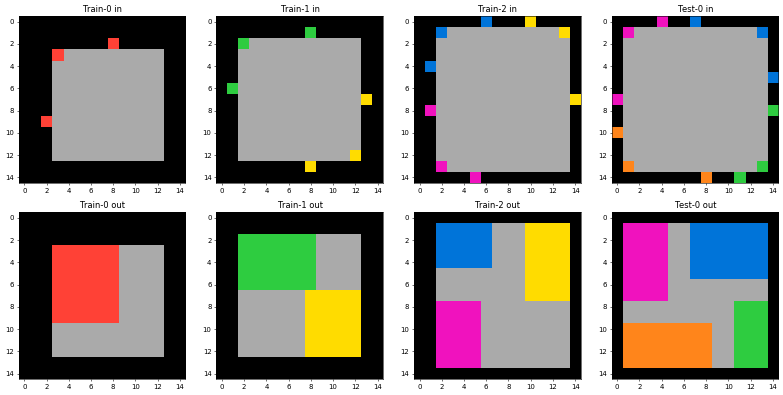

train acc:  0.9496296
valid acc:  0.47555557


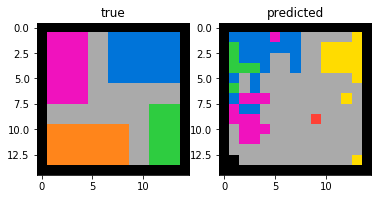

---------------------------------------------------------


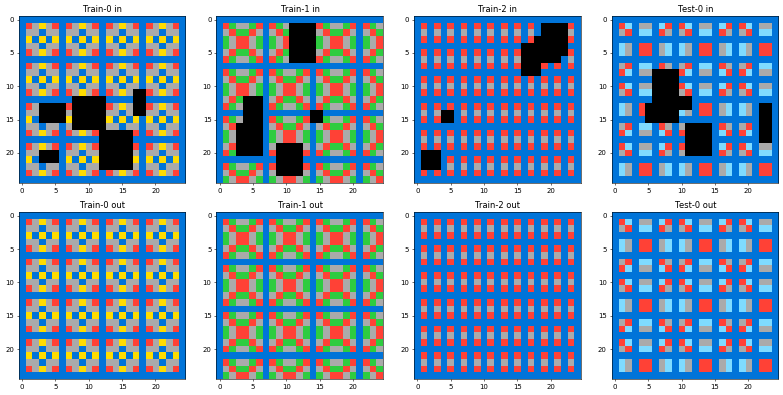

train acc:  1.0
valid acc:  0.8432


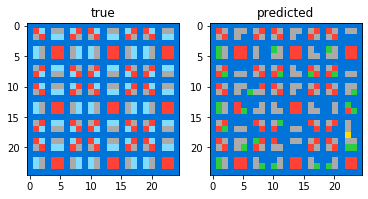

---------------------------------------------------------


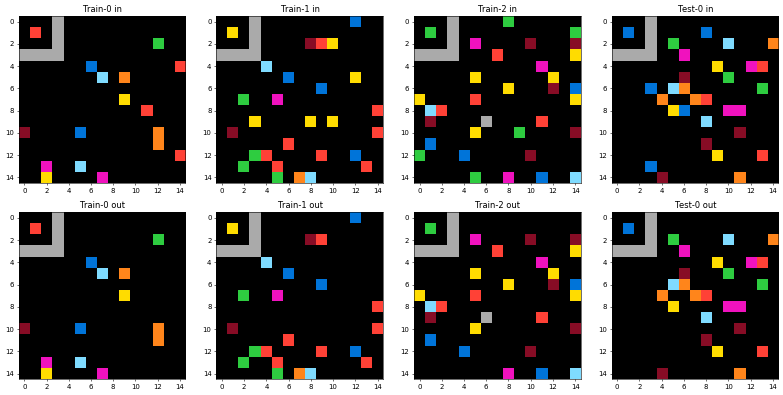

train acc:  1.0
valid acc:  0.96444446


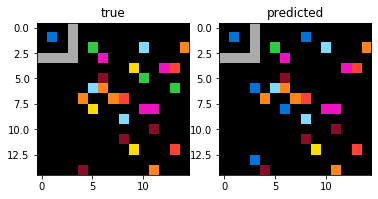

---------------------------------------------------------


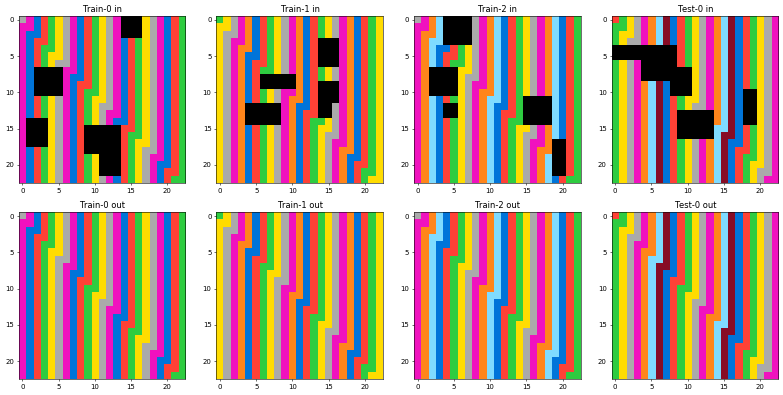

train acc:  1.0
valid acc:  0.88657844


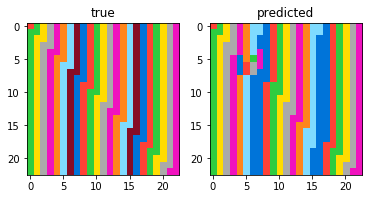

---------------------------------------------------------


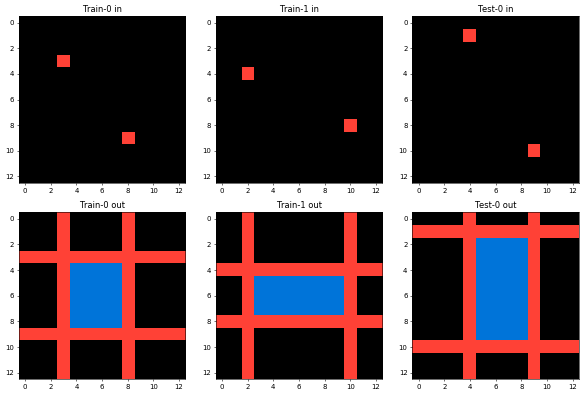

train acc:  0.9142012
valid acc:  0.75739646


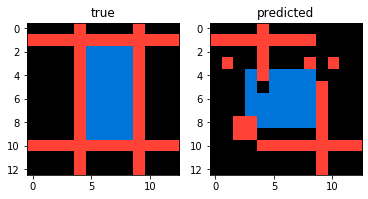

---------------------------------------------------------


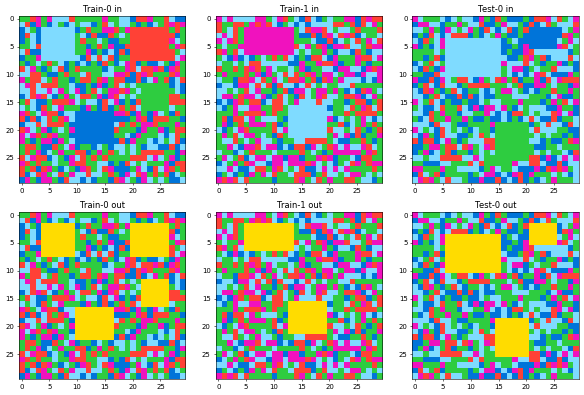

train acc:  0.9994444
valid acc:  0.97


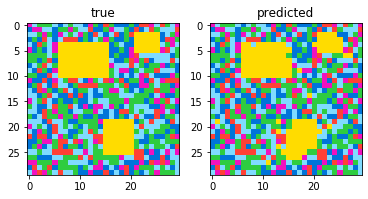

---------------------------------------------------------


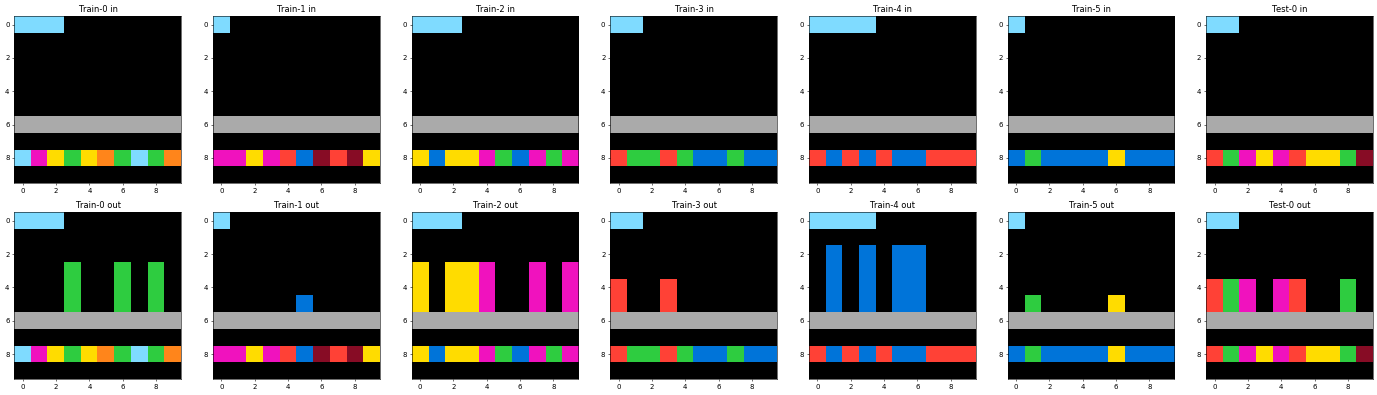

train acc:  0.96166664
valid acc:  0.85


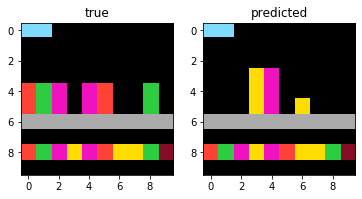

---------------------------------------------------------


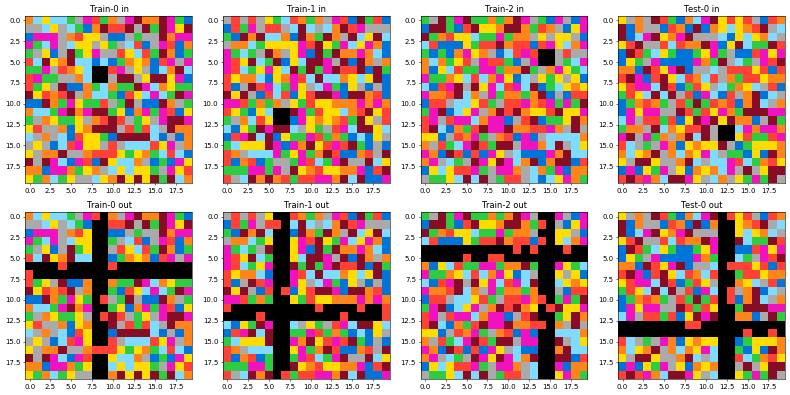

train acc:  0.9975
valid acc:  0.835


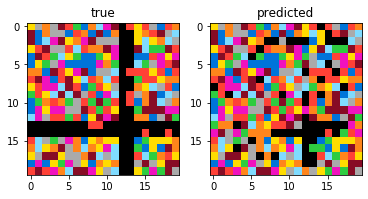

---------------------------------------------------------


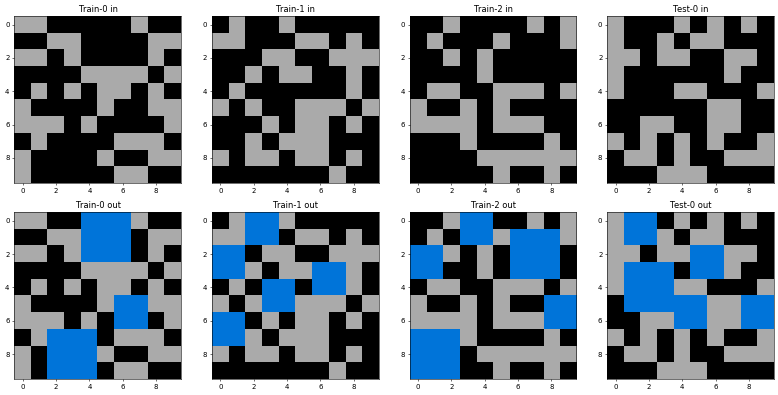

train acc:  1.0
valid acc:  0.88


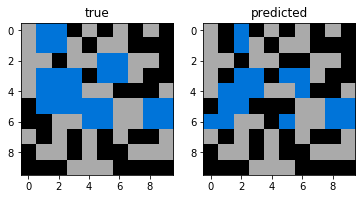

---------------------------------------------------------


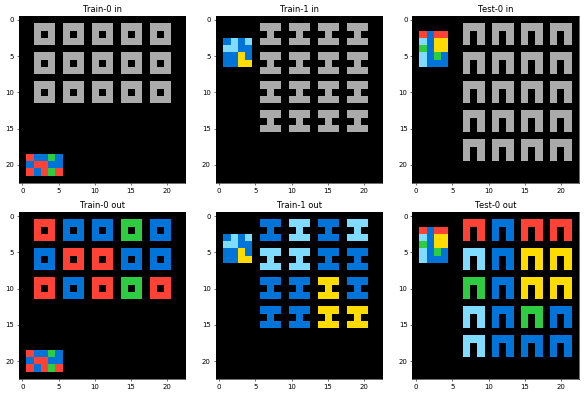

train acc:  0.93289226
valid acc:  0.7863894


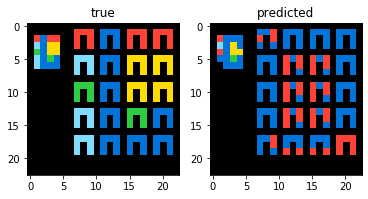

---------------------------------------------------------


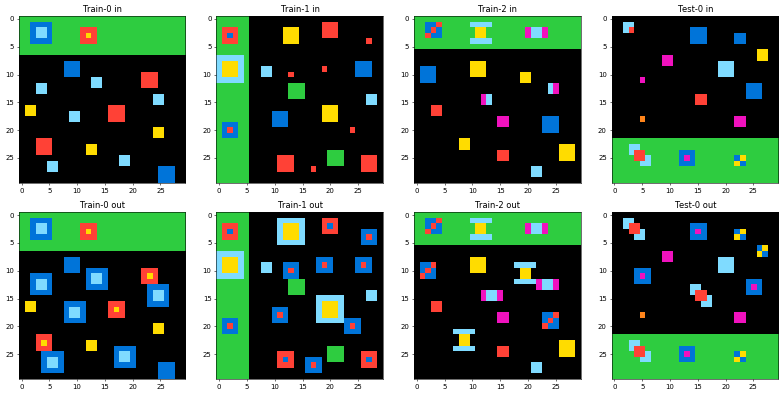

train acc:  0.9848148
valid acc:  0.9433333


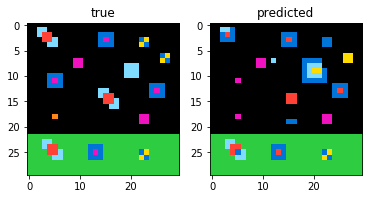


total tasks:  23
errors:  0
solved:  0


In [28]:
loop(diz_test['t1_1'], 'eval', plot=True, aug=False, epochs=500)

---------------------------------------------------------


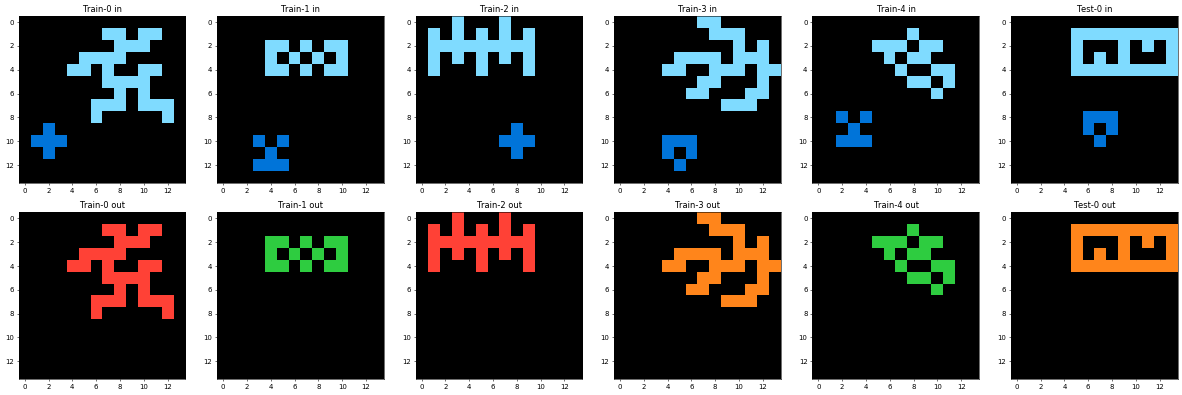

train acc:  0.9285714
valid acc:  0.95408165


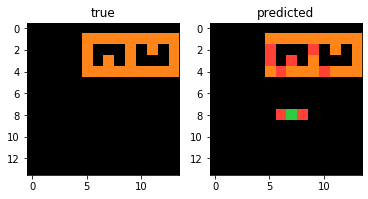

---------------------------------------------------------


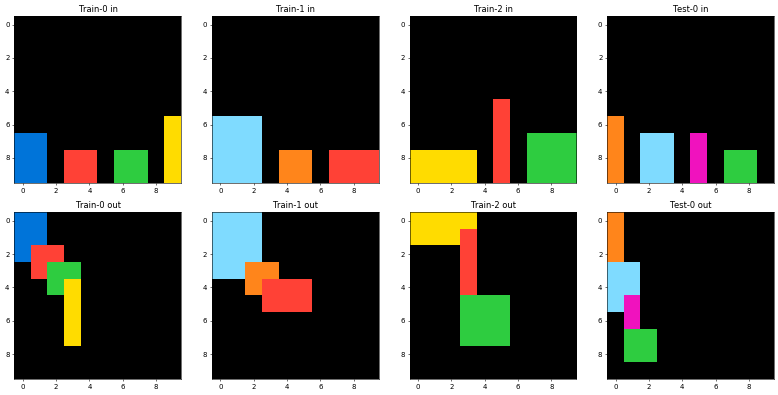

train acc:  0.87666667
valid acc:  0.72


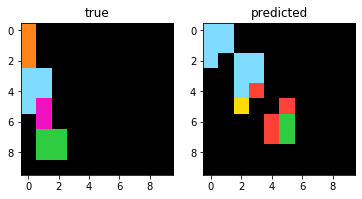

---------------------------------------------------------


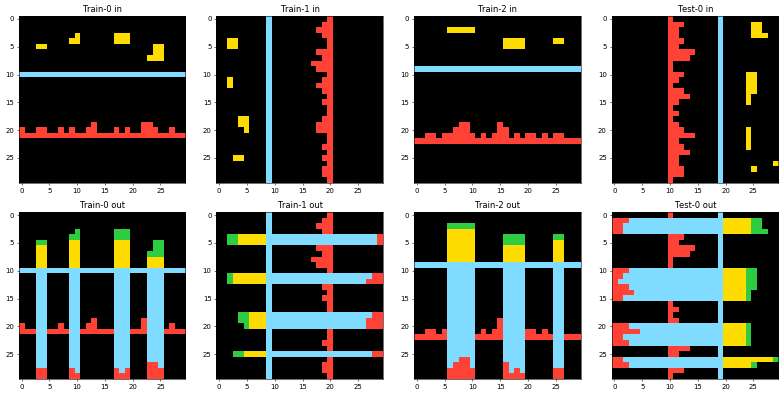

train acc:  0.6766667
valid acc:  0.57


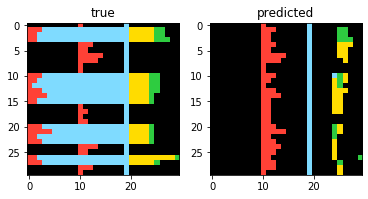

---------------------------------------------------------


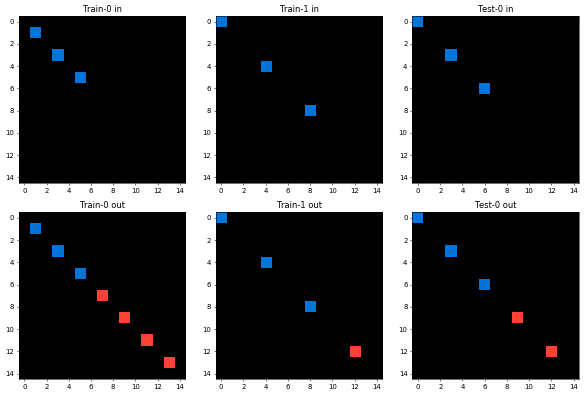

train acc:  0.97555554
valid acc:  0.9866667


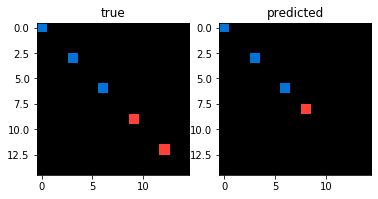

---------------------------------------------------------


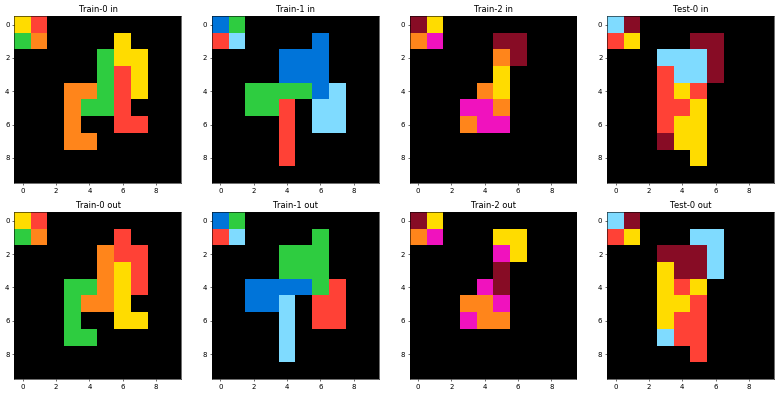

train acc:  0.94666666
valid acc:  0.78


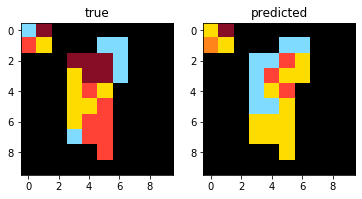

---------------------------------------------------------


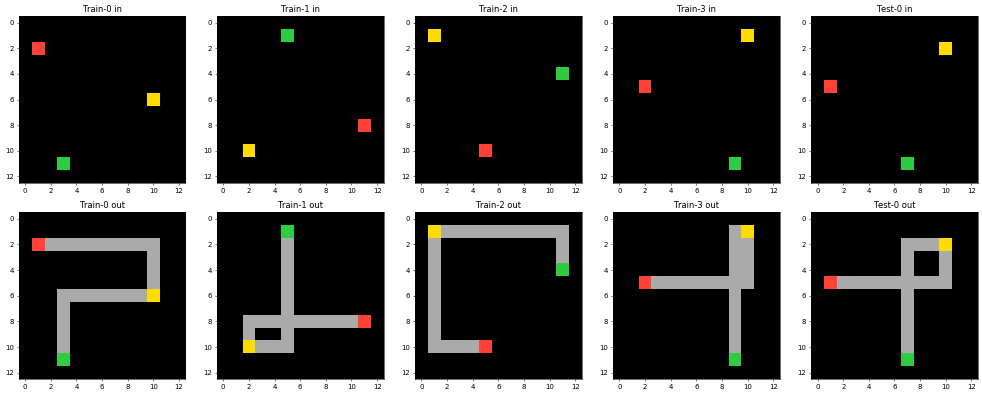

train acc:  0.9275148
valid acc:  0.9230769


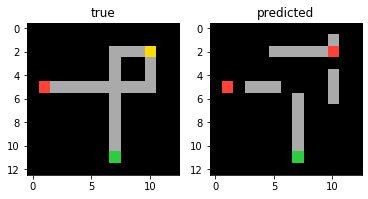

---------------------------------------------------------


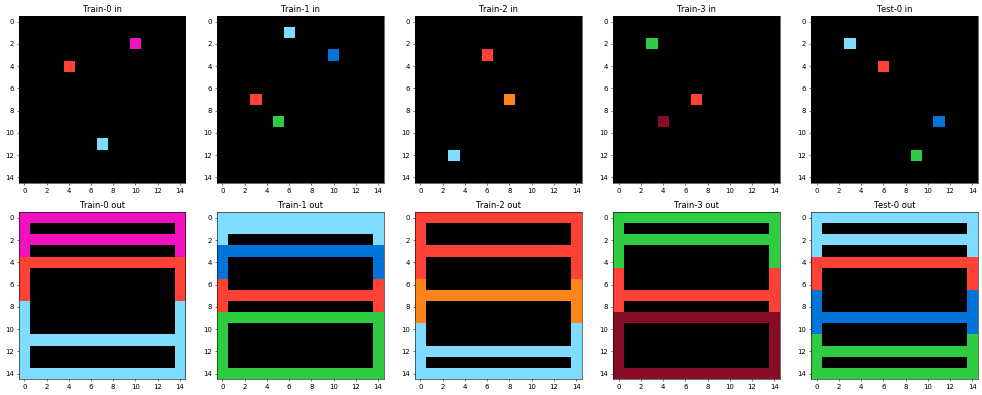

train acc:  0.75
valid acc:  0.72444445


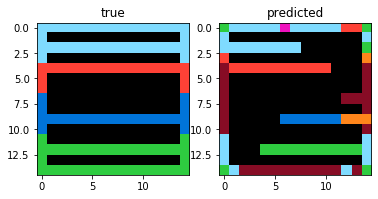

---------------------------------------------------------


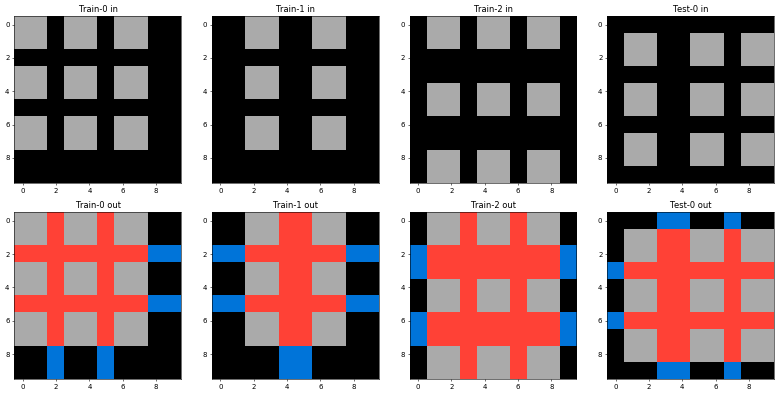

train acc:  0.9633333
valid acc:  0.81


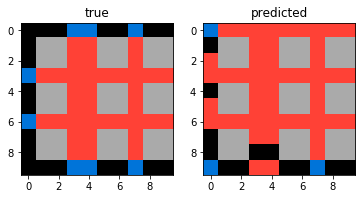

---------------------------------------------------------


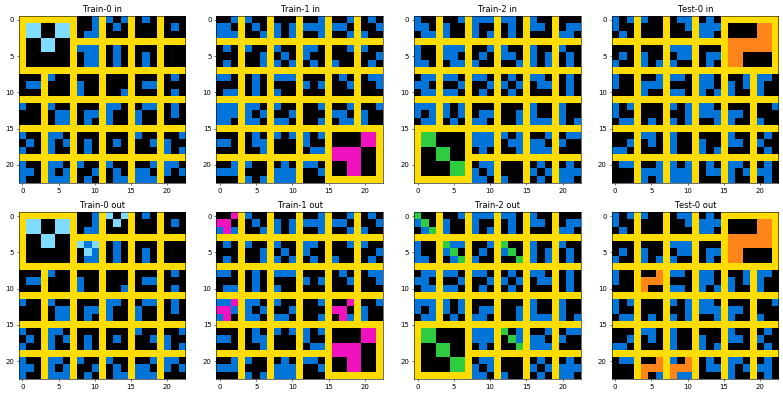

train acc:  0.9810964
valid acc:  0.97164464


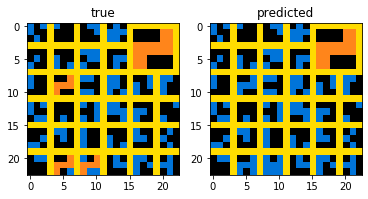

---------------------------------------------------------


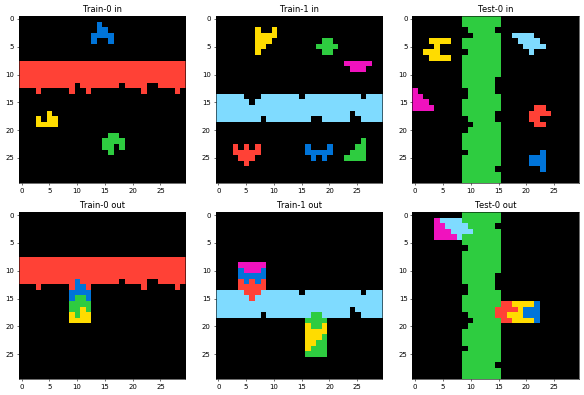

train acc:  0.94666666
valid acc:  0.9288889


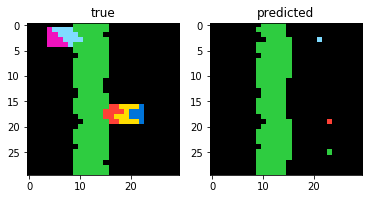

---------------------------------------------------------


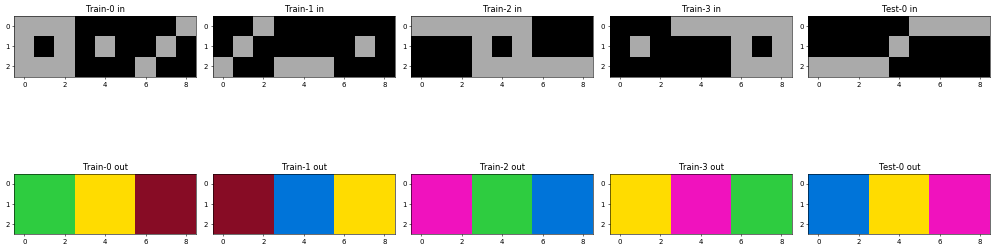

train acc:  0.9722222
valid acc:  0.4814815


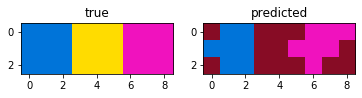

---------------------------------------------------------


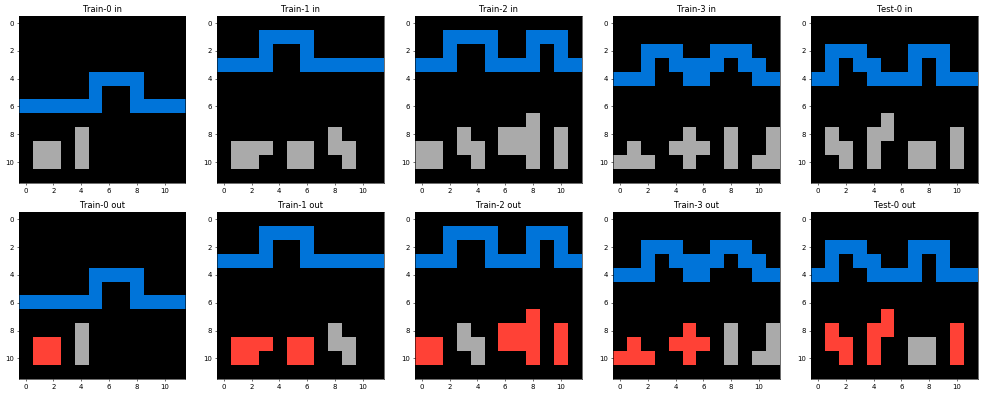

train acc:  0.9982639
valid acc:  0.9513889


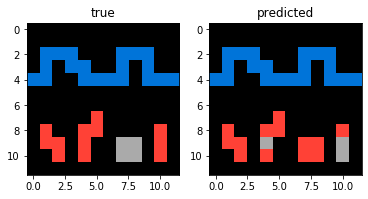

---------------------------------------------------------


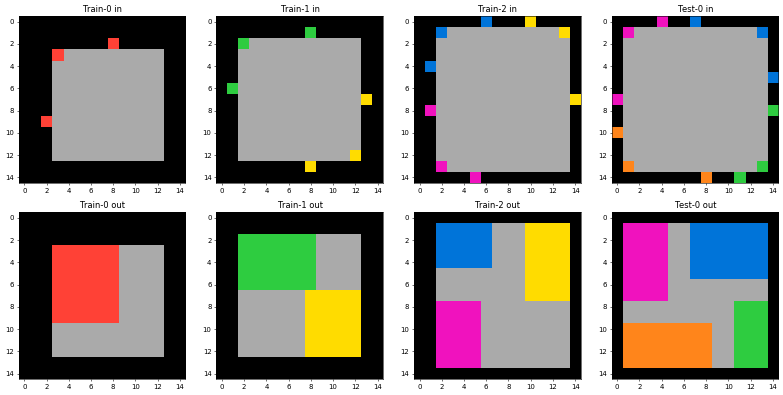

train acc:  0.78962964
valid acc:  0.51111114


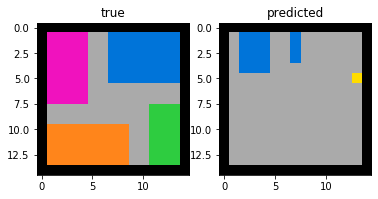

---------------------------------------------------------


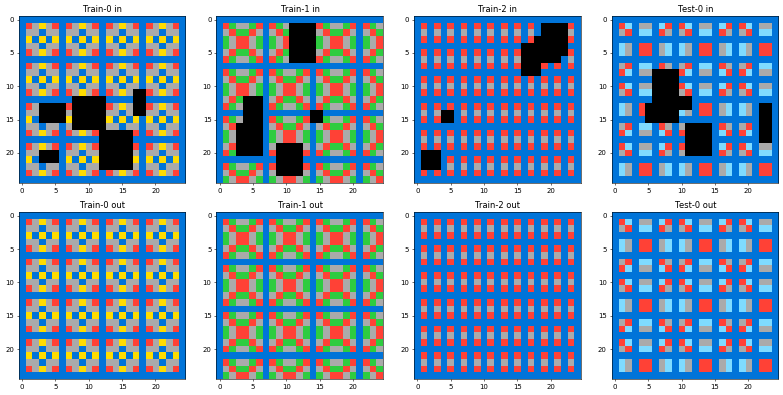

train acc:  0.5498667
valid acc:  0.7104


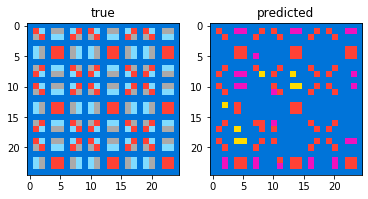

---------------------------------------------------------


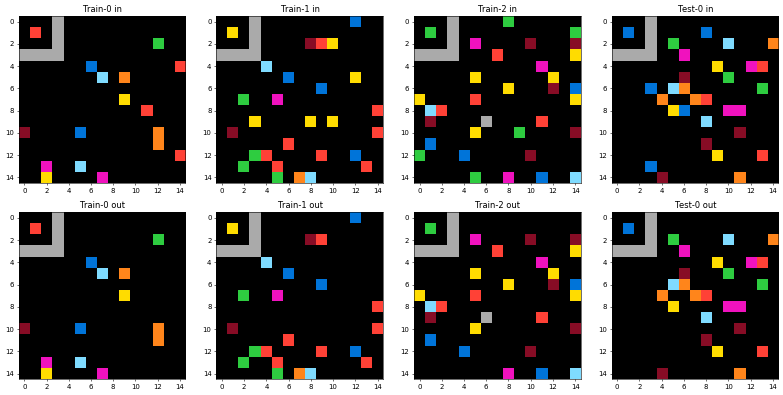

train acc:  0.9955556
valid acc:  0.97333336


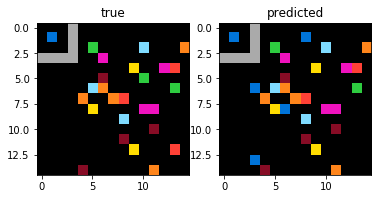

---------------------------------------------------------


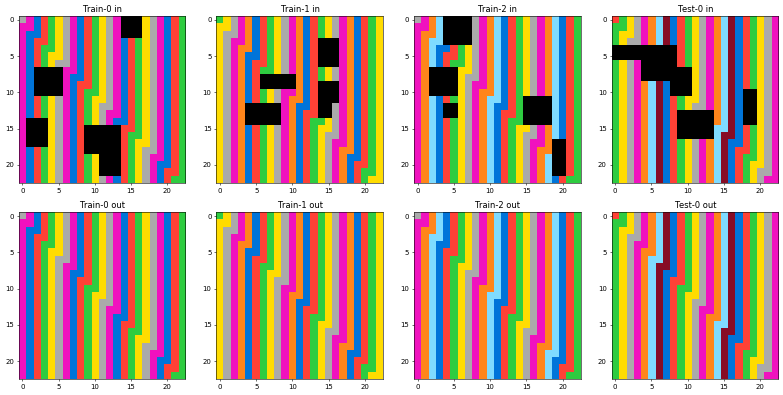

train acc:  0.9861374
valid acc:  0.8846881


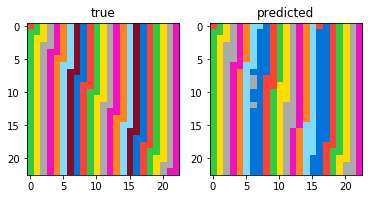

---------------------------------------------------------


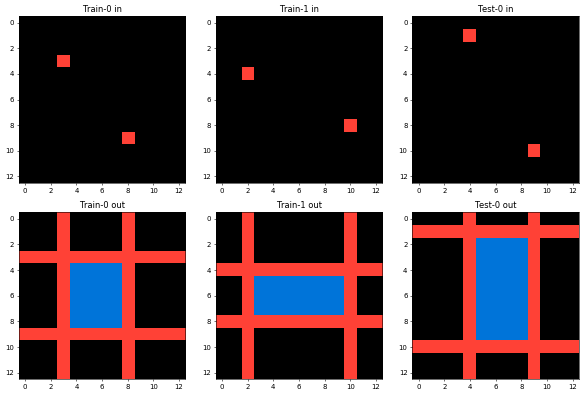

train acc:  0.62721896
valid acc:  0.7633136


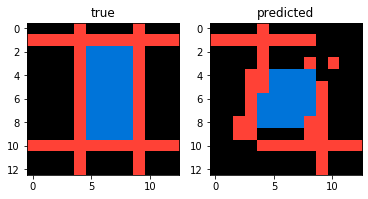

---------------------------------------------------------


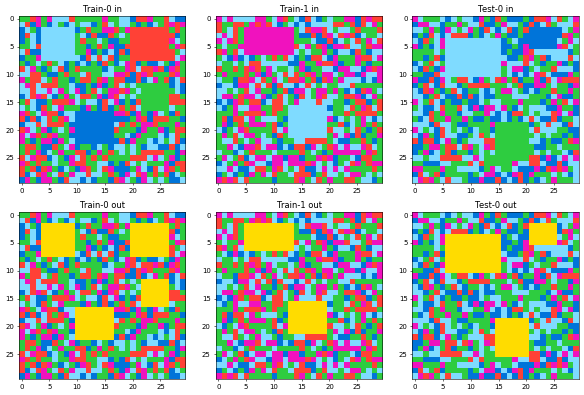

train acc:  0.85833335
valid acc:  0.95444447


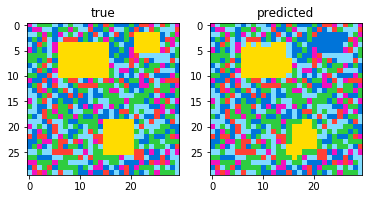

---------------------------------------------------------


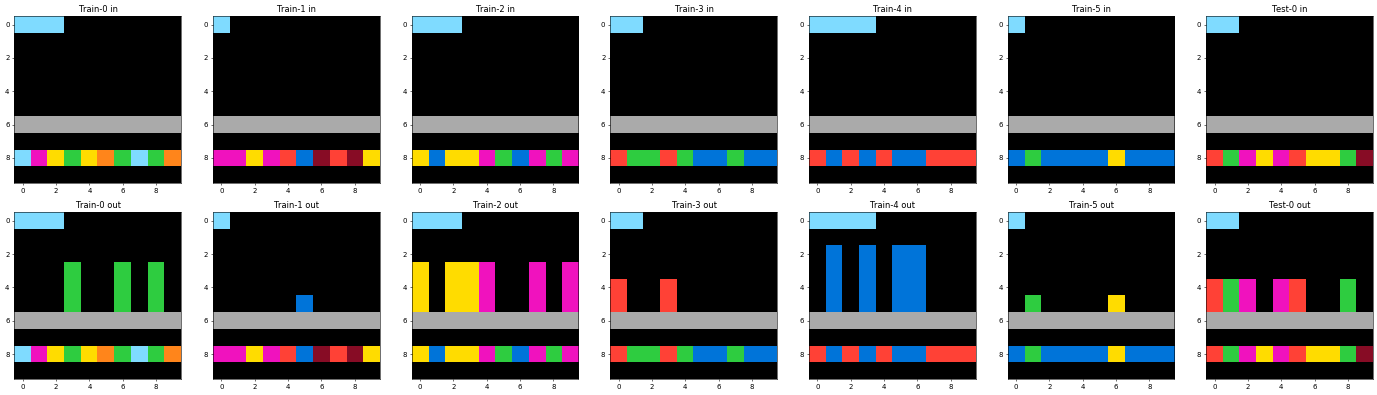

train acc:  0.92833334
valid acc:  0.89


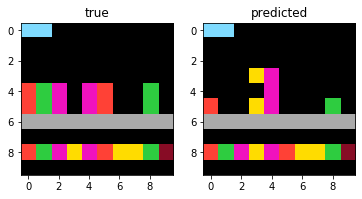

---------------------------------------------------------


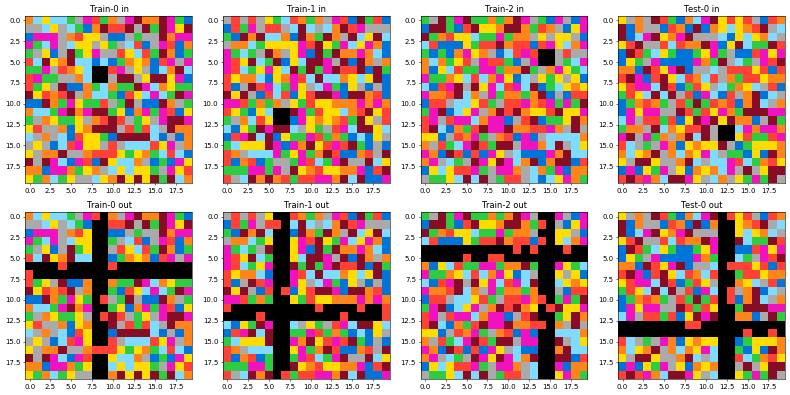

train acc:  0.935
valid acc:  0.885


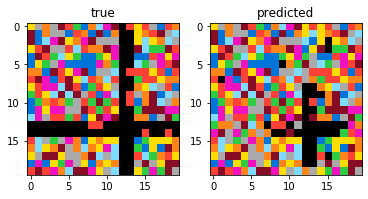

---------------------------------------------------------


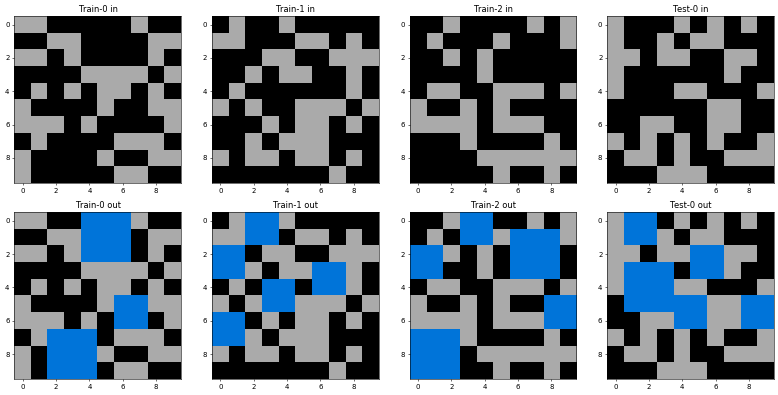

train acc:  0.77666664
valid acc:  0.88


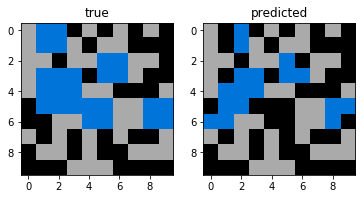

---------------------------------------------------------


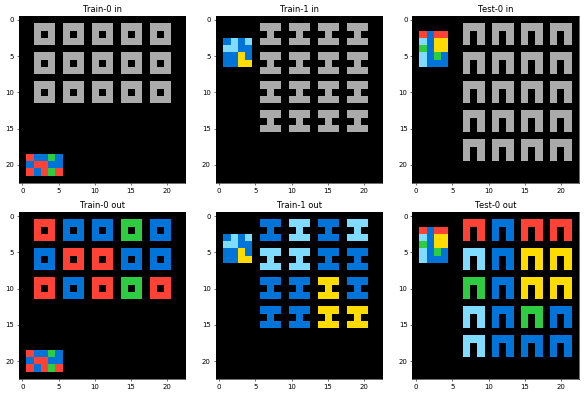

train acc:  0.75141776
valid acc:  0.8185255


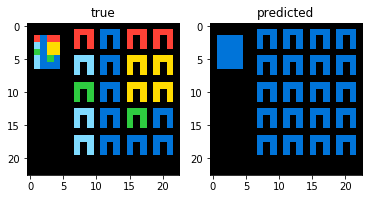

---------------------------------------------------------


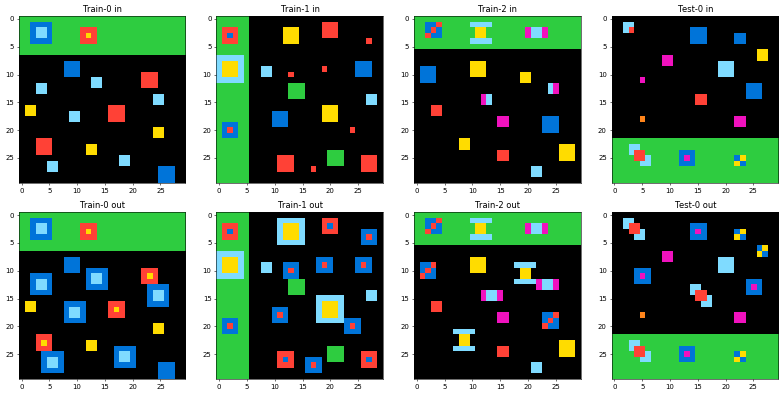

train acc:  0.9337037
valid acc:  0.9711111


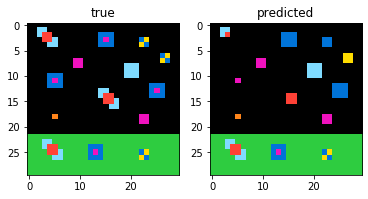


total tasks:  23
errors:  0
solved:  0


In [29]:
loop(diz_test['t1_1'], 'eval', plot=True, aug=True, epochs=500)